In [35]:
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/DS_2019_public.csv', encoding = 'ISO-8859-1')
data.head()

<ipython-input-3-35a4184ed4ce>:1: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/MyDrive/DS_2019_public.csv', encoding = 'ISO-8859-1')


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [4]:
data.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,...,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,-0.082943,...,63.789609,0.818115,16313.564138,3.675126,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,310.691148,2480.831034,8464.594227,8464.591405,505.921369,35823.762607,1.066451,...,14.406053,2.346643,13733.416871,2.775507,106.994526,2.636779,0.028757,0.500020,2.841844,778.588285
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,-2.000000,-9.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000
25%,1.000000,3.000000,8.000000,18.000000,143.161500,488.477000,488.500000,222.000000,8748.500000,0.000000,...,62.000000,0.000000,7708.000000,2.000000,86.000000,4.000000,0.000000,0.000000,1.000000,723.870500
50%,3.000000,5.000000,15.000000,90.000000,748.220000,2552.933000,2553.000000,431.000000,27289.000000,0.000000,...,67.000000,0.000000,12761.000000,5.000000,127.000000,5.000000,0.000000,1.000000,5.000000,1047.355000
75%,4.000000,7.000000,21.000000,263.000000,2281.322500,7783.797500,7784.000000,762.500000,55784.500000,1.000000,...,70.000000,2.000000,21169.500000,5.000000,193.000000,7.000000,0.000000,1.000000,5.000000,1558.283000
max,5.000000,10.000000,27.000000,7729.000000,60995.431000,208116.552000,208117.000000,9264.000000,548711.000000,1.000000,...,90.000000,40.000000,284130.000000,8.000000,2490.000000,23.000000,1.000000,1.000000,5.000000,11069.027000


In [7]:
data.info

<bound method DataFrame.info of        Climate_Region_Pub  DIVISION  REPORTABLE_DOMAIN DOLELCOL  TOTALDOLCOL  \
0                       5        10                 26   16.793           17   
1                       1         1                  1   48.901           49   
2                       1         3                  7  101.048          101   
3                       1         1                  1        0            0   
4                       1         4                 10   45.132           45   
...                   ...       ...                ...      ...          ...   
10870                   4         5                 13    345.8          346   
10871                   1         3                  9   13.005           13   
10872                   1         4                 10    97.67           98   
10873                   1         8                 23   12.834           13   
10874                   5        10                 26        0            0   

       

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.dtypes

Climate_Region_Pub      int64
DIVISION                int64
REPORTABLE_DOMAIN       int64
DOLELCOL               object
TOTALDOLCOL             int64
KWHCOL                float64
BTUELCOL              float64
TOTALBTUCOL             int64
TOTALDOLSPH             int64
TOTALBTUSPH             int64
CELLAR                  int64
NWEIGHT               float64
TOTHSQFT                int64
HEATHOME                int64
NUMPC                   int64
DOLLAREL                int64
DOLELOTH              float64
CUFEETNGSPH           float64
BTUNGSPH              float64
DOLNGSPH              float64
TEMPHOME                int64
TOTCSQFT                int64
BTUFOSPH              float64
AIRCOND                 int64
ELCOOL                  int64
GALLONFOSPH           float64
WALLTYPE                int64
TOTALDOLOTH             int64
BTUFO                   int64
GALLONFO                int64
DOLFOSPH               object
DOLLARFO                int64
KWHSPH                float64
BTUELSPH  

In [9]:
data = data.select_dtypes(exclude = ['object'])
data = data.astype(float)
data.dtypes

Climate_Region_Pub    float64
DIVISION              float64
REPORTABLE_DOMAIN     float64
TOTALDOLCOL           float64
KWHCOL                float64
BTUELCOL              float64
TOTALBTUCOL           float64
TOTALDOLSPH           float64
TOTALBTUSPH           float64
CELLAR                float64
NWEIGHT               float64
TOTHSQFT              float64
HEATHOME              float64
NUMPC                 float64
DOLLAREL              float64
DOLELOTH              float64
CUFEETNGSPH           float64
BTUNGSPH              float64
DOLNGSPH              float64
TEMPHOME              float64
TOTCSQFT              float64
BTUFOSPH              float64
AIRCOND               float64
ELCOOL                float64
GALLONFOSPH           float64
WALLTYPE              float64
TOTALDOLOTH           float64
BTUFO                 float64
GALLONFO              float64
DOLLARFO              float64
KWHSPH                float64
BTUELSPH              float64
FOWARM                float64
USEFO     

In [10]:
dupl = data[data.duplicated()]
print(len(dupl))
dupl

0


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,NWEIGHT,TOTHSQFT,HEATHOME,NUMPC,DOLLAREL,DOLELOTH,CUFEETNGSPH,BTUNGSPH,DOLNGSPH,TEMPHOME,TOTCSQFT,BTUFOSPH,AIRCOND,ELCOOL,GALLONFOSPH,WALLTYPE,TOTALDOLOTH,BTUFO,GALLONFO,DOLLARFO,KWHSPH,BTUELSPH,FOWARM,USEFO,TOTUSQFT,TOTALDOL,NUMTHERM,CONCRETE,CUFEETNG,BTUNG,GALLONFOOTH,BTUFOOTH,BEDROOMS,FOWATER,GALLONFOWTH,BTUFOWTH,DOLFOWTH,GALLONKEROTH,BTUKEROTH,DOLKEROTH,TOTUCSQFT,TOTSQFT,TOTSQFT_EN,DOLFOOTH,ELOTHER,DOLLARNG,FUELHEAT,NOTMOIST,GALLONKER,BTUKER,NUMCFAN,FOILAUX,TOTALBTU,COOLTYPE,DOOR1SUM,DOLLARKER,DOLLPOTH,DOLELWTH,KWHWTH,BTUELWTH,TOTROOMS,ELWATER,GALLONKERSPH,BTUKERSPH,TOTALBTUOTH,GALLONLPSPH,BTULPSPH,NCOMBATH,OVEN,EQUIPM,STORIES,GALLONLP,BTULP,LGT1,SOLWARM,FUELH2O,GALLONLPOTH,BTULPOTH,TVCOLOR,SOLARAUX,BTUNGOTH,DOLKERSPH,TOTALDOLWTH,DOLLPSPH,USENG,YEARMADE,BTUELOTH,KWH,BTUEL,DOLLARLP,BTUNGWTH,UGWATER,SDESCENT,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG


In [11]:
target = "TOTALDOLCOL"
X = data.drop(columns = [target])
y = data[[target]]

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
print(f'Train Validation : {X_train_val.shape}, Test : {X_test.shape}')

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.4, random_state = 0)
print(f'Train : {X_train.shape}, Validation : {X_val.shape}')

Train Validation : (6525, 112), Test : (4350, 112)
Train : (3915, 112), Validation : (2610, 112)


In [13]:
regressor1 = Sequential()
regressor1.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
regressor1.add(Dense(32, activation = 'relu'))
regressor1.add(Dense(1, activation = 'linear'))
regressor1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7232      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9345 (36.50 KB)
Trainable params: 9345 (36.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
regressor1.compile(loss = 'mse', optimizer = 'adam', metrics = 'mae')

early_stop = EarlyStopping(monitor = 'val_mse', patience = 20, mode = 'min', verbose = 1, restore_best_weights = True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/concrete_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
                              monitor = 'val_loss', verbose = 1, mode = 'min',
                              save_best_only = True)
callbacks_list = [early_stop, checkpoint]

In [15]:
regressor1_history = regressor1.fit(X_train, y_train, batch_size = 400, validation_data = (X_val, y_val), callbacks = callbacks_list, epochs = 400)

Epoch 1/400
 1/10 [==>...........................] - ETA: 10s - loss: 152770.6562 - mae: 210.4546


Epoch 1: val_loss improved from inf to 136644.26562, saving model to /content/gdrive/My Drive/concrete_weights-01-136644.266.hdf5
10/10 [==============================] - 2s 49ms/step - loss: 141837.1562 - mae: 200.0914 - val_loss: 136644.2656 - val_mae: 202.0596
Epoch 2/400
 1/10 [==>...........................] - ETA: 0s - loss: 157300.3750 - mae: 208.0452

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 136644.26562 to 136085.48438, saving model to /content/gdrive/My Drive/concrete_weights-02-136085.484.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 141354.5938 - mae: 199.3315 - val_loss: 136085.4844 - val_mae: 201.1846
Epoch 3/400
 1/10 [==>...........................] - ETA: 0s - loss: 92692.0234 - mae: 185.7563


Epoch 3: val_loss improved from 136085.48438 to 135254.46875, saving model to /content/gdrive/My Drive/concrete_weights-03-135254.469.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 140694.3906 - mae: 198.2878 - val_loss: 135254.4688 - val_mae: 199.8854
Epoch 4/400
 1/10 [==>...........................] - ETA: 0s - loss: 288265.3125 - mae: 230.1621


Epoch 4: val_loss improved from 135254.46875 to 134008.75000, saving model to /content/gdrive/My Drive/concrete_weights-04-134008.750.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 139707.7969 - mae: 196.7062 - val_loss: 134008.7500 - val_mae: 197.9589
Epoch 5/400
 1/10 [==>...........................] - ETA: 0s - loss: 103592.5938 - mae: 189.5366


Epoch 5: val_loss improved from 134008.75000 to 132212.40625, saving model to /content/gdrive/My Drive/concrete_weights-05-132212.406.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 138250.2812 - mae: 194.4170 - val_loss: 132212.4062 - val_mae: 195.2511
Epoch 6/400
 1/10 [==>...........................] - ETA: 0s - loss: 117625.8438 - mae: 182.0154


Epoch 6: val_loss improved from 132212.40625 to 129751.61719, saving model to /content/gdrive/My Drive/concrete_weights-06-129751.617.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 136175.2969 - mae: 191.2686 - val_loss: 129751.6172 - val_mae: 191.7308
Epoch 7/400
 1/10 [==>...........................] - ETA: 0s - loss: 253563.9531 - mae: 208.1305


Epoch 7: val_loss improved from 129751.61719 to 126516.42969, saving model to /content/gdrive/My Drive/concrete_weights-07-126516.430.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 133459.3594 - mae: 187.3842 - val_loss: 126516.4297 - val_mae: 187.5092
Epoch 8/400
 1/10 [==>...........................] - ETA: 0s - loss: 136137.3125 - mae: 187.8111


Epoch 8: val_loss improved from 126516.42969 to 122511.07031, saving model to /content/gdrive/My Drive/concrete_weights-08-122511.070.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 129915.2344 - mae: 182.9303 - val_loss: 122511.0703 - val_mae: 182.9434
Epoch 9/400
 1/10 [==>...........................] - ETA: 0s - loss: 85014.6172 - mae: 169.4173


Epoch 9: val_loss improved from 122511.07031 to 117801.71875, saving model to /content/gdrive/My Drive/concrete_weights-09-117801.719.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 125575.7500 - mae: 178.3527 - val_loss: 117801.7188 - val_mae: 178.4600
Epoch 10/400
 1/10 [==>...........................] - ETA: 0s - loss: 114011.3828 - mae: 177.5610


Epoch 10: val_loss improved from 117801.71875 to 112468.43750, saving model to /content/gdrive/My Drive/concrete_weights-10-112468.438.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 120735.5391 - mae: 174.0867 - val_loss: 112468.4375 - val_mae: 174.5920
Epoch 11/400
 1/10 [==>...........................] - ETA: 0s - loss: 87499.1719 - mae: 163.6160


Epoch 11: val_loss improved from 112468.43750 to 106977.26562, saving model to /content/gdrive/My Drive/concrete_weights-11-106977.266.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 115218.0312 - mae: 170.6458 - val_loss: 106977.2656 - val_mae: 172.2291
Epoch 12/400
 1/10 [==>...........................] - ETA: 0s - loss: 104038.1094 - mae: 176.9149


Epoch 12: val_loss improved from 106977.26562 to 101491.75000, saving model to /content/gdrive/My Drive/concrete_weights-12-101491.750.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 109848.1172 - mae: 168.9344 - val_loss: 101491.7500 - val_mae: 171.7651
Epoch 13/400
 1/10 [==>...........................] - ETA: 0s - loss: 83732.3594 - mae: 163.6466


Epoch 13: val_loss improved from 101491.75000 to 96539.99219, saving model to /content/gdrive/My Drive/concrete_weights-13-96539.992.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 104717.3438 - mae: 169.3057 - val_loss: 96539.9922 - val_mae: 173.4773
Epoch 14/400
 1/10 [==>...........................] - ETA: 0s - loss: 229190.4062 - mae: 192.6975


Epoch 14: val_loss improved from 96539.99219 to 92520.32031, saving model to /content/gdrive/My Drive/concrete_weights-14-92520.320.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 100290.0625 - mae: 171.3208 - val_loss: 92520.3203 - val_mae: 176.9641
Epoch 15/400
 1/10 [==>...........................] - ETA: 0s - loss: 96129.5781 - mae: 175.3457


Epoch 15: val_loss improved from 92520.32031 to 89656.32031, saving model to /content/gdrive/My Drive/concrete_weights-15-89656.320.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 96782.9453 - mae: 175.1806 - val_loss: 89656.3203 - val_mae: 181.4704
Epoch 16/400
 1/10 [==>...........................] - ETA: 0s - loss: 61854.4688 - mae: 166.7346


Epoch 16: val_loss improved from 89656.32031 to 87762.47656, saving model to /content/gdrive/My Drive/concrete_weights-16-87762.477.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 94380.2812 - mae: 179.5609 - val_loss: 87762.4766 - val_mae: 185.7880
Epoch 17/400
 1/10 [==>...........................] - ETA: 0s - loss: 72218.9922 - mae: 183.1591


Epoch 17: val_loss improved from 87762.47656 to 86489.14062, saving model to /content/gdrive/My Drive/concrete_weights-17-86489.141.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 92893.7578 - mae: 183.5381 - val_loss: 86489.1406 - val_mae: 189.1762
Epoch 18/400
 1/10 [==>...........................] - ETA: 0s - loss: 59763.8750 - mae: 172.6773


Epoch 18: val_loss improved from 86489.14062 to 85529.21875, saving model to /content/gdrive/My Drive/concrete_weights-18-85529.219.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 91764.2109 - mae: 185.9119 - val_loss: 85529.2188 - val_mae: 190.5347
Epoch 19/400
 1/10 [==>...........................] - ETA: 0s - loss: 60544.0898 - mae: 178.2552


Epoch 19: val_loss improved from 85529.21875 to 84631.06250, saving model to /content/gdrive/My Drive/concrete_weights-19-84631.062.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 90834.4922 - mae: 186.5600 - val_loss: 84631.0625 - val_mae: 190.5287
Epoch 20/400
 1/10 [==>...........................] - ETA: 0s - loss: 48466.1602 - mae: 169.9779


Epoch 20: val_loss improved from 84631.06250 to 83730.42969, saving model to /content/gdrive/My Drive/concrete_weights-20-83730.430.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 89887.0000 - mae: 185.6678 - val_loss: 83730.4297 - val_mae: 189.0455
Epoch 21/400
 1/10 [==>...........................] - ETA: 0s - loss: 63202.5898 - mae: 170.9549


Epoch 21: val_loss improved from 83730.42969 to 82770.94531, saving model to /content/gdrive/My Drive/concrete_weights-21-82770.945.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 88962.6484 - mae: 184.0779 - val_loss: 82770.9453 - val_mae: 187.4639
Epoch 22/400
 1/10 [==>...........................] - ETA: 0s - loss: 102796.2812 - mae: 202.9678


Epoch 22: val_loss improved from 82770.94531 to 81777.27344, saving model to /content/gdrive/My Drive/concrete_weights-22-81777.273.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 87936.4062 - mae: 182.5555 - val_loss: 81777.2734 - val_mae: 185.8475
Epoch 23/400
10/10 [==============================] - ETA: 0s - loss: 86944.5859 - mae: 180.5668 


Epoch 23: val_loss improved from 81777.27344 to 80714.44531, saving model to /content/gdrive/My Drive/concrete_weights-23-80714.445.hdf5
10/10 [==============================] - 1s 58ms/step - loss: 86944.5859 - mae: 180.5668 - val_loss: 80714.4453 - val_mae: 184.0132
Epoch 24/400
 1/10 [==>...........................] - ETA: 0s - loss: 77815.9922 - mae: 180.4286


Epoch 24: val_loss improved from 80714.44531 to 79602.78125, saving model to /content/gdrive/My Drive/concrete_weights-24-79602.781.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 85821.5391 - mae: 178.8595 - val_loss: 79602.7812 - val_mae: 182.2534
Epoch 25/400
 1/10 [==>...........................] - ETA: 0s - loss: 62301.9844 - mae: 167.5523


Epoch 25: val_loss improved from 79602.78125 to 78531.09375, saving model to /content/gdrive/My Drive/concrete_weights-25-78531.094.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 84638.5391 - mae: 176.2977 - val_loss: 78531.0938 - val_mae: 179.3897
Epoch 26/400
 1/10 [==>...........................] - ETA: 0s - loss: 64325.3398 - mae: 168.3904


Epoch 26: val_loss improved from 78531.09375 to 77321.14844, saving model to /content/gdrive/My Drive/concrete_weights-26-77321.148.hdf5
10/10 [==============================] - 0s 36ms/step - loss: 83465.5156 - mae: 174.1104 - val_loss: 77321.1484 - val_mae: 178.0510
Epoch 27/400
10/10 [==============================] - ETA: 0s - loss: 82208.3125 - mae: 172.4422


Epoch 27: val_loss improved from 77321.14844 to 76103.02344, saving model to /content/gdrive/My Drive/concrete_weights-27-76103.023.hdf5
10/10 [==============================] - 0s 40ms/step - loss: 82208.3125 - mae: 172.4422 - val_loss: 76103.0234 - val_mae: 176.1658
Epoch 28/400
 7/10 [====================>.........] - ETA: 0s - loss: 91246.4141 - mae: 174.0501


Epoch 28: val_loss improved from 76103.02344 to 74779.14062, saving model to /content/gdrive/My Drive/concrete_weights-28-74779.141.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 81017.0547 - mae: 170.9405 - val_loss: 74779.1406 - val_mae: 174.5966
Epoch 29/400
 1/10 [==>...........................] - ETA: 0s - loss: 51836.1484 - mae: 163.2260


Epoch 29: val_loss improved from 74779.14062 to 73529.79688, saving model to /content/gdrive/My Drive/concrete_weights-29-73529.797.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 79618.1875 - mae: 168.0569 - val_loss: 73529.7969 - val_mae: 171.2679
Epoch 30/400
 1/10 [==>...........................] - ETA: 0s - loss: 52096.0312 - mae: 151.4095


Epoch 30: val_loss improved from 73529.79688 to 72153.89062, saving model to /content/gdrive/My Drive/concrete_weights-30-72153.891.hdf5
10/10 [==============================] - 0s 12ms/step - loss: 78365.8906 - mae: 166.0950 - val_loss: 72153.8906 - val_mae: 170.2094
Epoch 31/400
 1/10 [==>...........................] - ETA: 0s - loss: 66718.3828 - mae: 161.4766


Epoch 31: val_loss improved from 72153.89062 to 70910.66406, saving model to /content/gdrive/My Drive/concrete_weights-31-70910.664.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 76909.1641 - mae: 163.2393 - val_loss: 70910.6641 - val_mae: 166.2714
Epoch 32/400
 1/10 [==>...........................] - ETA: 0s - loss: 54702.9492 - mae: 160.1048


Epoch 32: val_loss improved from 70910.66406 to 69527.27344, saving model to /content/gdrive/My Drive/concrete_weights-32-69527.273.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 75577.4297 - mae: 160.1881 - val_loss: 69527.2734 - val_mae: 164.7413
Epoch 33/400
 1/10 [==>...........................] - ETA: 0s - loss: 50312.1836 - mae: 150.8052


Epoch 33: val_loss improved from 69527.27344 to 68156.16406, saving model to /content/gdrive/My Drive/concrete_weights-33-68156.164.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 74137.8359 - mae: 159.1360 - val_loss: 68156.1641 - val_mae: 163.1726
Epoch 34/400
 1/10 [==>...........................] - ETA: 0s - loss: 80008.8047 - mae: 160.3994


Epoch 34: val_loss improved from 68156.16406 to 66762.88281, saving model to /content/gdrive/My Drive/concrete_weights-34-66762.883.hdf5
10/10 [==============================] - 0s 12ms/step - loss: 72758.4219 - mae: 156.9175 - val_loss: 66762.8828 - val_mae: 160.2854
Epoch 35/400
 1/10 [==>...........................] - ETA: 0s - loss: 53738.4648 - mae: 147.2465


Epoch 35: val_loss improved from 66762.88281 to 65373.07422, saving model to /content/gdrive/My Drive/concrete_weights-35-65373.074.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 71319.1797 - mae: 153.8000 - val_loss: 65373.0742 - val_mae: 157.2772
Epoch 36/400
 1/10 [==>...........................] - ETA: 0s - loss: 44796.3945 - mae: 149.3114


Epoch 36: val_loss improved from 65373.07422 to 63900.00781, saving model to /content/gdrive/My Drive/concrete_weights-36-63900.008.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 69901.2891 - mae: 151.5115 - val_loss: 63900.0078 - val_mae: 155.6802
Epoch 37/400
 1/10 [==>...........................] - ETA: 0s - loss: 143842.8281 - mae: 152.2839


Epoch 37: val_loss improved from 63900.00781 to 62407.45312, saving model to /content/gdrive/My Drive/concrete_weights-37-62407.453.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 68440.1094 - mae: 150.9845 - val_loss: 62407.4531 - val_mae: 154.0125
Epoch 38/400
 1/10 [==>...........................] - ETA: 0s - loss: 54445.5352 - mae: 143.4120


Epoch 38: val_loss improved from 62407.45312 to 61122.51953, saving model to /content/gdrive/My Drive/concrete_weights-38-61122.520.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 66874.8438 - mae: 146.4038 - val_loss: 61122.5195 - val_mae: 148.6208
Epoch 39/400
 1/10 [==>...........................] - ETA: 0s - loss: 44269.5000 - mae: 134.6866


Epoch 39: val_loss improved from 61122.51953 to 59544.08594, saving model to /content/gdrive/My Drive/concrete_weights-39-59544.086.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 65395.4375 - mae: 145.5106 - val_loss: 59544.0859 - val_mae: 150.3201
Epoch 40/400
 1/10 [==>...........................] - ETA: 0s - loss: 70381.0625 - mae: 159.7593


Epoch 40: val_loss improved from 59544.08594 to 58107.42188, saving model to /content/gdrive/My Drive/concrete_weights-40-58107.422.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 63952.8867 - mae: 144.5687 - val_loss: 58107.4219 - val_mae: 145.9516
Epoch 41/400
 1/10 [==>...........................] - ETA: 0s - loss: 52193.3008 - mae: 149.8160


Epoch 41: val_loss improved from 58107.42188 to 56616.63281, saving model to /content/gdrive/My Drive/concrete_weights-41-56616.633.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 62471.3555 - mae: 141.0137 - val_loss: 56616.6328 - val_mae: 144.9150
Epoch 42/400
 1/10 [==>...........................] - ETA: 0s - loss: 45776.3867 - mae: 135.6656


Epoch 42: val_loss improved from 56616.63281 to 55276.74609, saving model to /content/gdrive/My Drive/concrete_weights-42-55276.746.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 60906.7812 - mae: 139.6429 - val_loss: 55276.7461 - val_mae: 142.6116
Epoch 43/400
 1/10 [==>...........................] - ETA: 0s - loss: 71761.2734 - mae: 140.1565


Epoch 43: val_loss improved from 55276.74609 to 53866.42578, saving model to /content/gdrive/My Drive/concrete_weights-43-53866.426.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 59563.1562 - mae: 138.8853 - val_loss: 53866.4258 - val_mae: 141.2767
Epoch 44/400
 1/10 [==>...........................] - ETA: 0s - loss: 52561.7305 - mae: 140.3009


Epoch 44: val_loss improved from 53866.42578 to 52496.38672, saving model to /content/gdrive/My Drive/concrete_weights-44-52496.387.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 58141.0820 - mae: 137.3539 - val_loss: 52496.3867 - val_mae: 139.0495
Epoch 45/400
 1/10 [==>...........................] - ETA: 0s - loss: 43985.6211 - mae: 131.3266


Epoch 45: val_loss improved from 52496.38672 to 51239.21875, saving model to /content/gdrive/My Drive/concrete_weights-45-51239.219.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 56704.7383 - mae: 135.0399 - val_loss: 51239.2188 - val_mae: 136.7824
Epoch 46/400
 1/10 [==>...........................] - ETA: 0s - loss: 37453.3516 - mae: 130.3239


Epoch 46: val_loss improved from 51239.21875 to 49944.23438, saving model to /content/gdrive/My Drive/concrete_weights-46-49944.234.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 55520.9023 - mae: 133.4754 - val_loss: 49944.2344 - val_mae: 135.5206
Epoch 47/400
 1/10 [==>...........................] - ETA: 0s - loss: 63782.7344 - mae: 135.3600


Epoch 47: val_loss improved from 49944.23438 to 48790.69141, saving model to /content/gdrive/My Drive/concrete_weights-47-48790.691.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 54185.1367 - mae: 131.4912 - val_loss: 48790.6914 - val_mae: 133.7762
Epoch 48/400
 1/10 [==>...........................] - ETA: 0s - loss: 47950.8867 - mae: 142.7387


Epoch 48: val_loss improved from 48790.69141 to 47674.78906, saving model to /content/gdrive/My Drive/concrete_weights-48-47674.789.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 52891.4688 - mae: 131.9402 - val_loss: 47674.7891 - val_mae: 133.8819
Epoch 49/400
 1/10 [==>...........................] - ETA: 0s - loss: 55299.3516 - mae: 137.4107


Epoch 49: val_loss improved from 47674.78906 to 46551.69531, saving model to /content/gdrive/My Drive/concrete_weights-49-46551.695.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 51875.2383 - mae: 131.2748 - val_loss: 46551.6953 - val_mae: 130.9353
Epoch 50/400
 1/10 [==>...........................] - ETA: 0s - loss: 36113.3320 - mae: 125.6544


Epoch 50: val_loss improved from 46551.69531 to 45486.66797, saving model to /content/gdrive/My Drive/concrete_weights-50-45486.668.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 50685.6953 - mae: 127.9937 - val_loss: 45486.6680 - val_mae: 130.4077
Epoch 51/400
10/10 [==============================] - ETA: 0s - loss: 49518.2578 - mae: 129.0924


Epoch 51: val_loss improved from 45486.66797 to 44523.01953, saving model to /content/gdrive/My Drive/concrete_weights-51-44523.020.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 49518.2578 - mae: 129.0924 - val_loss: 44523.0195 - val_mae: 130.7782
Epoch 52/400
 1/10 [==>...........................] - ETA: 0s - loss: 48664.9609 - mae: 128.1518


Epoch 52: val_loss improved from 44523.01953 to 43588.39062, saving model to /content/gdrive/My Drive/concrete_weights-52-43588.391.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 48569.5430 - mae: 128.0765 - val_loss: 43588.3906 - val_mae: 127.9960
Epoch 53/400
 1/10 [==>...........................] - ETA: 0s - loss: 55130.8281 - mae: 134.8257


Epoch 53: val_loss improved from 43588.39062 to 42685.27344, saving model to /content/gdrive/My Drive/concrete_weights-53-42685.273.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 47516.8242 - mae: 127.0172 - val_loss: 42685.2734 - val_mae: 128.0146
Epoch 54/400
 1/10 [==>...........................] - ETA: 0s - loss: 58086.4453 - mae: 130.3852


Epoch 54: val_loss improved from 42685.27344 to 41775.08594, saving model to /content/gdrive/My Drive/concrete_weights-54-41775.086.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 46645.3594 - mae: 125.9322 - val_loss: 41775.0859 - val_mae: 126.9146
Epoch 55/400
 1/10 [==>...........................] - ETA: 0s - loss: 41654.7031 - mae: 124.7652


Epoch 55: val_loss improved from 41775.08594 to 40983.30859, saving model to /content/gdrive/My Drive/concrete_weights-55-40983.309.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 45628.5312 - mae: 125.5156 - val_loss: 40983.3086 - val_mae: 126.2554
Epoch 56/400
 1/10 [==>...........................] - ETA: 0s - loss: 37907.5859 - mae: 118.1323


Epoch 56: val_loss improved from 40983.30859 to 40169.48828, saving model to /content/gdrive/My Drive/concrete_weights-56-40169.488.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 44847.6758 - mae: 125.2471 - val_loss: 40169.4883 - val_mae: 125.0801
Epoch 57/400
 1/10 [==>...........................] - ETA: 0s - loss: 59080.0742 - mae: 136.1834


Epoch 57: val_loss improved from 40169.48828 to 39404.50391, saving model to /content/gdrive/My Drive/concrete_weights-57-39404.504.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 43961.0117 - mae: 123.5960 - val_loss: 39404.5039 - val_mae: 124.4717
Epoch 58/400
 9/10 [==========================>...] - ETA: 0s - loss: 44461.9219 - mae: 124.3107


Epoch 58: val_loss improved from 39404.50391 to 38667.90625, saving model to /content/gdrive/My Drive/concrete_weights-58-38667.906.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 43148.8555 - mae: 123.8197 - val_loss: 38667.9062 - val_mae: 123.3704
Epoch 59/400
 8/10 [=======================>......] - ETA: 0s - loss: 45139.8398 - mae: 123.2472 


Epoch 59: val_loss improved from 38667.90625 to 37919.44141, saving model to /content/gdrive/My Drive/concrete_weights-59-37919.441.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 42341.2344 - mae: 122.4596 - val_loss: 37919.4414 - val_mae: 122.6475
Epoch 60/400
 8/10 [=======================>......] - ETA: 0s - loss: 40221.9688 - mae: 120.1883


Epoch 60: val_loss improved from 37919.44141 to 37300.59766, saving model to /content/gdrive/My Drive/concrete_weights-60-37300.598.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 41504.0508 - mae: 121.7716 - val_loss: 37300.5977 - val_mae: 121.1164
Epoch 61/400
 9/10 [==========================>...] - ETA: 0s - loss: 39757.4141 - mae: 119.3696


Epoch 61: val_loss improved from 37300.59766 to 36550.89062, saving model to /content/gdrive/My Drive/concrete_weights-61-36550.891.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 40789.9805 - mae: 120.5268 - val_loss: 36550.8906 - val_mae: 120.7278
Epoch 62/400
 9/10 [==========================>...] - ETA: 0s - loss: 39955.3242 - mae: 119.1591


Epoch 62: val_loss improved from 36550.89062 to 35879.09766, saving model to /content/gdrive/My Drive/concrete_weights-62-35879.098.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 39976.9805 - mae: 119.6164 - val_loss: 35879.0977 - val_mae: 119.8213
Epoch 63/400
 9/10 [==========================>...] - ETA: 0s - loss: 39659.0781 - mae: 118.4677


Epoch 63: val_loss improved from 35879.09766 to 35241.91797, saving model to /content/gdrive/My Drive/concrete_weights-63-35241.918.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 39245.8086 - mae: 118.4190 - val_loss: 35241.9180 - val_mae: 118.1518
Epoch 64/400
 8/10 [=======================>......] - ETA: 0s - loss: 39362.0156 - mae: 117.1690


Epoch 64: val_loss improved from 35241.91797 to 34554.70703, saving model to /content/gdrive/My Drive/concrete_weights-64-34554.707.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 38489.8125 - mae: 117.1504 - val_loss: 34554.7070 - val_mae: 117.9010
Epoch 65/400
 8/10 [=======================>......] - ETA: 0s - loss: 37847.6914 - mae: 116.8661


Epoch 65: val_loss improved from 34554.70703 to 33989.28125, saving model to /content/gdrive/My Drive/concrete_weights-65-33989.281.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 37796.3438 - mae: 116.3497 - val_loss: 33989.2812 - val_mae: 115.5568
Epoch 66/400
 8/10 [=======================>......] - ETA: 0s - loss: 39080.3789 - mae: 115.3219


Epoch 66: val_loss improved from 33989.28125 to 33293.87109, saving model to /content/gdrive/My Drive/concrete_weights-66-33293.871.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 37056.5977 - mae: 114.4387 - val_loss: 33293.8711 - val_mae: 115.4960
Epoch 67/400
 9/10 [==========================>...] - ETA: 0s - loss: 36692.7383 - mae: 113.9784


Epoch 67: val_loss improved from 33293.87109 to 32710.01758, saving model to /content/gdrive/My Drive/concrete_weights-67-32710.018.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 36355.2773 - mae: 113.9305 - val_loss: 32710.0176 - val_mae: 113.3214
Epoch 68/400
 7/10 [====================>.........] - ETA: 0s - loss: 39506.1836 - mae: 113.3453


Epoch 68: val_loss improved from 32710.01758 to 32062.20312, saving model to /content/gdrive/My Drive/concrete_weights-68-32062.203.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 35745.4375 - mae: 112.0620 - val_loss: 32062.2031 - val_mae: 112.5451
Epoch 69/400
 9/10 [==========================>...] - ETA: 0s - loss: 35029.8984 - mae: 111.3411


Epoch 69: val_loss improved from 32062.20312 to 31470.91406, saving model to /content/gdrive/My Drive/concrete_weights-69-31470.914.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 35013.4570 - mae: 111.1342 - val_loss: 31470.9141 - val_mae: 111.4158
Epoch 70/400
 9/10 [==========================>...] - ETA: 0s - loss: 35687.0234 - mae: 110.5532


Epoch 70: val_loss improved from 31470.91406 to 30908.38867, saving model to /content/gdrive/My Drive/concrete_weights-70-30908.389.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 34310.8867 - mae: 109.7979 - val_loss: 30908.3887 - val_mae: 110.0626
Epoch 71/400
 9/10 [==========================>...] - ETA: 0s - loss: 35029.8750 - mae: 109.0610


Epoch 71: val_loss improved from 30908.38867 to 30336.32422, saving model to /content/gdrive/My Drive/concrete_weights-71-30336.324.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 33691.0039 - mae: 108.3724 - val_loss: 30336.3242 - val_mae: 109.2167
Epoch 72/400
 8/10 [=======================>......] - ETA: 0s - loss: 33370.0781 - mae: 108.6086


Epoch 72: val_loss improved from 30336.32422 to 29787.39648, saving model to /content/gdrive/My Drive/concrete_weights-72-29787.396.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 33042.2109 - mae: 107.6867 - val_loss: 29787.3965 - val_mae: 107.9919
Epoch 73/400
 8/10 [=======================>......] - ETA: 0s - loss: 32909.9180 - mae: 105.6995


Epoch 73: val_loss improved from 29787.39648 to 29264.20312, saving model to /content/gdrive/My Drive/concrete_weights-73-29264.203.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 32416.7637 - mae: 105.9877 - val_loss: 29264.2031 - val_mae: 106.7338
Epoch 74/400
 9/10 [==========================>...] - ETA: 0s - loss: 32251.5703 - mae: 104.8911


Epoch 74: val_loss improved from 29264.20312 to 28721.33398, saving model to /content/gdrive/My Drive/concrete_weights-74-28721.334.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 31765.0000 - mae: 105.3106 - val_loss: 28721.3340 - val_mae: 106.1785
Epoch 75/400
 9/10 [==========================>...] - ETA: 0s - loss: 30351.8008 - mae: 103.0763


Epoch 75: val_loss improved from 28721.33398 to 28219.68359, saving model to /content/gdrive/My Drive/concrete_weights-75-28219.684.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 31203.4375 - mae: 104.5553 - val_loss: 28219.6836 - val_mae: 104.7473
Epoch 76/400
 8/10 [=======================>......] - ETA: 0s - loss: 32333.0703 - mae: 103.2979


Epoch 76: val_loss improved from 28219.68359 to 27689.67383, saving model to /content/gdrive/My Drive/concrete_weights-76-27689.674.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 30697.0430 - mae: 102.6079 - val_loss: 27689.6738 - val_mae: 104.6684
Epoch 77/400
 1/10 [==>...........................] - ETA: 0s - loss: 37790.5234 - mae: 110.4063


Epoch 77: val_loss improved from 27689.67383 to 27186.78320, saving model to /content/gdrive/My Drive/concrete_weights-77-27186.783.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 30045.2734 - mae: 102.7780 - val_loss: 27186.7832 - val_mae: 102.8991
Epoch 78/400
 1/10 [==>...........................] - ETA: 0s - loss: 30755.6191 - mae: 104.3183


Epoch 78: val_loss improved from 27186.78320 to 26714.69336, saving model to /content/gdrive/My Drive/concrete_weights-78-26714.693.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 29440.4336 - mae: 100.5491 - val_loss: 26714.6934 - val_mae: 101.6760
Epoch 79/400
 1/10 [==>...........................] - ETA: 0s - loss: 16243.6953 - mae: 90.2373


Epoch 79: val_loss improved from 26714.69336 to 26217.29883, saving model to /content/gdrive/My Drive/concrete_weights-79-26217.299.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 28910.3379 - mae: 99.8075 - val_loss: 26217.2988 - val_mae: 100.8851
Epoch 80/400
 1/10 [==>...........................] - ETA: 0s - loss: 32365.9980 - mae: 99.6798


Epoch 80: val_loss improved from 26217.29883 to 25805.00195, saving model to /content/gdrive/My Drive/concrete_weights-80-25805.002.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 28328.3340 - mae: 98.3438 - val_loss: 25805.0020 - val_mae: 99.3226
Epoch 81/400
 1/10 [==>...........................] - ETA: 0s - loss: 33222.4609 - mae: 99.0079


Epoch 81: val_loss improved from 25805.00195 to 25297.47266, saving model to /content/gdrive/My Drive/concrete_weights-81-25297.473.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 27852.8809 - mae: 98.2432 - val_loss: 25297.4727 - val_mae: 98.5296
Epoch 82/400
 1/10 [==>...........................] - ETA: 0s - loss: 24061.7852 - mae: 95.5854


Epoch 82: val_loss improved from 25297.47266 to 24819.60938, saving model to /content/gdrive/My Drive/concrete_weights-82-24819.609.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 27361.6094 - mae: 95.7472 - val_loss: 24819.6094 - val_mae: 97.5739
Epoch 83/400
 9/10 [==========================>...] - ETA: 0s - loss: 25752.0762 - mae: 94.1717


Epoch 83: val_loss improved from 24819.60938 to 24370.16211, saving model to /content/gdrive/My Drive/concrete_weights-83-24370.162.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 26746.8613 - mae: 95.6030 - val_loss: 24370.1621 - val_mae: 96.2828
Epoch 84/400
 1/10 [==>...........................] - ETA: 0s - loss: 21707.6055 - mae: 90.8391


Epoch 84: val_loss improved from 24370.16211 to 23925.05078, saving model to /content/gdrive/My Drive/concrete_weights-84-23925.051.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 26226.4863 - mae: 93.4946 - val_loss: 23925.0508 - val_mae: 95.0921
Epoch 85/400
 1/10 [==>...........................] - ETA: 0s - loss: 23537.5254 - mae: 94.2276


Epoch 85: val_loss improved from 23925.05078 to 23491.41211, saving model to /content/gdrive/My Drive/concrete_weights-85-23491.412.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 25712.4688 - mae: 93.0712 - val_loss: 23491.4121 - val_mae: 93.7666
Epoch 86/400
 1/10 [==>...........................] - ETA: 0s - loss: 22472.0371 - mae: 92.3078


Epoch 86: val_loss improved from 23491.41211 to 23048.73633, saving model to /content/gdrive/My Drive/concrete_weights-86-23048.736.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 25275.3730 - mae: 91.0555 - val_loss: 23048.7363 - val_mae: 92.9337
Epoch 87/400
 1/10 [==>...........................] - ETA: 0s - loss: 26186.2500 - mae: 95.3241


Epoch 87: val_loss improved from 23048.73633 to 22641.91406, saving model to /content/gdrive/My Drive/concrete_weights-87-22641.914.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 24739.0254 - mae: 90.8922 - val_loss: 22641.9141 - val_mae: 91.4002
Epoch 88/400
 1/10 [==>...........................] - ETA: 0s - loss: 16839.5273 - mae: 82.3225


Epoch 88: val_loss improved from 22641.91406 to 22242.58594, saving model to /content/gdrive/My Drive/concrete_weights-88-22242.586.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 24299.5312 - mae: 88.5230 - val_loss: 22242.5859 - val_mae: 90.1786
Epoch 89/400
 1/10 [==>...........................] - ETA: 0s - loss: 28505.3359 - mae: 94.8591


Epoch 89: val_loss improved from 22242.58594 to 21847.63672, saving model to /content/gdrive/My Drive/concrete_weights-89-21847.637.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 23803.8477 - mae: 88.1668 - val_loss: 21847.6367 - val_mae: 89.0852
Epoch 90/400
 8/10 [=======================>......] - ETA: 0s - loss: 20665.6855 - mae: 86.7257


Epoch 90: val_loss improved from 21847.63672 to 21509.59375, saving model to /content/gdrive/My Drive/concrete_weights-90-21509.594.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 23337.4023 - mae: 86.3322 - val_loss: 21509.5938 - val_mae: 87.6634
Epoch 91/400
 1/10 [==>...........................] - ETA: 0s - loss: 19538.0508 - mae: 82.2290


Epoch 91: val_loss improved from 21509.59375 to 21099.09961, saving model to /content/gdrive/My Drive/concrete_weights-91-21099.100.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 22913.1875 - mae: 85.3830 - val_loss: 21099.0996 - val_mae: 87.2823
Epoch 92/400
 1/10 [==>...........................] - ETA: 0s - loss: 22007.7695 - mae: 82.0921


Epoch 92: val_loss improved from 21099.09961 to 20799.47461, saving model to /content/gdrive/My Drive/concrete_weights-92-20799.475.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 22484.8301 - mae: 84.7028 - val_loss: 20799.4746 - val_mae: 85.6651
Epoch 93/400
 1/10 [==>...........................] - ETA: 0s - loss: 13598.2627 - mae: 77.1116


Epoch 93: val_loss improved from 20799.47461 to 20376.13281, saving model to /content/gdrive/My Drive/concrete_weights-93-20376.133.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 22093.0527 - mae: 83.2379 - val_loss: 20376.1328 - val_mae: 85.4488
Epoch 94/400
 1/10 [==>...........................] - ETA: 0s - loss: 29602.1152 - mae: 83.1286


Epoch 94: val_loss improved from 20376.13281 to 20074.15430, saving model to /content/gdrive/My Drive/concrete_weights-94-20074.154.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 21656.7773 - mae: 83.1110 - val_loss: 20074.1543 - val_mae: 83.9244
Epoch 95/400
 1/10 [==>...........................] - ETA: 0s - loss: 12183.2197 - mae: 73.4536


Epoch 95: val_loss improved from 20074.15430 to 19700.71875, saving model to /content/gdrive/My Drive/concrete_weights-95-19700.719.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 21302.9102 - mae: 81.5216 - val_loss: 19700.7188 - val_mae: 83.5488
Epoch 96/400
 1/10 [==>...........................] - ETA: 0s - loss: 20196.6895 - mae: 80.4063


Epoch 96: val_loss improved from 19700.71875 to 19387.39844, saving model to /content/gdrive/My Drive/concrete_weights-96-19387.398.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 20908.7891 - mae: 80.7424 - val_loss: 19387.3984 - val_mae: 82.5724
Epoch 97/400
 1/10 [==>...........................] - ETA: 0s - loss: 28806.9844 - mae: 85.6615


Epoch 97: val_loss improved from 19387.39844 to 19106.66992, saving model to /content/gdrive/My Drive/concrete_weights-97-19106.670.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 20531.9219 - mae: 80.5702 - val_loss: 19106.6699 - val_mae: 81.6642
Epoch 98/400
 1/10 [==>...........................] - ETA: 0s - loss: 14059.1074 - mae: 77.9345


Epoch 98: val_loss improved from 19106.66992 to 18774.01562, saving model to /content/gdrive/My Drive/concrete_weights-98-18774.016.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 20161.7383 - mae: 78.9518 - val_loss: 18774.0156 - val_mae: 81.5283
Epoch 99/400
 1/10 [==>...........................] - ETA: 0s - loss: 22159.9102 - mae: 82.3429


Epoch 99: val_loss improved from 18774.01562 to 18527.14258, saving model to /content/gdrive/My Drive/concrete_weights-99-18527.143.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 19952.8047 - mae: 80.0750 - val_loss: 18527.1426 - val_mae: 80.2484
Epoch 100/400
 1/10 [==>...........................] - ETA: 0s - loss: 12890.2871 - mae: 71.9119


Epoch 100: val_loss improved from 18527.14258 to 18208.30078, saving model to /content/gdrive/My Drive/concrete_weights-100-18208.301.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 19825.0332 - mae: 78.0131 - val_loss: 18208.3008 - val_mae: 80.4892
Epoch 101/400
 1/10 [==>...........................] - ETA: 0s - loss: 26576.8125 - mae: 88.7465


Epoch 101: val_loss improved from 18208.30078 to 17935.65625, saving model to /content/gdrive/My Drive/concrete_weights-101-17935.656.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 19241.0449 - mae: 78.6027 - val_loss: 17935.6562 - val_mae: 79.1176
Epoch 102/400
 1/10 [==>...........................] - ETA: 0s - loss: 9429.5801 - mae: 64.7697


Epoch 102: val_loss improved from 17935.65625 to 17643.54688, saving model to /content/gdrive/My Drive/concrete_weights-102-17643.547.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 18896.1816 - mae: 76.7537 - val_loss: 17643.5469 - val_mae: 79.0616
Epoch 103/400
10/10 [==============================] - ETA: 0s - loss: 18527.5234 - mae: 76.2592


Epoch 103: val_loss improved from 17643.54688 to 17417.56250, saving model to /content/gdrive/My Drive/concrete_weights-103-17417.562.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 18527.5234 - mae: 76.2592 - val_loss: 17417.5625 - val_mae: 77.9954
Epoch 104/400
 1/10 [==>...........................] - ETA: 0s - loss: 39506.4336 - mae: 87.0739


Epoch 104: val_loss improved from 17417.56250 to 17135.39062, saving model to /content/gdrive/My Drive/concrete_weights-104-17135.391.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 18264.2734 - mae: 75.9992 - val_loss: 17135.3906 - val_mae: 77.9247
Epoch 105/400
 1/10 [==>...........................] - ETA: 0s - loss: 14406.0176 - mae: 76.4072


Epoch 105: val_loss improved from 17135.39062 to 16877.81250, saving model to /content/gdrive/My Drive/concrete_weights-105-16877.812.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 17937.0312 - mae: 75.1510 - val_loss: 16877.8125 - val_mae: 77.1017
Epoch 106/400
 1/10 [==>...........................] - ETA: 0s - loss: 32605.6543 - mae: 80.9828


Epoch 106: val_loss improved from 16877.81250 to 16656.96875, saving model to /content/gdrive/My Drive/concrete_weights-106-16656.969.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 17681.4551 - mae: 75.1599 - val_loss: 16656.9688 - val_mae: 76.4200
Epoch 107/400
 1/10 [==>...........................] - ETA: 0s - loss: 12390.9336 - mae: 70.1112


Epoch 107: val_loss improved from 16656.96875 to 16385.85352, saving model to /content/gdrive/My Drive/concrete_weights-107-16385.854.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 17391.3828 - mae: 73.9333 - val_loss: 16385.8535 - val_mae: 76.4320
Epoch 108/400
 7/10 [====================>.........] - ETA: 0s - loss: 18987.1348 - mae: 76.5058


Epoch 108: val_loss improved from 16385.85352 to 16184.72070, saving model to /content/gdrive/My Drive/concrete_weights-108-16184.721.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 17149.8965 - mae: 74.3826 - val_loss: 16184.7207 - val_mae: 75.4699
Epoch 109/400
 1/10 [==>...........................] - ETA: 0s - loss: 13242.8662 - mae: 75.3576


Epoch 109: val_loss improved from 16184.72070 to 15926.31445, saving model to /content/gdrive/My Drive/concrete_weights-109-15926.314.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 16840.5293 - mae: 73.1413 - val_loss: 15926.3145 - val_mae: 75.3372
Epoch 110/400
 1/10 [==>...........................] - ETA: 0s - loss: 18084.8984 - mae: 80.4714


Epoch 110: val_loss improved from 15926.31445 to 15705.72754, saving model to /content/gdrive/My Drive/concrete_weights-110-15705.728.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 16585.1406 - mae: 72.9698 - val_loss: 15705.7275 - val_mae: 74.6439
Epoch 111/400
 1/10 [==>...........................] - ETA: 0s - loss: 15391.9248 - mae: 69.6536


Epoch 111: val_loss improved from 15705.72754 to 15482.48926, saving model to /content/gdrive/My Drive/concrete_weights-111-15482.489.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 16358.4570 - mae: 72.3481 - val_loss: 15482.4893 - val_mae: 74.6764
Epoch 112/400
 1/10 [==>...........................] - ETA: 0s - loss: 12048.4922 - mae: 70.3882


Epoch 112: val_loss improved from 15482.48926 to 15264.32031, saving model to /content/gdrive/My Drive/concrete_weights-112-15264.320.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 16146.9463 - mae: 71.8890 - val_loss: 15264.3203 - val_mae: 74.0197
Epoch 113/400
10/10 [==============================] - ETA: 0s - loss: 15894.1807 - mae: 72.0421


Epoch 113: val_loss improved from 15264.32031 to 15130.80566, saving model to /content/gdrive/My Drive/concrete_weights-113-15130.806.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 15894.1807 - mae: 72.0421 - val_loss: 15130.8057 - val_mae: 73.0645
Epoch 114/400
 1/10 [==>...........................] - ETA: 0s - loss: 13614.7871 - mae: 70.0207


Epoch 114: val_loss improved from 15130.80566 to 14853.67969, saving model to /content/gdrive/My Drive/concrete_weights-114-14853.680.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 15650.6777 - mae: 70.9600 - val_loss: 14853.6797 - val_mae: 73.1698
Epoch 115/400
 1/10 [==>...........................] - ETA: 0s - loss: 11561.0625 - mae: 70.6201


Epoch 115: val_loss improved from 14853.67969 to 14647.15820, saving model to /content/gdrive/My Drive/concrete_weights-115-14647.158.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 15398.3018 - mae: 70.5928 - val_loss: 14647.1582 - val_mae: 72.5408
Epoch 116/400
 1/10 [==>...........................] - ETA: 0s - loss: 16538.6484 - mae: 68.1892


Epoch 116: val_loss improved from 14647.15820 to 14488.32910, saving model to /content/gdrive/My Drive/concrete_weights-116-14488.329.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 15174.5068 - mae: 70.5576 - val_loss: 14488.3291 - val_mae: 71.8153
Epoch 117/400
 1/10 [==>...........................] - ETA: 0s - loss: 10293.8926 - mae: 63.7321


Epoch 117: val_loss improved from 14488.32910 to 14265.15820, saving model to /content/gdrive/My Drive/concrete_weights-117-14265.158.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 14988.3818 - mae: 69.5691 - val_loss: 14265.1582 - val_mae: 71.5091
Epoch 118/400
 1/10 [==>...........................] - ETA: 0s - loss: 15496.1240 - mae: 69.9395


Epoch 118: val_loss improved from 14265.15820 to 14079.06250, saving model to /content/gdrive/My Drive/concrete_weights-118-14079.062.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 14722.6240 - mae: 69.4108 - val_loss: 14079.0625 - val_mae: 71.0428
Epoch 119/400
 1/10 [==>...........................] - ETA: 0s - loss: 11174.3115 - mae: 70.2593


Epoch 119: val_loss improved from 14079.06250 to 13878.03223, saving model to /content/gdrive/My Drive/concrete_weights-119-13878.032.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 14504.9688 - mae: 68.7586 - val_loss: 13878.0322 - val_mae: 70.7940
Epoch 120/400
 1/10 [==>...........................] - ETA: 0s - loss: 11305.2646 - mae: 68.6297


Epoch 120: val_loss improved from 13878.03223 to 13700.73438, saving model to /content/gdrive/My Drive/concrete_weights-120-13700.734.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 14298.3027 - mae: 68.4795 - val_loss: 13700.7344 - val_mae: 70.2050
Epoch 121/400
 1/10 [==>...........................] - ETA: 0s - loss: 21541.2598 - mae: 75.4707


Epoch 121: val_loss improved from 13700.73438 to 13547.67090, saving model to /content/gdrive/My Drive/concrete_weights-121-13547.671.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 14117.6816 - mae: 68.1570 - val_loss: 13547.6709 - val_mae: 69.5654
Epoch 122/400
 1/10 [==>...........................] - ETA: 0s - loss: 12856.5000 - mae: 65.2329


Epoch 122: val_loss improved from 13547.67090 to 13316.96680, saving model to /content/gdrive/My Drive/concrete_weights-122-13316.967.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 13951.9912 - mae: 67.8594 - val_loss: 13316.9668 - val_mae: 69.4880
Epoch 123/400
 1/10 [==>...........................] - ETA: 0s - loss: 14336.8350 - mae: 73.6538


Epoch 123: val_loss improved from 13316.96680 to 13166.78320, saving model to /content/gdrive/My Drive/concrete_weights-123-13166.783.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 13695.2080 - mae: 67.0022 - val_loss: 13166.7832 - val_mae: 68.8088
Epoch 124/400
 9/10 [==========================>...] - ETA: 0s - loss: 13323.9336 - mae: 66.7692


Epoch 124: val_loss improved from 13166.78320 to 12981.63867, saving model to /content/gdrive/My Drive/concrete_weights-124-12981.639.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 13548.7686 - mae: 67.1566 - val_loss: 12981.6387 - val_mae: 68.4096
Epoch 125/400
 1/10 [==>...........................] - ETA: 0s - loss: 11721.9229 - mae: 63.2352


Epoch 125: val_loss improved from 12981.63867 to 12785.15137, saving model to /content/gdrive/My Drive/concrete_weights-125-12785.151.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 13336.4512 - mae: 66.1038 - val_loss: 12785.1514 - val_mae: 68.2952
Epoch 126/400
 1/10 [==>...........................] - ETA: 0s - loss: 10029.3252 - mae: 64.7409


Epoch 126: val_loss improved from 12785.15137 to 12622.30762, saving model to /content/gdrive/My Drive/concrete_weights-126-12622.308.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 13158.5137 - mae: 66.5721 - val_loss: 12622.3076 - val_mae: 67.7519
Epoch 127/400
 1/10 [==>...........................] - ETA: 0s - loss: 29147.6543 - mae: 80.6601


Epoch 127: val_loss improved from 12622.30762 to 12602.78906, saving model to /content/gdrive/My Drive/concrete_weights-127-12602.789.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 12978.5820 - mae: 65.4735 - val_loss: 12602.7891 - val_mae: 66.9711
Epoch 128/400
10/10 [==============================] - ETA: 0s - loss: 12812.8564 - mae: 65.3984


Epoch 128: val_loss improved from 12602.78906 to 12315.36719, saving model to /content/gdrive/My Drive/concrete_weights-128-12315.367.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 12812.8564 - mae: 65.3984 - val_loss: 12315.3672 - val_mae: 67.3191
Epoch 129/400
 1/10 [==>...........................] - ETA: 0s - loss: 12113.8584 - mae: 66.9421


Epoch 129: val_loss improved from 12315.36719 to 12174.51074, saving model to /content/gdrive/My Drive/concrete_weights-129-12174.511.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 12626.0732 - mae: 64.6543 - val_loss: 12174.5107 - val_mae: 66.2789
Epoch 130/400
 1/10 [==>...........................] - ETA: 0s - loss: 13103.5820 - mae: 66.8341


Epoch 130: val_loss improved from 12174.51074 to 11988.16113, saving model to /content/gdrive/My Drive/concrete_weights-130-11988.161.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 12424.7129 - mae: 64.6996 - val_loss: 11988.1611 - val_mae: 66.3057
Epoch 131/400
 1/10 [==>...........................] - ETA: 0s - loss: 17452.3125 - mae: 69.2388


Epoch 131: val_loss improved from 11988.16113 to 11836.37207, saving model to /content/gdrive/My Drive/concrete_weights-131-11836.372.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 12290.2705 - mae: 63.7467 - val_loss: 11836.3721 - val_mae: 65.6669
Epoch 132/400
 1/10 [==>...........................] - ETA: 0s - loss: 17117.6035 - mae: 68.3646


Epoch 132: val_loss improved from 11836.37207 to 11707.08789, saving model to /content/gdrive/My Drive/concrete_weights-132-11707.088.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 12119.2324 - mae: 63.7669 - val_loss: 11707.0879 - val_mae: 65.8869
Epoch 133/400
 1/10 [==>...........................] - ETA: 0s - loss: 16082.5801 - mae: 63.1444


Epoch 133: val_loss improved from 11707.08789 to 11530.96582, saving model to /content/gdrive/My Drive/concrete_weights-133-11530.966.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 11989.9199 - mae: 63.2096 - val_loss: 11530.9658 - val_mae: 64.8786
Epoch 134/400
 1/10 [==>...........................] - ETA: 0s - loss: 9131.8086 - mae: 62.5604


Epoch 134: val_loss improved from 11530.96582 to 11404.66797, saving model to /content/gdrive/My Drive/concrete_weights-134-11404.668.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 11799.2617 - mae: 62.9193 - val_loss: 11404.6680 - val_mae: 64.9828
Epoch 135/400
 1/10 [==>...........................] - ETA: 0s - loss: 16499.4316 - mae: 73.7799


Epoch 135: val_loss improved from 11404.66797 to 11325.44531, saving model to /content/gdrive/My Drive/concrete_weights-135-11325.445.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 11660.3691 - mae: 62.6124 - val_loss: 11325.4453 - val_mae: 63.8873
Epoch 136/400
 1/10 [==>...........................] - ETA: 0s - loss: 9389.5029 - mae: 61.5227


Epoch 136: val_loss improved from 11325.44531 to 11136.42871, saving model to /content/gdrive/My Drive/concrete_weights-136-11136.429.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 11549.4404 - mae: 62.5593 - val_loss: 11136.4287 - val_mae: 63.5984
Epoch 137/400
 1/10 [==>...........................] - ETA: 0s - loss: 9024.4941 - mae: 60.0311


Epoch 137: val_loss improved from 11136.42871 to 10982.02051, saving model to /content/gdrive/My Drive/concrete_weights-137-10982.021.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 11363.7480 - mae: 61.6598 - val_loss: 10982.0205 - val_mae: 63.3974
Epoch 138/400
 1/10 [==>...........................] - ETA: 0s - loss: 12593.2490 - mae: 64.4226


Epoch 138: val_loss improved from 10982.02051 to 10853.35156, saving model to /content/gdrive/My Drive/concrete_weights-138-10853.352.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 11241.6670 - mae: 61.1914 - val_loss: 10853.3516 - val_mae: 63.3910
Epoch 139/400
 1/10 [==>...........................] - ETA: 0s - loss: 7968.3979 - mae: 62.0337


Epoch 139: val_loss improved from 10853.35156 to 10719.37207, saving model to /content/gdrive/My Drive/concrete_weights-139-10719.372.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 11078.5449 - mae: 61.4105 - val_loss: 10719.3721 - val_mae: 62.5965
Epoch 140/400
 8/10 [=======================>......] - ETA: 0s - loss: 10852.7236 - mae: 60.0977


Epoch 140: val_loss improved from 10719.37207 to 10584.14648, saving model to /content/gdrive/My Drive/concrete_weights-140-10584.146.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 10885.8311 - mae: 60.4861 - val_loss: 10584.1465 - val_mae: 62.3812
Epoch 141/400
 7/10 [====================>.........] - ETA: 0s - loss: 10569.0996 - mae: 60.0436


Epoch 141: val_loss improved from 10584.14648 to 10528.29980, saving model to /content/gdrive/My Drive/concrete_weights-141-10528.300.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 10809.8545 - mae: 60.6775 - val_loss: 10528.2998 - val_mae: 61.7501
Epoch 142/400
 9/10 [==========================>...] - ETA: 0s - loss: 9187.0898 - mae: 58.9172


Epoch 142: val_loss improved from 10528.29980 to 10344.19727, saving model to /content/gdrive/My Drive/concrete_weights-142-10344.197.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 10665.7754 - mae: 59.9031 - val_loss: 10344.1973 - val_mae: 62.0319
Epoch 143/400
10/10 [==============================] - ETA: 0s - loss: 10517.7480 - mae: 59.7964


Epoch 143: val_loss improved from 10344.19727 to 10221.51270, saving model to /content/gdrive/My Drive/concrete_weights-143-10221.513.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 10517.7480 - mae: 59.7964 - val_loss: 10221.5127 - val_mae: 61.1510
Epoch 144/400
 9/10 [==========================>...] - ETA: 0s - loss: 10435.4756 - mae: 58.9724


Epoch 144: val_loss improved from 10221.51270 to 10091.43262, saving model to /content/gdrive/My Drive/concrete_weights-144-10091.433.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 10369.9629 - mae: 59.1322 - val_loss: 10091.4326 - val_mae: 61.3262
Epoch 145/400
 8/10 [=======================>......] - ETA: 0s - loss: 9800.7275 - mae: 58.9599


Epoch 145: val_loss improved from 10091.43262 to 10042.99121, saving model to /content/gdrive/My Drive/concrete_weights-145-10042.991.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 10270.2393 - mae: 59.3077 - val_loss: 10042.9912 - val_mae: 60.3992
Epoch 146/400
10/10 [==============================] - ETA: 0s - loss: 10142.7988 - mae: 58.6027


Epoch 146: val_loss improved from 10042.99121 to 9841.16504, saving model to /content/gdrive/My Drive/concrete_weights-146-9841.165.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 10142.7988 - mae: 58.6027 - val_loss: 9841.1650 - val_mae: 60.2717
Epoch 147/400
 9/10 [==========================>...] - ETA: 0s - loss: 9851.5371 - mae: 57.7848 


Epoch 147: val_loss improved from 9841.16504 to 9730.39844, saving model to /content/gdrive/My Drive/concrete_weights-147-9730.398.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 9978.9932 - mae: 58.3118 - val_loss: 9730.3984 - val_mae: 59.9991
Epoch 148/400
 9/10 [==========================>...] - ETA: 0s - loss: 9668.0088 - mae: 57.5232 


Epoch 148: val_loss improved from 9730.39844 to 9610.30762, saving model to /content/gdrive/My Drive/concrete_weights-148-9610.308.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 9872.8555 - mae: 57.9128 - val_loss: 9610.3076 - val_mae: 59.5992
Epoch 149/400
 8/10 [=======================>......] - ETA: 0s - loss: 9221.2061 - mae: 56.6986 


Epoch 149: val_loss improved from 9610.30762 to 9496.18555, saving model to /content/gdrive/My Drive/concrete_weights-149-9496.186.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 9736.6143 - mae: 57.9611 - val_loss: 9496.1855 - val_mae: 59.3405
Epoch 150/400
 8/10 [=======================>......] - ETA: 0s - loss: 9681.1377 - mae: 57.1820


Epoch 150: val_loss improved from 9496.18555 to 9384.24414, saving model to /content/gdrive/My Drive/concrete_weights-150-9384.244.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 9633.7002 - mae: 57.2456 - val_loss: 9384.2441 - val_mae: 58.9640
Epoch 151/400
 1/10 [==>...........................] - ETA: 0s - loss: 8856.1514 - mae: 55.6954


Epoch 151: val_loss improved from 9384.24414 to 9281.45898, saving model to /content/gdrive/My Drive/concrete_weights-151-9281.459.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 9528.5488 - mae: 56.9956 - val_loss: 9281.4590 - val_mae: 58.9982
Epoch 152/400
 7/10 [====================>.........] - ETA: 0s - loss: 9853.5996 - mae: 57.6910


Epoch 152: val_loss improved from 9281.45898 to 9265.50684, saving model to /content/gdrive/My Drive/concrete_weights-152-9265.507.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 9400.8564 - mae: 57.1537 - val_loss: 9265.5068 - val_mae: 58.1530
Epoch 153/400
 1/10 [==>...........................] - ETA: 0s - loss: 9033.3477 - mae: 58.7792


Epoch 153: val_loss improved from 9265.50684 to 9066.17969, saving model to /content/gdrive/My Drive/concrete_weights-153-9066.180.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 9312.8721 - mae: 56.4629 - val_loss: 9066.1797 - val_mae: 58.3580
Epoch 154/400
10/10 [==============================] - ETA: 0s - loss: 9194.8359 - mae: 56.3767


Epoch 154: val_loss improved from 9066.17969 to 8961.34570, saving model to /content/gdrive/My Drive/concrete_weights-154-8961.346.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 9194.8359 - mae: 56.3767 - val_loss: 8961.3457 - val_mae: 57.7085
Epoch 155/400
 7/10 [====================>.........] - ETA: 0s - loss: 9567.4541 - mae: 56.3989


Epoch 155: val_loss improved from 8961.34570 to 8850.85547, saving model to /content/gdrive/My Drive/concrete_weights-155-8850.855.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 9079.0713 - mae: 55.9025 - val_loss: 8850.8555 - val_mae: 57.3749
Epoch 156/400
10/10 [==============================] - ETA: 0s - loss: 8993.8447 - mae: 55.7285


Epoch 156: val_loss improved from 8850.85547 to 8756.45410, saving model to /content/gdrive/My Drive/concrete_weights-156-8756.454.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 8993.8447 - mae: 55.7285 - val_loss: 8756.4541 - val_mae: 56.9965
Epoch 157/400
10/10 [==============================] - ETA: 0s - loss: 8869.3066 - mae: 55.2730


Epoch 157: val_loss improved from 8756.45410 to 8666.95996, saving model to /content/gdrive/My Drive/concrete_weights-157-8666.960.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 8869.3066 - mae: 55.2730 - val_loss: 8666.9600 - val_mae: 57.1753
Epoch 158/400
 7/10 [====================>.........] - ETA: 0s - loss: 8248.3945 - mae: 55.7300


Epoch 158: val_loss improved from 8666.95996 to 8617.99121, saving model to /content/gdrive/My Drive/concrete_weights-158-8617.991.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 8786.0420 - mae: 55.3703 - val_loss: 8617.9912 - val_mae: 56.3510
Epoch 159/400
 8/10 [=======================>......] - ETA: 0s - loss: 9324.6367 - mae: 55.8877 


Epoch 159: val_loss improved from 8617.99121 to 8486.73828, saving model to /content/gdrive/My Drive/concrete_weights-159-8486.738.hdf5
10/10 [==============================] - 0s 30ms/step - loss: 8729.4619 - mae: 55.2501 - val_loss: 8486.7383 - val_mae: 56.0751
Epoch 160/400
10/10 [==============================] - ETA: 0s - loss: 8587.7373 - mae: 54.3735


Epoch 160: val_loss improved from 8486.73828 to 8381.14941, saving model to /content/gdrive/My Drive/concrete_weights-160-8381.149.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 8587.7373 - mae: 54.3735 - val_loss: 8381.1494 - val_mae: 56.3287
Epoch 161/400
 1/10 [==>...........................] - ETA: 0s - loss: 12660.4805 - mae: 59.1810


Epoch 161: val_loss improved from 8381.14941 to 8348.76660, saving model to /content/gdrive/My Drive/concrete_weights-161-8348.767.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 8522.5947 - mae: 54.6016 - val_loss: 8348.7666 - val_mae: 55.4777
Epoch 162/400
 9/10 [==========================>...] - ETA: 0s - loss: 8650.5215 - mae: 54.3222


Epoch 162: val_loss improved from 8348.76660 to 8168.70801, saving model to /content/gdrive/My Drive/concrete_weights-162-8168.708.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 8411.5283 - mae: 54.0919 - val_loss: 8168.7080 - val_mae: 55.3598
Epoch 163/400
 1/10 [==>...........................] - ETA: 0s - loss: 10454.0264 - mae: 54.0209


Epoch 163: val_loss improved from 8168.70801 to 8082.92432, saving model to /content/gdrive/My Drive/concrete_weights-163-8082.924.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 8288.6641 - mae: 53.5911 - val_loss: 8082.9243 - val_mae: 55.0723
Epoch 164/400
 1/10 [==>...........................] - ETA: 0s - loss: 9537.5752 - mae: 56.7483


Epoch 164: val_loss improved from 8082.92432 to 7990.92725, saving model to /content/gdrive/My Drive/concrete_weights-164-7990.927.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 8203.9629 - mae: 53.5188 - val_loss: 7990.9272 - val_mae: 54.8644
Epoch 165/400
 8/10 [=======================>......] - ETA: 0s - loss: 7092.3184 - mae: 52.1665


Epoch 165: val_loss improved from 7990.92725 to 7908.88037, saving model to /content/gdrive/My Drive/concrete_weights-165-7908.880.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 8089.2383 - mae: 53.3717 - val_loss: 7908.8804 - val_mae: 54.4457
Epoch 166/400
 1/10 [==>...........................] - ETA: 0s - loss: 10985.8203 - mae: 52.1314


Epoch 166: val_loss improved from 7908.88037 to 7851.68945, saving model to /content/gdrive/My Drive/concrete_weights-166-7851.689.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 8015.5850 - mae: 53.0979 - val_loss: 7851.6895 - val_mae: 54.0190
Epoch 167/400
 1/10 [==>...........................] - ETA: 0s - loss: 6961.6914 - mae: 51.8832


Epoch 167: val_loss improved from 7851.68945 to 7733.37305, saving model to /content/gdrive/My Drive/concrete_weights-167-7733.373.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 7975.8525 - mae: 52.7585 - val_loss: 7733.3730 - val_mae: 54.2299
Epoch 168/400
 1/10 [==>...........................] - ETA: 0s - loss: 6916.6064 - mae: 53.5467


Epoch 168: val_loss improved from 7733.37305 to 7710.28223, saving model to /content/gdrive/My Drive/concrete_weights-168-7710.282.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 7832.5562 - mae: 52.4436 - val_loss: 7710.2822 - val_mae: 53.4743
Epoch 169/400
10/10 [==============================] - ETA: 0s - loss: 7759.6929 - mae: 52.2656 


Epoch 169: val_loss improved from 7710.28223 to 7546.35840, saving model to /content/gdrive/My Drive/concrete_weights-169-7546.358.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 7759.6929 - mae: 52.2656 - val_loss: 7546.3584 - val_mae: 53.3076
Epoch 170/400
 1/10 [==>...........................] - ETA: 0s - loss: 12386.6611 - mae: 55.4241


Epoch 170: val_loss improved from 7546.35840 to 7508.84521, saving model to /content/gdrive/My Drive/concrete_weights-170-7508.845.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 7645.6445 - mae: 52.0296 - val_loss: 7508.8452 - val_mae: 52.8617
Epoch 171/400
10/10 [==============================] - ETA: 0s - loss: 7584.5024 - mae: 51.5020


Epoch 171: val_loss improved from 7508.84521 to 7387.39746, saving model to /content/gdrive/My Drive/concrete_weights-171-7387.397.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 7584.5024 - mae: 51.5020 - val_loss: 7387.3975 - val_mae: 52.9994
Epoch 172/400
 1/10 [==>...........................] - ETA: 0s - loss: 4292.5195 - mae: 43.2539


Epoch 172: val_loss improved from 7387.39746 to 7296.48877, saving model to /content/gdrive/My Drive/concrete_weights-172-7296.489.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 7500.1392 - mae: 51.5131 - val_loss: 7296.4888 - val_mae: 52.4416
Epoch 173/400
 1/10 [==>...........................] - ETA: 0s - loss: 8922.6367 - mae: 49.9533


Epoch 173: val_loss improved from 7296.48877 to 7234.29248, saving model to /content/gdrive/My Drive/concrete_weights-173-7234.292.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 7413.0576 - mae: 51.2103 - val_loss: 7234.2925 - val_mae: 52.0663
Epoch 174/400
 1/10 [==>...........................] - ETA: 0s - loss: 7841.9727 - mae: 49.2548


Epoch 174: val_loss improved from 7234.29248 to 7133.08887, saving model to /content/gdrive/My Drive/concrete_weights-174-7133.089.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 7317.1538 - mae: 51.0005 - val_loss: 7133.0889 - val_mae: 51.8530
Epoch 175/400
10/10 [==============================] - ETA: 0s - loss: 7255.6753 - mae: 50.7236


Epoch 175: val_loss improved from 7133.08887 to 7072.09033, saving model to /content/gdrive/My Drive/concrete_weights-175-7072.090.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 7255.6753 - mae: 50.7236 - val_loss: 7072.0903 - val_mae: 51.4875
Epoch 176/400
 1/10 [==>...........................] - ETA: 0s - loss: 6783.0137 - mae: 53.8826


Epoch 176: val_loss improved from 7072.09033 to 6976.75732, saving model to /content/gdrive/My Drive/concrete_weights-176-6976.757.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 7194.1631 - mae: 50.5024 - val_loss: 6976.7573 - val_mae: 51.3439
Epoch 177/400
 9/10 [==========================>...] - ETA: 0s - loss: 7042.8345 - mae: 49.7810 


Epoch 177: val_loss improved from 6976.75732 to 6912.35645, saving model to /content/gdrive/My Drive/concrete_weights-177-6912.356.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 7071.5454 - mae: 50.0244 - val_loss: 6912.3564 - val_mae: 50.9822
Epoch 178/400
 1/10 [==>...........................] - ETA: 0s - loss: 6412.4424 - mae: 50.0991


Epoch 178: val_loss improved from 6912.35645 to 6847.89648, saving model to /content/gdrive/My Drive/concrete_weights-178-6847.896.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 7008.5239 - mae: 49.9478 - val_loss: 6847.8965 - val_mae: 50.7106
Epoch 179/400
 1/10 [==>...........................] - ETA: 0s - loss: 3782.9563 - mae: 41.2822


Epoch 179: val_loss improved from 6847.89648 to 6776.77930, saving model to /content/gdrive/My Drive/concrete_weights-179-6776.779.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 6979.9990 - mae: 49.7918 - val_loss: 6776.7793 - val_mae: 51.0042
Epoch 180/400
 1/10 [==>...........................] - ETA: 0s - loss: 11006.8223 - mae: 56.2173


Epoch 180: val_loss improved from 6776.77930 to 6675.02734, saving model to /content/gdrive/My Drive/concrete_weights-180-6675.027.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 6883.8071 - mae: 49.3326 - val_loss: 6675.0273 - val_mae: 50.2224
Epoch 181/400
 1/10 [==>...........................] - ETA: 0s - loss: 5915.9351 - mae: 49.7074


Epoch 181: val_loss improved from 6675.02734 to 6625.96875, saving model to /content/gdrive/My Drive/concrete_weights-181-6625.969.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 6781.2666 - mae: 49.4067 - val_loss: 6625.9688 - val_mae: 49.9079
Epoch 182/400
10/10 [==============================] - ETA: 0s - loss: 6714.4634 - mae: 48.7604


Epoch 182: val_loss improved from 6625.96875 to 6533.72168, saving model to /content/gdrive/My Drive/concrete_weights-182-6533.722.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 6714.4634 - mae: 48.7604 - val_loss: 6533.7217 - val_mae: 49.7970
Epoch 183/400
 1/10 [==>...........................] - ETA: 0s - loss: 5039.2358 - mae: 44.4286


Epoch 183: val_loss improved from 6533.72168 to 6467.47266, saving model to /content/gdrive/My Drive/concrete_weights-183-6467.473.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 6638.9048 - mae: 48.6705 - val_loss: 6467.4727 - val_mae: 49.5194
Epoch 184/400
 1/10 [==>...........................] - ETA: 0s - loss: 5480.0698 - mae: 46.6049


Epoch 184: val_loss did not improve from 6467.47266
10/10 [==============================] - 0s 11ms/step - loss: 6591.9082 - mae: 48.6899 - val_loss: 6514.5918 - val_mae: 49.3765
Epoch 185/400
 1/10 [==>...........................] - ETA: 0s - loss: 8086.5000 - mae: 49.8131


Epoch 185: val_loss improved from 6467.47266 to 6368.05420, saving model to /content/gdrive/My Drive/concrete_weights-185-6368.054.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 6579.5269 - mae: 48.3417 - val_loss: 6368.0542 - val_mae: 49.5942
Epoch 186/400
 1/10 [==>...........................] - ETA: 0s - loss: 5268.2339 - mae: 47.8864


Epoch 186: val_loss improved from 6368.05420 to 6280.97021, saving model to /content/gdrive/My Drive/concrete_weights-186-6280.970.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 6439.3940 - mae: 48.0682 - val_loss: 6280.9702 - val_mae: 48.7061
Epoch 187/400
 1/10 [==>...........................] - ETA: 0s - loss: 5837.9800 - mae: 45.9536


Epoch 187: val_loss improved from 6280.97021 to 6249.94238, saving model to /content/gdrive/My Drive/concrete_weights-187-6249.942.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 6403.8350 - mae: 47.9075 - val_loss: 6249.9424 - val_mae: 48.4869
Epoch 188/400
 9/10 [==========================>...] - ETA: 0s - loss: 6553.5361 - mae: 48.0715 


Epoch 188: val_loss improved from 6249.94238 to 6150.30908, saving model to /content/gdrive/My Drive/concrete_weights-188-6150.309.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 6328.6309 - mae: 47.6580 - val_loss: 6150.3091 - val_mae: 48.2353
Epoch 189/400
 1/10 [==>...........................] - ETA: 0s - loss: 6597.9175 - mae: 45.4969


Epoch 189: val_loss improved from 6150.30908 to 6061.68457, saving model to /content/gdrive/My Drive/concrete_weights-189-6061.685.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 6233.4111 - mae: 47.2498 - val_loss: 6061.6846 - val_mae: 48.0958
Epoch 190/400
 1/10 [==>...........................] - ETA: 0s - loss: 6516.1421 - mae: 45.9602


Epoch 190: val_loss improved from 6061.68457 to 6011.43896, saving model to /content/gdrive/My Drive/concrete_weights-190-6011.439.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 6197.1323 - mae: 47.0673 - val_loss: 6011.4390 - val_mae: 48.1461
Epoch 191/400
 1/10 [==>...........................] - ETA: 0s - loss: 7671.1792 - mae: 48.4128


Epoch 191: val_loss improved from 6011.43896 to 5994.94238, saving model to /content/gdrive/My Drive/concrete_weights-191-5994.942.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 6153.9775 - mae: 47.3662 - val_loss: 5994.9424 - val_mae: 47.5609
Epoch 192/400
10/10 [==============================] - ETA: 0s - loss: 6054.4268 - mae: 46.7351


Epoch 192: val_loss improved from 5994.94238 to 5887.58643, saving model to /content/gdrive/My Drive/concrete_weights-192-5887.586.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 6054.4268 - mae: 46.7351 - val_loss: 5887.5864 - val_mae: 47.5278
Epoch 193/400
 1/10 [==>...........................] - ETA: 0s - loss: 8248.6953 - mae: 51.5909


Epoch 193: val_loss did not improve from 5887.58643
10/10 [==============================] - 0s 11ms/step - loss: 5997.3564 - mae: 46.4634 - val_loss: 5898.5078 - val_mae: 47.1689
Epoch 194/400
10/10 [==============================] - ETA: 0s - loss: 5972.3608 - mae: 46.4638


Epoch 194: val_loss improved from 5887.58643 to 5779.40283, saving model to /content/gdrive/My Drive/concrete_weights-194-5779.403.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 5972.3608 - mae: 46.4638 - val_loss: 5779.4028 - val_mae: 46.8191
Epoch 195/400
 1/10 [==>...........................] - ETA: 0s - loss: 7886.6636 - mae: 50.8619


Epoch 195: val_loss improved from 5779.40283 to 5714.84619, saving model to /content/gdrive/My Drive/concrete_weights-195-5714.846.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 5881.9985 - mae: 45.9121 - val_loss: 5714.8462 - val_mae: 46.9161
Epoch 196/400
 1/10 [==>...........................] - ETA: 0s - loss: 4470.6177 - mae: 46.0095


Epoch 196: val_loss improved from 5714.84619 to 5684.36328, saving model to /content/gdrive/My Drive/concrete_weights-196-5684.363.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 5824.6953 - mae: 45.9575 - val_loss: 5684.3633 - val_mae: 46.4041
Epoch 197/400
 1/10 [==>...........................] - ETA: 0s - loss: 3992.4624 - mae: 42.5372


Epoch 197: val_loss improved from 5684.36328 to 5593.88281, saving model to /content/gdrive/My Drive/concrete_weights-197-5593.883.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 5770.8188 - mae: 45.7424 - val_loss: 5593.8828 - val_mae: 46.2869
Epoch 198/400
 1/10 [==>...........................] - ETA: 0s - loss: 5029.7104 - mae: 45.2078


Epoch 198: val_loss improved from 5593.88281 to 5537.53613, saving model to /content/gdrive/My Drive/concrete_weights-198-5537.536.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 5714.5142 - mae: 45.2823 - val_loss: 5537.5361 - val_mae: 46.0665
Epoch 199/400
 1/10 [==>...........................] - ETA: 0s - loss: 5059.5366 - mae: 44.5235


Epoch 199: val_loss did not improve from 5537.53613
10/10 [==============================] - 0s 10ms/step - loss: 5694.1353 - mae: 45.5169 - val_loss: 5619.8462 - val_mae: 46.1229
Epoch 200/400
 1/10 [==>...........................] - ETA: 0s - loss: 4806.6426 - mae: 46.9351


Epoch 200: val_loss improved from 5537.53613 to 5431.23486, saving model to /content/gdrive/My Drive/concrete_weights-200-5431.235.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 5649.3750 - mae: 45.2237 - val_loss: 5431.2349 - val_mae: 45.7550
Epoch 201/400
 1/10 [==>...........................] - ETA: 0s - loss: 4647.6069 - mae: 46.7140


Epoch 201: val_loss improved from 5431.23486 to 5402.58887, saving model to /content/gdrive/My Drive/concrete_weights-201-5402.589.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 5570.6968 - mae: 44.8084 - val_loss: 5402.5889 - val_mae: 45.8499
Epoch 202/400
 1/10 [==>...........................] - ETA: 0s - loss: 4163.1777 - mae: 43.5303


Epoch 202: val_loss improved from 5402.58887 to 5339.25098, saving model to /content/gdrive/My Drive/concrete_weights-202-5339.251.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 5529.6548 - mae: 44.8975 - val_loss: 5339.2510 - val_mae: 45.1305
Epoch 203/400
 1/10 [==>...........................] - ETA: 0s - loss: 4329.7920 - mae: 44.3139


Epoch 203: val_loss improved from 5339.25098 to 5299.43896, saving model to /content/gdrive/My Drive/concrete_weights-203-5299.439.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 5455.2559 - mae: 44.4825 - val_loss: 5299.4390 - val_mae: 44.9334
Epoch 204/400
 1/10 [==>...........................] - ETA: 0s - loss: 6323.1045 - mae: 44.4987


Epoch 204: val_loss improved from 5299.43896 to 5228.60352, saving model to /content/gdrive/My Drive/concrete_weights-204-5228.604.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 5420.7871 - mae: 44.2680 - val_loss: 5228.6035 - val_mae: 44.7501
Epoch 205/400
 1/10 [==>...........................] - ETA: 0s - loss: 9639.7227 - mae: 48.8118


Epoch 205: val_loss improved from 5228.60352 to 5174.54932, saving model to /content/gdrive/My Drive/concrete_weights-205-5174.549.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 5342.7993 - mae: 43.8487 - val_loss: 5174.5493 - val_mae: 44.5792
Epoch 206/400
 1/10 [==>...........................] - ETA: 0s - loss: 4796.8086 - mae: 44.7009


Epoch 206: val_loss improved from 5174.54932 to 5163.04248, saving model to /content/gdrive/My Drive/concrete_weights-206-5163.042.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 5309.4487 - mae: 44.0291 - val_loss: 5163.0425 - val_mae: 44.3720
Epoch 207/400
 1/10 [==>...........................] - ETA: 0s - loss: 6029.3398 - mae: 44.6480


Epoch 207: val_loss improved from 5163.04248 to 5102.69287, saving model to /content/gdrive/My Drive/concrete_weights-207-5102.693.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 5289.2134 - mae: 43.7974 - val_loss: 5102.6929 - val_mae: 44.6415
Epoch 208/400
 1/10 [==>...........................] - ETA: 0s - loss: 5336.5361 - mae: 46.0571


Epoch 208: val_loss improved from 5102.69287 to 5030.56689, saving model to /content/gdrive/My Drive/concrete_weights-208-5030.567.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 5220.2349 - mae: 43.5985 - val_loss: 5030.5669 - val_mae: 44.0257
Epoch 209/400
10/10 [==============================] - ETA: 0s - loss: 5164.4355 - mae: 43.3667


Epoch 209: val_loss improved from 5030.56689 to 4977.21680, saving model to /content/gdrive/My Drive/concrete_weights-209-4977.217.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 5164.4355 - mae: 43.3667 - val_loss: 4977.2168 - val_mae: 43.8415
Epoch 210/400
 1/10 [==>...........................] - ETA: 0s - loss: 6317.9961 - mae: 47.5118


Epoch 210: val_loss improved from 4977.21680 to 4936.27148, saving model to /content/gdrive/My Drive/concrete_weights-210-4936.271.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 5110.0259 - mae: 42.9463 - val_loss: 4936.2715 - val_mae: 43.7651
Epoch 211/400
 1/10 [==>...........................] - ETA: 0s - loss: 4979.3477 - mae: 44.5153


Epoch 211: val_loss improved from 4936.27148 to 4890.50439, saving model to /content/gdrive/My Drive/concrete_weights-211-4890.504.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 5091.0464 - mae: 42.9533 - val_loss: 4890.5044 - val_mae: 43.4554
Epoch 212/400
 1/10 [==>...........................] - ETA: 0s - loss: 7317.0176 - mae: 45.4526


Epoch 212: val_loss improved from 4890.50439 to 4848.40967, saving model to /content/gdrive/My Drive/concrete_weights-212-4848.410.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 5031.5288 - mae: 42.8085 - val_loss: 4848.4097 - val_mae: 43.5403
Epoch 213/400
 1/10 [==>...........................] - ETA: 0s - loss: 5345.6948 - mae: 46.0780


Epoch 213: val_loss improved from 4848.40967 to 4795.11426, saving model to /content/gdrive/My Drive/concrete_weights-213-4795.114.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 4991.7861 - mae: 42.5936 - val_loss: 4795.1143 - val_mae: 43.0355
Epoch 214/400
 1/10 [==>...........................] - ETA: 0s - loss: 7548.9160 - mae: 46.2698


Epoch 214: val_loss improved from 4795.11426 to 4764.89941, saving model to /content/gdrive/My Drive/concrete_weights-214-4764.899.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 4937.5254 - mae: 42.2606 - val_loss: 4764.8994 - val_mae: 43.2319
Epoch 215/400
 1/10 [==>...........................] - ETA: 0s - loss: 3178.9175 - mae: 39.2115


Epoch 215: val_loss did not improve from 4764.89941
10/10 [==============================] - 0s 11ms/step - loss: 4917.2324 - mae: 42.3817 - val_loss: 4802.8418 - val_mae: 42.8314
Epoch 216/400
10/10 [==============================] - ETA: 0s - loss: 4872.5991 - mae: 42.0520


Epoch 216: val_loss improved from 4764.89941 to 4669.54492, saving model to /content/gdrive/My Drive/concrete_weights-216-4669.545.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 4872.5991 - mae: 42.0520 - val_loss: 4669.5449 - val_mae: 42.5201
Epoch 217/400
 1/10 [==>...........................] - ETA: 0s - loss: 4233.6821 - mae: 40.8994


Epoch 217: val_loss improved from 4669.54492 to 4635.70654, saving model to /content/gdrive/My Drive/concrete_weights-217-4635.707.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 4813.8955 - mae: 41.7005 - val_loss: 4635.7065 - val_mae: 42.5980
Epoch 218/400
 1/10 [==>...........................] - ETA: 0s - loss: 3047.0581 - mae: 38.4352


Epoch 218: val_loss did not improve from 4635.70654
10/10 [==============================] - 0s 11ms/step - loss: 4830.1357 - mae: 42.0527 - val_loss: 4731.1431 - val_mae: 42.4785
Epoch 219/400
 1/10 [==>...........................] - ETA: 0s - loss: 9648.8613 - mae: 44.8326


Epoch 219: val_loss improved from 4635.70654 to 4583.62646, saving model to /content/gdrive/My Drive/concrete_weights-219-4583.626.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 4813.0591 - mae: 41.7394 - val_loss: 4583.6265 - val_mae: 41.9417
Epoch 220/400
 1/10 [==>...........................] - ETA: 0s - loss: 5306.0781 - mae: 41.9078


Epoch 220: val_loss improved from 4583.62646 to 4558.83008, saving model to /content/gdrive/My Drive/concrete_weights-220-4558.830.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 4713.0181 - mae: 41.3592 - val_loss: 4558.8301 - val_mae: 42.5576
Epoch 221/400
 1/10 [==>...........................] - ETA: 0s - loss: 3189.2698 - mae: 39.9224


Epoch 221: val_loss improved from 4558.83008 to 4461.59424, saving model to /content/gdrive/My Drive/concrete_weights-221-4461.594.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 4685.4980 - mae: 41.3023 - val_loss: 4461.5942 - val_mae: 41.6104
Epoch 222/400
 8/10 [=======================>......] - ETA: 0s - loss: 4287.5527 - mae: 40.6413


Epoch 222: val_loss improved from 4461.59424 to 4450.07227, saving model to /content/gdrive/My Drive/concrete_weights-222-4450.072.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 4619.3003 - mae: 40.9543 - val_loss: 4450.0723 - val_mae: 41.8126
Epoch 223/400
 9/10 [==========================>...] - ETA: 0s - loss: 4685.1812 - mae: 40.9897


Epoch 223: val_loss improved from 4450.07227 to 4402.60205, saving model to /content/gdrive/My Drive/concrete_weights-223-4402.602.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 4585.6353 - mae: 40.8558 - val_loss: 4402.6021 - val_mae: 41.1921
Epoch 224/400
10/10 [==============================] - ETA: 0s - loss: 4548.8018 - mae: 40.6797


Epoch 224: val_loss improved from 4402.60205 to 4366.10352, saving model to /content/gdrive/My Drive/concrete_weights-224-4366.104.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 4548.8018 - mae: 40.6797 - val_loss: 4366.1035 - val_mae: 41.0127
Epoch 225/400
 7/10 [====================>.........] - ETA: 0s - loss: 3731.3696 - mae: 39.7761


Epoch 225: val_loss improved from 4366.10352 to 4316.14258, saving model to /content/gdrive/My Drive/concrete_weights-225-4316.143.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 4507.2451 - mae: 40.2956 - val_loss: 4316.1426 - val_mae: 41.0001
Epoch 226/400
 9/10 [==========================>...] - ETA: 0s - loss: 4560.4243 - mae: 40.6333


Epoch 226: val_loss improved from 4316.14258 to 4296.42529, saving model to /content/gdrive/My Drive/concrete_weights-226-4296.425.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 4473.4771 - mae: 40.2799 - val_loss: 4296.4253 - val_mae: 40.6988
Epoch 227/400
 9/10 [==========================>...] - ETA: 0s - loss: 4292.0576 - mae: 39.7942


Epoch 227: val_loss improved from 4296.42529 to 4258.26270, saving model to /content/gdrive/My Drive/concrete_weights-227-4258.263.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 4445.3960 - mae: 40.1326 - val_loss: 4258.2627 - val_mae: 40.5301
Epoch 228/400
 1/10 [==>...........................] - ETA: 0s - loss: 4299.3149 - mae: 43.4154


Epoch 228: val_loss improved from 4258.26270 to 4205.72363, saving model to /content/gdrive/My Drive/concrete_weights-228-4205.724.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 4394.3213 - mae: 39.9303 - val_loss: 4205.7236 - val_mae: 40.4356
Epoch 229/400
10/10 [==============================] - ETA: 0s - loss: 4372.7354 - mae: 39.6714


Epoch 229: val_loss improved from 4205.72363 to 4182.50781, saving model to /content/gdrive/My Drive/concrete_weights-229-4182.508.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 4372.7354 - mae: 39.6714 - val_loss: 4182.5078 - val_mae: 40.5577
Epoch 230/400
10/10 [==============================] - ETA: 0s - loss: 4347.1899 - mae: 39.8399


Epoch 230: val_loss improved from 4182.50781 to 4153.96826, saving model to /content/gdrive/My Drive/concrete_weights-230-4153.968.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 4347.1899 - mae: 39.8399 - val_loss: 4153.9683 - val_mae: 40.0076
Epoch 231/400
 9/10 [==========================>...] - ETA: 0s - loss: 4373.5962 - mae: 39.7019


Epoch 231: val_loss improved from 4153.96826 to 4098.72021, saving model to /content/gdrive/My Drive/concrete_weights-231-4098.720.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 4298.3188 - mae: 39.4445 - val_loss: 4098.7202 - val_mae: 39.8244
Epoch 232/400
 7/10 [====================>.........] - ETA: 0s - loss: 4292.5425 - mae: 39.2479


Epoch 232: val_loss improved from 4098.72021 to 4063.45776, saving model to /content/gdrive/My Drive/concrete_weights-232-4063.458.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 4269.1245 - mae: 39.2252 - val_loss: 4063.4578 - val_mae: 39.7856
Epoch 233/400
 1/10 [==>...........................] - ETA: 0s - loss: 3900.5618 - mae: 36.4408


Epoch 233: val_loss improved from 4063.45776 to 4041.32568, saving model to /content/gdrive/My Drive/concrete_weights-233-4041.326.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 4226.4868 - mae: 39.0444 - val_loss: 4041.3257 - val_mae: 39.5488
Epoch 234/400
10/10 [==============================] - ETA: 0s - loss: 4200.1743 - mae: 39.0155


Epoch 234: val_loss improved from 4041.32568 to 4029.64478, saving model to /content/gdrive/My Drive/concrete_weights-234-4029.645.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 4200.1743 - mae: 39.0155 - val_loss: 4029.6448 - val_mae: 39.3728
Epoch 235/400
 8/10 [=======================>......] - ETA: 0s - loss: 4315.7578 - mae: 38.6800


Epoch 235: val_loss improved from 4029.64478 to 3973.08691, saving model to /content/gdrive/My Drive/concrete_weights-235-3973.087.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 4166.8809 - mae: 38.7038 - val_loss: 3973.0869 - val_mae: 39.4631
Epoch 236/400
10/10 [==============================] - ETA: 0s - loss: 4157.8252 - mae: 38.8486


Epoch 236: val_loss improved from 3973.08691 to 3960.12378, saving model to /content/gdrive/My Drive/concrete_weights-236-3960.124.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 4157.8252 - mae: 38.8486 - val_loss: 3960.1238 - val_mae: 39.0433
Epoch 237/400
10/10 [==============================] - ETA: 0s - loss: 4123.1333 - mae: 38.7209


Epoch 237: val_loss improved from 3960.12378 to 3940.24609, saving model to /content/gdrive/My Drive/concrete_weights-237-3940.246.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 4123.1333 - mae: 38.7209 - val_loss: 3940.2461 - val_mae: 38.9281
Epoch 238/400
10/10 [==============================] - ETA: 0s - loss: 4092.6904 - mae: 38.3480


Epoch 238: val_loss improved from 3940.24609 to 3889.10303, saving model to /content/gdrive/My Drive/concrete_weights-238-3889.103.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 4092.6904 - mae: 38.3480 - val_loss: 3889.1030 - val_mae: 39.1718
Epoch 239/400
10/10 [==============================] - ETA: 0s - loss: 4077.1223 - mae: 38.2876


Epoch 239: val_loss improved from 3889.10303 to 3838.08691, saving model to /content/gdrive/My Drive/concrete_weights-239-3838.087.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 4077.1223 - mae: 38.2876 - val_loss: 3838.0869 - val_mae: 38.6858
Epoch 240/400
10/10 [==============================] - ETA: 0s - loss: 4025.0618 - mae: 38.1041


Epoch 240: val_loss improved from 3838.08691 to 3809.93823, saving model to /content/gdrive/My Drive/concrete_weights-240-3809.938.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 4025.0618 - mae: 38.1041 - val_loss: 3809.9382 - val_mae: 38.4848
Epoch 241/400
 6/10 [=================>............] - ETA: 0s - loss: 4448.1904 - mae: 38.8281


Epoch 241: val_loss did not improve from 3809.93823
10/10 [==============================] - 0s 21ms/step - loss: 3997.3972 - mae: 37.9968 - val_loss: 3825.5100 - val_mae: 38.3215
Epoch 242/400
 8/10 [=======================>......] - ETA: 0s - loss: 4138.6357 - mae: 37.8239


Epoch 242: val_loss improved from 3809.93823 to 3741.64282, saving model to /content/gdrive/My Drive/concrete_weights-242-3741.643.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 3978.8342 - mae: 37.6524 - val_loss: 3741.6428 - val_mae: 38.1228
Epoch 243/400
 8/10 [=======================>......] - ETA: 0s - loss: 3792.9155 - mae: 37.7463


Epoch 243: val_loss improved from 3741.64282 to 3713.39502, saving model to /content/gdrive/My Drive/concrete_weights-243-3713.395.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 3926.9819 - mae: 37.4879 - val_loss: 3713.3950 - val_mae: 37.9461
Epoch 244/400
 9/10 [==========================>...] - ETA: 0s - loss: 4035.8752 - mae: 37.7392


Epoch 244: val_loss did not improve from 3713.39502
10/10 [==============================] - 0s 20ms/step - loss: 3914.7837 - mae: 37.4929 - val_loss: 3730.2175 - val_mae: 37.8397
Epoch 245/400
 7/10 [====================>.........] - ETA: 0s - loss: 4161.3076 - mae: 38.4194


Epoch 245: val_loss improved from 3713.39502 to 3657.90088, saving model to /content/gdrive/My Drive/concrete_weights-245-3657.901.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 3897.0154 - mae: 37.4686 - val_loss: 3657.9009 - val_mae: 37.6355
Epoch 246/400
 9/10 [==========================>...] - ETA: 0s - loss: 3807.6023 - mae: 37.4275


Epoch 246: val_loss improved from 3657.90088 to 3644.11646, saving model to /content/gdrive/My Drive/concrete_weights-246-3644.116.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3860.3926 - mae: 37.1710 - val_loss: 3644.1165 - val_mae: 37.7903
Epoch 247/400
10/10 [==============================] - ETA: 0s - loss: 3825.5500 - mae: 37.0757


Epoch 247: val_loss improved from 3644.11646 to 3602.38281, saving model to /content/gdrive/My Drive/concrete_weights-247-3602.383.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3825.5500 - mae: 37.0757 - val_loss: 3602.3828 - val_mae: 37.2868
Epoch 248/400
 1/10 [==>...........................] - ETA: 0s - loss: 6498.8394 - mae: 38.6746


Epoch 248: val_loss improved from 3602.38281 to 3569.92114, saving model to /content/gdrive/My Drive/concrete_weights-248-3569.921.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3806.7886 - mae: 36.8714 - val_loss: 3569.9211 - val_mae: 37.1639
Epoch 249/400
 1/10 [==>...........................] - ETA: 0s - loss: 2497.5461 - mae: 33.7795


Epoch 249: val_loss improved from 3569.92114 to 3556.93555, saving model to /content/gdrive/My Drive/concrete_weights-249-3556.936.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3777.2207 - mae: 36.6667 - val_loss: 3556.9355 - val_mae: 37.0168
Epoch 250/400
 1/10 [==>...........................] - ETA: 0s - loss: 3135.7812 - mae: 35.6814


Epoch 250: val_loss improved from 3556.93555 to 3518.19702, saving model to /content/gdrive/My Drive/concrete_weights-250-3518.197.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3746.4067 - mae: 36.5601 - val_loss: 3518.1970 - val_mae: 37.0223
Epoch 251/400
 1/10 [==>...........................] - ETA: 0s - loss: 3075.5334 - mae: 33.7423


Epoch 251: val_loss improved from 3518.19702 to 3490.52100, saving model to /content/gdrive/My Drive/concrete_weights-251-3490.521.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 3732.5615 - mae: 36.4249 - val_loss: 3490.5210 - val_mae: 36.8668
Epoch 252/400
 1/10 [==>...........................] - ETA: 0s - loss: 6716.1479 - mae: 41.9263


Epoch 252: val_loss improved from 3490.52100 to 3464.54565, saving model to /content/gdrive/My Drive/concrete_weights-252-3464.546.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 3710.4355 - mae: 36.2816 - val_loss: 3464.5457 - val_mae: 36.7375
Epoch 253/400
 1/10 [==>...........................] - ETA: 0s - loss: 3789.5500 - mae: 37.5059


Epoch 253: val_loss did not improve from 3464.54565
10/10 [==============================] - 0s 11ms/step - loss: 3691.8467 - mae: 36.3834 - val_loss: 3472.3589 - val_mae: 36.4880
Epoch 254/400
 1/10 [==>...........................] - ETA: 0s - loss: 5940.0273 - mae: 37.7384


Epoch 254: val_loss improved from 3464.54565 to 3420.46631, saving model to /content/gdrive/My Drive/concrete_weights-254-3420.466.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 3693.4431 - mae: 36.1250 - val_loss: 3420.4663 - val_mae: 36.2646
Epoch 255/400
 1/10 [==>...........................] - ETA: 0s - loss: 5272.6235 - mae: 38.6549


Epoch 255: val_loss improved from 3420.46631 to 3384.38843, saving model to /content/gdrive/My Drive/concrete_weights-255-3384.388.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3657.1421 - mae: 36.0569 - val_loss: 3384.3884 - val_mae: 36.1607
Epoch 256/400
 1/10 [==>...........................] - ETA: 0s - loss: 4196.2539 - mae: 37.1272


Epoch 256: val_loss improved from 3384.38843 to 3368.61450, saving model to /content/gdrive/My Drive/concrete_weights-256-3368.615.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3598.1895 - mae: 35.8717 - val_loss: 3368.6145 - val_mae: 36.0057
Epoch 257/400
 1/10 [==>...........................] - ETA: 0s - loss: 4486.8721 - mae: 39.5529


Epoch 257: val_loss did not improve from 3368.61450
10/10 [==============================] - 0s 11ms/step - loss: 3585.7419 - mae: 35.6946 - val_loss: 3390.3376 - val_mae: 36.7951
Epoch 258/400
10/10 [==============================] - ETA: 0s - loss: 3599.4807 - mae: 35.8051


Epoch 258: val_loss improved from 3368.61450 to 3303.05127, saving model to /content/gdrive/My Drive/concrete_weights-258-3303.051.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3599.4807 - mae: 35.8051 - val_loss: 3303.0513 - val_mae: 35.7902
Epoch 259/400
10/10 [==============================] - ETA: 0s - loss: 3584.9106 - mae: 35.6628


Epoch 259: val_loss did not improve from 3303.05127
10/10 [==============================] - 0s 13ms/step - loss: 3584.9106 - mae: 35.6628 - val_loss: 3316.2773 - val_mae: 35.6551
Epoch 260/400
 1/10 [==>...........................] - ETA: 0s - loss: 4646.3779 - mae: 38.0675


Epoch 260: val_loss improved from 3303.05127 to 3260.70679, saving model to /content/gdrive/My Drive/concrete_weights-260-3260.707.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3496.1816 - mae: 35.3288 - val_loss: 3260.7068 - val_mae: 35.6781
Epoch 261/400
 1/10 [==>...........................] - ETA: 0s - loss: 2349.1816 - mae: 31.8347


Epoch 261: val_loss did not improve from 3260.70679
10/10 [==============================] - 0s 11ms/step - loss: 3476.5562 - mae: 35.1054 - val_loss: 3265.6252 - val_mae: 35.3620
Epoch 262/400
 1/10 [==>...........................] - ETA: 0s - loss: 2494.2080 - mae: 32.4731


Epoch 262: val_loss improved from 3260.70679 to 3206.85327, saving model to /content/gdrive/My Drive/concrete_weights-262-3206.853.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3494.7705 - mae: 35.1703 - val_loss: 3206.8533 - val_mae: 35.1926
Epoch 263/400
 1/10 [==>...........................] - ETA: 0s - loss: 5711.5527 - mae: 39.9617


Epoch 263: val_loss improved from 3206.85327 to 3192.75049, saving model to /content/gdrive/My Drive/concrete_weights-263-3192.750.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3448.2422 - mae: 34.8233 - val_loss: 3192.7505 - val_mae: 35.2485
Epoch 264/400
 1/10 [==>...........................] - ETA: 0s - loss: 4201.9121 - mae: 37.4995


Epoch 264: val_loss improved from 3192.75049 to 3179.98438, saving model to /content/gdrive/My Drive/concrete_weights-264-3179.984.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 3416.3320 - mae: 34.7353 - val_loss: 3179.9844 - val_mae: 34.9067
Epoch 265/400
 1/10 [==>...........................] - ETA: 0s - loss: 3001.8792 - mae: 34.6823


Epoch 265: val_loss improved from 3179.98438 to 3150.55444, saving model to /content/gdrive/My Drive/concrete_weights-265-3150.554.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3411.6091 - mae: 34.5213 - val_loss: 3150.5544 - val_mae: 35.0898
Epoch 266/400
10/10 [==============================] - ETA: 0s - loss: 3393.9192 - mae: 34.4842


Epoch 266: val_loss improved from 3150.55444 to 3150.28638, saving model to /content/gdrive/My Drive/concrete_weights-266-3150.286.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3393.9192 - mae: 34.4842 - val_loss: 3150.2864 - val_mae: 35.2848
Epoch 267/400
 1/10 [==>...........................] - ETA: 0s - loss: 1869.6853 - mae: 30.9214


Epoch 267: val_loss did not improve from 3150.28638
10/10 [==============================] - 0s 12ms/step - loss: 3388.4104 - mae: 34.8812 - val_loss: 3176.1890 - val_mae: 34.8628
Epoch 268/400
10/10 [==============================] - ETA: 0s - loss: 3390.2412 - mae: 34.6620


Epoch 268: val_loss improved from 3150.28638 to 3095.07056, saving model to /content/gdrive/My Drive/concrete_weights-268-3095.071.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3390.2412 - mae: 34.6620 - val_loss: 3095.0706 - val_mae: 34.3770
Epoch 269/400
 1/10 [==>...........................] - ETA: 0s - loss: 2949.3137 - mae: 34.5430


Epoch 269: val_loss improved from 3095.07056 to 3064.38428, saving model to /content/gdrive/My Drive/concrete_weights-269-3064.384.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3427.5986 - mae: 34.7538 - val_loss: 3064.3843 - val_mae: 34.6026
Epoch 270/400
 1/10 [==>...........................] - ETA: 0s - loss: 2037.7690 - mae: 32.2022


Epoch 270: val_loss improved from 3064.38428 to 3049.23218, saving model to /content/gdrive/My Drive/concrete_weights-270-3049.232.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3343.3940 - mae: 34.2027 - val_loss: 3049.2322 - val_mae: 34.6222
Epoch 271/400
 1/10 [==>...........................] - ETA: 0s - loss: 2683.1855 - mae: 34.3508


Epoch 271: val_loss improved from 3049.23218 to 3011.74951, saving model to /content/gdrive/My Drive/concrete_weights-271-3011.750.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3311.8818 - mae: 34.0995 - val_loss: 3011.7495 - val_mae: 34.2114
Epoch 272/400
 1/10 [==>...........................] - ETA: 0s - loss: 2803.5723 - mae: 34.4435


Epoch 272: val_loss did not improve from 3011.74951
10/10 [==============================] - 0s 11ms/step - loss: 3296.6711 - mae: 34.0424 - val_loss: 3073.2258 - val_mae: 34.2830
Epoch 273/400
10/10 [==============================] - ETA: 0s - loss: 3293.5889 - mae: 33.8507


Epoch 273: val_loss improved from 3011.74951 to 2984.11255, saving model to /content/gdrive/My Drive/concrete_weights-273-2984.113.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3293.5889 - mae: 33.8507 - val_loss: 2984.1125 - val_mae: 33.7604
Epoch 274/400
 1/10 [==>...........................] - ETA: 0s - loss: 2270.5369 - mae: 31.0989


Epoch 274: val_loss improved from 2984.11255 to 2948.31323, saving model to /content/gdrive/My Drive/concrete_weights-274-2948.313.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3230.8076 - mae: 33.6028 - val_loss: 2948.3132 - val_mae: 33.6669
Epoch 275/400
 1/10 [==>...........................] - ETA: 0s - loss: 2044.1340 - mae: 30.4025


Epoch 275: val_loss did not improve from 2948.31323
10/10 [==============================] - 0s 9ms/step - loss: 3216.5920 - mae: 33.3696 - val_loss: 2949.6182 - val_mae: 33.5435
Epoch 276/400
10/10 [==============================] - ETA: 0s - loss: 3213.0042 - mae: 33.2883


Epoch 276: val_loss improved from 2948.31323 to 2905.24878, saving model to /content/gdrive/My Drive/concrete_weights-276-2905.249.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3213.0042 - mae: 33.2883 - val_loss: 2905.2488 - val_mae: 33.5055
Epoch 277/400
 1/10 [==>...........................] - ETA: 0s - loss: 2440.5527 - mae: 31.2095


Epoch 277: val_loss improved from 2905.24878 to 2903.94800, saving model to /content/gdrive/My Drive/concrete_weights-277-2903.948.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3182.3230 - mae: 33.2899 - val_loss: 2903.9480 - val_mae: 33.2881
Epoch 278/400
 1/10 [==>...........................] - ETA: 0s - loss: 3250.8267 - mae: 32.3398


Epoch 278: val_loss improved from 2903.94800 to 2888.61646, saving model to /content/gdrive/My Drive/concrete_weights-278-2888.616.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3173.5847 - mae: 33.1538 - val_loss: 2888.6165 - val_mae: 33.6843
Epoch 279/400
 1/10 [==>...........................] - ETA: 0s - loss: 2141.4026 - mae: 31.1960


Epoch 279: val_loss improved from 2888.61646 to 2861.80078, saving model to /content/gdrive/My Drive/concrete_weights-279-2861.801.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 3136.8076 - mae: 32.8829 - val_loss: 2861.8008 - val_mae: 33.0566
Epoch 280/400
 1/10 [==>...........................] - ETA: 0s - loss: 2908.6414 - mae: 33.0704


Epoch 280: val_loss improved from 2861.80078 to 2833.26733, saving model to /content/gdrive/My Drive/concrete_weights-280-2833.267.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3126.8350 - mae: 32.8475 - val_loss: 2833.2673 - val_mae: 32.9566
Epoch 281/400
 7/10 [====================>.........] - ETA: 0s - loss: 2810.8567 - mae: 32.8916


Epoch 281: val_loss improved from 2833.26733 to 2821.93628, saving model to /content/gdrive/My Drive/concrete_weights-281-2821.936.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 3108.7534 - mae: 32.6899 - val_loss: 2821.9363 - val_mae: 32.8062
Epoch 282/400
 1/10 [==>...........................] - ETA: 0s - loss: 3201.4956 - mae: 33.5383


Epoch 282: val_loss improved from 2821.93628 to 2811.19531, saving model to /content/gdrive/My Drive/concrete_weights-282-2811.195.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3105.4919 - mae: 32.7795 - val_loss: 2811.1953 - val_mae: 32.7484
Epoch 283/400
 1/10 [==>...........................] - ETA: 0s - loss: 6115.1436 - mae: 36.2685


Epoch 283: val_loss improved from 2811.19531 to 2780.57275, saving model to /content/gdrive/My Drive/concrete_weights-283-2780.573.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3135.7742 - mae: 32.8787 - val_loss: 2780.5728 - val_mae: 32.8269
Epoch 284/400
 1/10 [==>...........................] - ETA: 0s - loss: 2051.1587 - mae: 31.1631


Epoch 284: val_loss did not improve from 2780.57275
10/10 [==============================] - 0s 12ms/step - loss: 3140.0752 - mae: 32.9185 - val_loss: 2871.0459 - val_mae: 34.1305
Epoch 285/400
 1/10 [==>...........................] - ETA: 0s - loss: 3395.3291 - mae: 35.4345


Epoch 285: val_loss improved from 2780.57275 to 2739.52344, saving model to /content/gdrive/My Drive/concrete_weights-285-2739.523.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3078.6099 - mae: 32.6832 - val_loss: 2739.5234 - val_mae: 32.4786
Epoch 286/400
 1/10 [==>...........................] - ETA: 0s - loss: 1701.9247 - mae: 28.6600


Epoch 286: val_loss did not improve from 2739.52344
10/10 [==============================] - 0s 11ms/step - loss: 3039.0796 - mae: 32.4567 - val_loss: 2743.7185 - val_mae: 32.3526
Epoch 287/400
 7/10 [====================>.........] - ETA: 0s - loss: 2695.4666 - mae: 31.8651


Epoch 287: val_loss improved from 2739.52344 to 2709.51807, saving model to /content/gdrive/My Drive/concrete_weights-287-2709.518.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 3010.9731 - mae: 32.0676 - val_loss: 2709.5181 - val_mae: 32.3383
Epoch 288/400
 1/10 [==>...........................] - ETA: 0s - loss: 2967.2087 - mae: 33.6209


Epoch 288: val_loss improved from 2709.51807 to 2700.53638, saving model to /content/gdrive/My Drive/concrete_weights-288-2700.536.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3002.7424 - mae: 31.9915 - val_loss: 2700.5364 - val_mae: 32.3595
Epoch 289/400
 1/10 [==>...........................] - ETA: 0s - loss: 2982.2310 - mae: 33.2801


Epoch 289: val_loss improved from 2700.53638 to 2678.22998, saving model to /content/gdrive/My Drive/concrete_weights-289-2678.230.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2997.7656 - mae: 32.0010 - val_loss: 2678.2300 - val_mae: 32.2119
Epoch 290/400
10/10 [==============================] - ETA: 0s - loss: 2976.2080 - mae: 31.8309


Epoch 290: val_loss improved from 2678.22998 to 2652.84570, saving model to /content/gdrive/My Drive/concrete_weights-290-2652.846.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2976.2080 - mae: 31.8309 - val_loss: 2652.8457 - val_mae: 31.9244
Epoch 291/400
 1/10 [==>...........................] - ETA: 0s - loss: 1848.5138 - mae: 29.3098


Epoch 291: val_loss did not improve from 2652.84570
10/10 [==============================] - 0s 10ms/step - loss: 2959.6357 - mae: 31.8022 - val_loss: 2683.0754 - val_mae: 31.9937
Epoch 292/400
 1/10 [==>...........................] - ETA: 0s - loss: 2698.4355 - mae: 29.7396


Epoch 292: val_loss improved from 2652.84570 to 2639.30737, saving model to /content/gdrive/My Drive/concrete_weights-292-2639.307.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2946.0757 - mae: 31.6472 - val_loss: 2639.3074 - val_mae: 32.0562
Epoch 293/400
 1/10 [==>...........................] - ETA: 0s - loss: 2768.2563 - mae: 31.0681


Epoch 293: val_loss did not improve from 2639.30737
10/10 [==============================] - 0s 11ms/step - loss: 2964.1111 - mae: 31.7975 - val_loss: 2655.7068 - val_mae: 32.4316
Epoch 294/400
10/10 [==============================] - ETA: 0s - loss: 2931.6848 - mae: 31.5937


Epoch 294: val_loss improved from 2639.30737 to 2605.50122, saving model to /content/gdrive/My Drive/concrete_weights-294-2605.501.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 2931.6848 - mae: 31.5937 - val_loss: 2605.5012 - val_mae: 31.5091
Epoch 295/400
 1/10 [==>...........................] - ETA: 0s - loss: 4465.4707 - mae: 34.7532


Epoch 295: val_loss improved from 2605.50122 to 2587.93091, saving model to /content/gdrive/My Drive/concrete_weights-295-2587.931.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2900.5435 - mae: 31.3602 - val_loss: 2587.9309 - val_mae: 31.4386
Epoch 296/400
 1/10 [==>...........................] - ETA: 0s - loss: 4861.9873 - mae: 30.9136


Epoch 296: val_loss improved from 2587.93091 to 2564.13745, saving model to /content/gdrive/My Drive/concrete_weights-296-2564.137.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2887.5376 - mae: 31.2408 - val_loss: 2564.1375 - val_mae: 31.4084
Epoch 297/400
 1/10 [==>...........................] - ETA: 0s - loss: 2195.0759 - mae: 31.2570


Epoch 297: val_loss improved from 2564.13745 to 2561.25049, saving model to /content/gdrive/My Drive/concrete_weights-297-2561.250.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2877.0012 - mae: 31.1033 - val_loss: 2561.2505 - val_mae: 31.5388
Epoch 298/400
 1/10 [==>...........................] - ETA: 0s - loss: 3575.7993 - mae: 33.7903


Epoch 298: val_loss improved from 2561.25049 to 2539.95312, saving model to /content/gdrive/My Drive/concrete_weights-298-2539.953.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2926.8677 - mae: 31.4971 - val_loss: 2539.9531 - val_mae: 31.1297
Epoch 299/400
 1/10 [==>...........................] - ETA: 0s - loss: 2711.3494 - mae: 32.3935


Epoch 299: val_loss did not improve from 2539.95312
10/10 [==============================] - 0s 11ms/step - loss: 2897.7012 - mae: 31.3905 - val_loss: 2558.3352 - val_mae: 31.2214
Epoch 300/400
 1/10 [==>...........................] - ETA: 0s - loss: 2259.7783 - mae: 30.4565


Epoch 300: val_loss did not improve from 2539.95312
10/10 [==============================] - 0s 10ms/step - loss: 2839.9104 - mae: 31.1029 - val_loss: 2540.5498 - val_mae: 31.1061
Epoch 301/400
 1/10 [==>...........................] - ETA: 0s - loss: 4565.3066 - mae: 31.4245


Epoch 301: val_loss improved from 2539.95312 to 2498.70679, saving model to /content/gdrive/My Drive/concrete_weights-301-2498.707.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2842.9189 - mae: 30.8765 - val_loss: 2498.7068 - val_mae: 30.8280
Epoch 302/400
 1/10 [==>...........................] - ETA: 0s - loss: 2991.2380 - mae: 32.9984


Epoch 302: val_loss did not improve from 2498.70679
10/10 [==============================] - 0s 11ms/step - loss: 2824.9236 - mae: 30.8384 - val_loss: 2512.9468 - val_mae: 31.4620
Epoch 303/400
 1/10 [==>...........................] - ETA: 0s - loss: 4543.8745 - mae: 35.1147


Epoch 303: val_loss did not improve from 2498.70679
10/10 [==============================] - 0s 10ms/step - loss: 2870.8772 - mae: 31.1325 - val_loss: 2562.1592 - val_mae: 32.1573
Epoch 304/400
 1/10 [==>...........................] - ETA: 0s - loss: 2542.4448 - mae: 31.4425


Epoch 304: val_loss improved from 2498.70679 to 2492.00342, saving model to /content/gdrive/My Drive/concrete_weights-304-2492.003.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2858.9958 - mae: 31.1487 - val_loss: 2492.0034 - val_mae: 31.3461
Epoch 305/400
 1/10 [==>...........................] - ETA: 0s - loss: 3873.8088 - mae: 33.5048


Epoch 305: val_loss improved from 2492.00342 to 2447.15259, saving model to /content/gdrive/My Drive/concrete_weights-305-2447.153.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2821.8840 - mae: 30.7907 - val_loss: 2447.1526 - val_mae: 30.7306
Epoch 306/400
 1/10 [==>...........................] - ETA: 0s - loss: 2654.5613 - mae: 32.4996


Epoch 306: val_loss did not improve from 2447.15259
10/10 [==============================] - 0s 10ms/step - loss: 2805.4094 - mae: 30.7587 - val_loss: 2449.4792 - val_mae: 30.5219
Epoch 307/400
 1/10 [==>...........................] - ETA: 0s - loss: 2490.6201 - mae: 31.1929


Epoch 307: val_loss did not improve from 2447.15259
10/10 [==============================] - 0s 11ms/step - loss: 2780.4575 - mae: 30.6415 - val_loss: 2453.0933 - val_mae: 30.5814
Epoch 308/400
 1/10 [==>...........................] - ETA: 0s - loss: 1764.4609 - mae: 29.4301


Epoch 308: val_loss improved from 2447.15259 to 2400.27100, saving model to /content/gdrive/My Drive/concrete_weights-308-2400.271.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2746.2905 - mae: 30.2612 - val_loss: 2400.2710 - val_mae: 30.3089
Epoch 309/400
 1/10 [==>...........................] - ETA: 0s - loss: 2353.9802 - mae: 31.7017


Epoch 309: val_loss did not improve from 2400.27100
10/10 [==============================] - 0s 11ms/step - loss: 2728.8921 - mae: 30.1566 - val_loss: 2408.6663 - val_mae: 30.2649
Epoch 310/400
 1/10 [==>...........................] - ETA: 0s - loss: 2391.2756 - mae: 29.6694


Epoch 310: val_loss improved from 2400.27100 to 2372.88062, saving model to /content/gdrive/My Drive/concrete_weights-310-2372.881.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2768.6038 - mae: 30.4240 - val_loss: 2372.8806 - val_mae: 30.1492
Epoch 311/400
 1/10 [==>...........................] - ETA: 0s - loss: 1753.5931 - mae: 28.1479


Epoch 311: val_loss improved from 2372.88062 to 2364.43799, saving model to /content/gdrive/My Drive/concrete_weights-311-2364.438.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2721.5237 - mae: 29.9674 - val_loss: 2364.4380 - val_mae: 29.9948
Epoch 312/400
 1/10 [==>...........................] - ETA: 0s - loss: 1993.5916 - mae: 29.2580


Epoch 312: val_loss did not improve from 2364.43799
10/10 [==============================] - 0s 10ms/step - loss: 2697.8455 - mae: 29.8850 - val_loss: 2364.9480 - val_mae: 29.9649
Epoch 313/400
10/10 [==============================] - ETA: 0s - loss: 2704.3428 - mae: 30.0474


Epoch 313: val_loss did not improve from 2364.43799
10/10 [==============================] - 0s 12ms/step - loss: 2704.3428 - mae: 30.0474 - val_loss: 2367.8447 - val_mae: 30.4306
Epoch 314/400
 9/10 [==========================>...] - ETA: 0s - loss: 2387.4480 - mae: 29.6330


Epoch 314: val_loss did not improve from 2364.43799
10/10 [==============================] - 0s 18ms/step - loss: 2706.1709 - mae: 29.9951 - val_loss: 2365.8896 - val_mae: 30.4811
Epoch 315/400
10/10 [==============================] - ETA: 0s - loss: 2696.7168 - mae: 29.9498


Epoch 315: val_loss improved from 2364.43799 to 2318.36133, saving model to /content/gdrive/My Drive/concrete_weights-315-2318.361.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 2696.7168 - mae: 29.9498 - val_loss: 2318.3613 - val_mae: 29.6947
Epoch 316/400
 9/10 [==========================>...] - ETA: 0s - loss: 2682.2432 - mae: 29.5454


Epoch 316: val_loss did not improve from 2318.36133
10/10 [==============================] - 0s 20ms/step - loss: 2663.5403 - mae: 29.6924 - val_loss: 2350.9470 - val_mae: 29.9241
Epoch 317/400
 1/10 [==>...........................] - ETA: 0s - loss: 3054.5925 - mae: 31.2519


Epoch 317: val_loss improved from 2318.36133 to 2304.44873, saving model to /content/gdrive/My Drive/concrete_weights-317-2304.449.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 2651.3103 - mae: 29.4857 - val_loss: 2304.4487 - val_mae: 29.8068
Epoch 318/400
 1/10 [==>...........................] - ETA: 0s - loss: 2818.7959 - mae: 32.1637


Epoch 318: val_loss improved from 2304.44873 to 2286.82666, saving model to /content/gdrive/My Drive/concrete_weights-318-2286.827.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 2661.8596 - mae: 29.6554 - val_loss: 2286.8267 - val_mae: 29.6251
Epoch 319/400
 9/10 [==========================>...] - ETA: 0s - loss: 2586.2502 - mae: 30.0681


Epoch 319: val_loss did not improve from 2286.82666
10/10 [==============================] - 0s 17ms/step - loss: 2676.9434 - mae: 29.9950 - val_loss: 2348.7949 - val_mae: 29.9552
Epoch 320/400
 8/10 [=======================>......] - ETA: 0s - loss: 2698.0505 - mae: 29.5676


Epoch 320: val_loss did not improve from 2286.82666
10/10 [==============================] - 0s 22ms/step - loss: 2653.7791 - mae: 29.6215 - val_loss: 2374.5486 - val_mae: 30.2051
Epoch 321/400
10/10 [==============================] - ETA: 0s - loss: 2682.3372 - mae: 29.7065


Epoch 321: val_loss did not improve from 2286.82666
10/10 [==============================] - 0s 19ms/step - loss: 2682.3372 - mae: 29.7065 - val_loss: 2292.4602 - val_mae: 29.5233
Epoch 322/400
 8/10 [=======================>......] - ETA: 0s - loss: 2658.7810 - mae: 29.1846


Epoch 322: val_loss improved from 2286.82666 to 2281.57227, saving model to /content/gdrive/My Drive/concrete_weights-322-2281.572.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 2610.2878 - mae: 29.2890 - val_loss: 2281.5723 - val_mae: 29.9146
Epoch 323/400
 7/10 [====================>.........] - ETA: 0s - loss: 1945.5273 - mae: 27.9953


Epoch 323: val_loss improved from 2281.57227 to 2240.86523, saving model to /content/gdrive/My Drive/concrete_weights-323-2240.865.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 2636.5881 - mae: 29.5284 - val_loss: 2240.8652 - val_mae: 29.2956
Epoch 324/400
 8/10 [=======================>......] - ETA: 0s - loss: 2611.5774 - mae: 29.5417


Epoch 324: val_loss did not improve from 2240.86523
10/10 [==============================] - 0s 21ms/step - loss: 2612.0227 - mae: 29.4962 - val_loss: 2319.4417 - val_mae: 29.8076
Epoch 325/400
 8/10 [=======================>......] - ETA: 0s - loss: 2512.3743 - mae: 28.6021


Epoch 325: val_loss improved from 2240.86523 to 2209.62329, saving model to /content/gdrive/My Drive/concrete_weights-325-2209.623.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 2595.5549 - mae: 29.0042 - val_loss: 2209.6233 - val_mae: 28.9429
Epoch 326/400
 9/10 [==========================>...] - ETA: 0s - loss: 2650.2341 - mae: 28.9440


Epoch 326: val_loss improved from 2209.62329 to 2206.31616, saving model to /content/gdrive/My Drive/concrete_weights-326-2206.316.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 2581.5691 - mae: 28.9009 - val_loss: 2206.3162 - val_mae: 28.9946
Epoch 327/400
 8/10 [=======================>......] - ETA: 0s - loss: 2440.7581 - mae: 28.3880


Epoch 327: val_loss did not improve from 2206.31616
10/10 [==============================] - 0s 17ms/step - loss: 2561.0232 - mae: 28.7366 - val_loss: 2238.1824 - val_mae: 29.1656
Epoch 328/400
 1/10 [==>...........................] - ETA: 0s - loss: 2855.2200 - mae: 30.8369


Epoch 328: val_loss did not improve from 2206.31616
10/10 [==============================] - 0s 20ms/step - loss: 2574.2915 - mae: 28.9383 - val_loss: 2231.3845 - val_mae: 29.0766
Epoch 329/400
 8/10 [=======================>......] - ETA: 0s - loss: 2452.5461 - mae: 28.9128


Epoch 329: val_loss improved from 2206.31616 to 2185.30200, saving model to /content/gdrive/My Drive/concrete_weights-329-2185.302.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 2549.6499 - mae: 28.7071 - val_loss: 2185.3020 - val_mae: 28.9070
Epoch 330/400
 9/10 [==========================>...] - ETA: 0s - loss: 2597.4053 - mae: 28.7419


Epoch 330: val_loss improved from 2185.30200 to 2167.53247, saving model to /content/gdrive/My Drive/concrete_weights-330-2167.532.hdf5
10/10 [==============================] - 0s 30ms/step - loss: 2552.4404 - mae: 28.7504 - val_loss: 2167.5325 - val_mae: 28.6505
Epoch 331/400
 1/10 [==>...........................] - ETA: 0s - loss: 2593.5156 - mae: 27.3754


Epoch 331: val_loss improved from 2167.53247 to 2156.58154, saving model to /content/gdrive/My Drive/concrete_weights-331-2156.582.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 2528.6665 - mae: 28.5665 - val_loss: 2156.5815 - val_mae: 28.5493
Epoch 332/400
10/10 [==============================] - ETA: 0s - loss: 2523.7578 - mae: 28.4669


Epoch 332: val_loss improved from 2156.58154 to 2156.27466, saving model to /content/gdrive/My Drive/concrete_weights-332-2156.275.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 2523.7578 - mae: 28.4669 - val_loss: 2156.2747 - val_mae: 28.6736
Epoch 333/400
 8/10 [=======================>......] - ETA: 0s - loss: 2641.2776 - mae: 28.3562


Epoch 333: val_loss improved from 2156.27466 to 2152.19897, saving model to /content/gdrive/My Drive/concrete_weights-333-2152.199.hdf5
10/10 [==============================] - 0s 38ms/step - loss: 2525.2166 - mae: 28.4436 - val_loss: 2152.1990 - val_mae: 28.7236
Epoch 334/400
 9/10 [==========================>...] - ETA: 0s - loss: 2453.9895 - mae: 28.0693


Epoch 334: val_loss improved from 2152.19897 to 2137.86646, saving model to /content/gdrive/My Drive/concrete_weights-334-2137.866.hdf5
10/10 [==============================] - 1s 92ms/step - loss: 2515.2480 - mae: 28.3842 - val_loss: 2137.8665 - val_mae: 28.3811
Epoch 335/400
 9/10 [==========================>...] - ETA: 0s - loss: 2347.6653 - mae: 27.9259


Epoch 335: val_loss did not improve from 2137.86646
10/10 [==============================] - 0s 20ms/step - loss: 2502.0498 - mae: 28.3635 - val_loss: 2140.2085 - val_mae: 28.3984
Epoch 336/400
10/10 [==============================] - ETA: 0s - loss: 2501.1592 - mae: 28.1958


Epoch 336: val_loss improved from 2137.86646 to 2133.74634, saving model to /content/gdrive/My Drive/concrete_weights-336-2133.746.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2501.1592 - mae: 28.1958 - val_loss: 2133.7463 - val_mae: 28.3658
Epoch 337/400
 1/10 [==>...........................] - ETA: 0s - loss: 1682.4795 - mae: 26.7750


Epoch 337: val_loss improved from 2133.74634 to 2104.67188, saving model to /content/gdrive/My Drive/concrete_weights-337-2104.672.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 2484.6960 - mae: 28.0876 - val_loss: 2104.6719 - val_mae: 28.1485
Epoch 338/400
 1/10 [==>...........................] - ETA: 0s - loss: 2999.4668 - mae: 29.5026


Epoch 338: val_loss did not improve from 2104.67188
10/10 [==============================] - 0s 11ms/step - loss: 2503.7175 - mae: 28.2060 - val_loss: 2143.0459 - val_mae: 28.4661
Epoch 339/400
 1/10 [==>...........................] - ETA: 0s - loss: 1561.5039 - mae: 25.5300


Epoch 339: val_loss improved from 2104.67188 to 2093.28589, saving model to /content/gdrive/My Drive/concrete_weights-339-2093.286.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2580.5286 - mae: 29.0334 - val_loss: 2093.2859 - val_mae: 28.1352
Epoch 340/400
 1/10 [==>...........................] - ETA: 0s - loss: 2868.3284 - mae: 31.1380


Epoch 340: val_loss did not improve from 2093.28589
10/10 [==============================] - 0s 11ms/step - loss: 2482.2676 - mae: 28.1309 - val_loss: 2168.3774 - val_mae: 29.3398
Epoch 341/400
 1/10 [==>...........................] - ETA: 0s - loss: 2068.3948 - mae: 29.5864


Epoch 341: val_loss did not improve from 2093.28589
10/10 [==============================] - 0s 10ms/step - loss: 2493.2507 - mae: 28.6206 - val_loss: 2121.3083 - val_mae: 28.2858
Epoch 342/400
10/10 [==============================] - ETA: 0s - loss: 2476.0332 - mae: 28.3255


Epoch 342: val_loss did not improve from 2093.28589
10/10 [==============================] - 0s 13ms/step - loss: 2476.0332 - mae: 28.3255 - val_loss: 2134.1260 - val_mae: 28.3944
Epoch 343/400
 1/10 [==>...........................] - ETA: 0s - loss: 2844.4519 - mae: 30.3617


Epoch 343: val_loss improved from 2093.28589 to 2074.78564, saving model to /content/gdrive/My Drive/concrete_weights-343-2074.786.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2463.2842 - mae: 27.9490 - val_loss: 2074.7856 - val_mae: 27.8916
Epoch 344/400
 9/10 [==========================>...] - ETA: 0s - loss: 2442.0647 - mae: 27.6819


Epoch 344: val_loss improved from 2074.78564 to 2054.03271, saving model to /content/gdrive/My Drive/concrete_weights-344-2054.033.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 2441.6699 - mae: 27.7564 - val_loss: 2054.0327 - val_mae: 27.7967
Epoch 345/400
 1/10 [==>...........................] - ETA: 0s - loss: 1809.3762 - mae: 27.1355


Epoch 345: val_loss improved from 2054.03271 to 2045.34155, saving model to /content/gdrive/My Drive/concrete_weights-345-2045.342.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2427.8723 - mae: 27.6105 - val_loss: 2045.3416 - val_mae: 27.7441
Epoch 346/400
10/10 [==============================] - ETA: 0s - loss: 2427.2488 - mae: 27.6122


Epoch 346: val_loss improved from 2045.34155 to 2041.44373, saving model to /content/gdrive/My Drive/concrete_weights-346-2041.444.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2427.2488 - mae: 27.6122 - val_loss: 2041.4437 - val_mae: 27.6432
Epoch 347/400
 1/10 [==>...........................] - ETA: 0s - loss: 2178.4089 - mae: 27.3690


Epoch 347: val_loss did not improve from 2041.44373
10/10 [==============================] - 0s 9ms/step - loss: 2432.4851 - mae: 27.8025 - val_loss: 2048.0112 - val_mae: 27.8998
Epoch 348/400
 8/10 [=======================>......] - ETA: 0s - loss: 2499.3159 - mae: 27.3241


Epoch 348: val_loss improved from 2041.44373 to 2025.25952, saving model to /content/gdrive/My Drive/concrete_weights-348-2025.260.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2418.7424 - mae: 27.4949 - val_loss: 2025.2595 - val_mae: 27.6161
Epoch 349/400
 1/10 [==>...........................] - ETA: 0s - loss: 2706.1877 - mae: 29.7391


Epoch 349: val_loss did not improve from 2025.25952
10/10 [==============================] - 0s 10ms/step - loss: 2420.3970 - mae: 27.4782 - val_loss: 2053.8589 - val_mae: 28.1014
Epoch 350/400
 1/10 [==>...........................] - ETA: 0s - loss: 3350.4868 - mae: 30.0346


Epoch 350: val_loss improved from 2025.25952 to 2010.76404, saving model to /content/gdrive/My Drive/concrete_weights-350-2010.764.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2430.6858 - mae: 27.7832 - val_loss: 2010.7640 - val_mae: 27.4329
Epoch 351/400
 1/10 [==>...........................] - ETA: 0s - loss: 1732.3296 - mae: 27.7547


Epoch 351: val_loss improved from 2010.76404 to 2010.51038, saving model to /content/gdrive/My Drive/concrete_weights-351-2010.510.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2401.5208 - mae: 27.4301 - val_loss: 2010.5104 - val_mae: 27.3691
Epoch 352/400
 1/10 [==>...........................] - ETA: 0s - loss: 2093.7979 - mae: 27.0975


Epoch 352: val_loss did not improve from 2010.51038
10/10 [==============================] - 0s 10ms/step - loss: 2394.7063 - mae: 27.3422 - val_loss: 2044.8726 - val_mae: 28.1176
Epoch 353/400
 1/10 [==>...........................] - ETA: 0s - loss: 2127.6475 - mae: 27.9229


Epoch 353: val_loss did not improve from 2010.51038
10/10 [==============================] - 0s 10ms/step - loss: 2417.0505 - mae: 27.4265 - val_loss: 2019.0737 - val_mae: 27.7875
Epoch 354/400
10/10 [==============================] - ETA: 0s - loss: 2395.9146 - mae: 27.5943


Epoch 354: val_loss improved from 2010.51038 to 1986.01782, saving model to /content/gdrive/My Drive/concrete_weights-354-1986.018.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2395.9146 - mae: 27.5943 - val_loss: 1986.0178 - val_mae: 27.1995
Epoch 355/400
 1/10 [==>...........................] - ETA: 0s - loss: 1761.8572 - mae: 27.7686


Epoch 355: val_loss did not improve from 1986.01782
10/10 [==============================] - 0s 10ms/step - loss: 2388.0000 - mae: 27.5431 - val_loss: 2062.5991 - val_mae: 27.9887
Epoch 356/400
10/10 [==============================] - ETA: 0s - loss: 2396.6553 - mae: 27.5645


Epoch 356: val_loss did not improve from 1986.01782
10/10 [==============================] - 0s 12ms/step - loss: 2396.6553 - mae: 27.5645 - val_loss: 1993.8126 - val_mae: 27.2421
Epoch 357/400
10/10 [==============================] - ETA: 0s - loss: 2387.5308 - mae: 27.4673


Epoch 357: val_loss improved from 1986.01782 to 1965.41833, saving model to /content/gdrive/My Drive/concrete_weights-357-1965.418.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2387.5308 - mae: 27.4673 - val_loss: 1965.4183 - val_mae: 27.0880
Epoch 358/400
 9/10 [==========================>...] - ETA: 0s - loss: 2435.2422 - mae: 27.1750


Epoch 358: val_loss did not improve from 1965.41833
10/10 [==============================] - 0s 13ms/step - loss: 2384.2275 - mae: 27.1664 - val_loss: 1968.1871 - val_mae: 27.2363
Epoch 359/400
10/10 [==============================] - ETA: 0s - loss: 2351.6951 - mae: 26.9615


Epoch 359: val_loss did not improve from 1965.41833
10/10 [==============================] - 0s 13ms/step - loss: 2351.6951 - mae: 26.9615 - val_loss: 1975.0029 - val_mae: 27.3660
Epoch 360/400
 1/10 [==>...........................] - ETA: 0s - loss: 1383.1575 - mae: 26.0839


Epoch 360: val_loss improved from 1965.41833 to 1946.96814, saving model to /content/gdrive/My Drive/concrete_weights-360-1946.968.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2362.8533 - mae: 27.0951 - val_loss: 1946.9681 - val_mae: 26.9422
Epoch 361/400
 1/10 [==>...........................] - ETA: 0s - loss: 2100.4902 - mae: 25.2573


Epoch 361: val_loss did not improve from 1946.96814
10/10 [==============================] - 0s 10ms/step - loss: 2339.5139 - mae: 26.8096 - val_loss: 1947.3835 - val_mae: 26.8755
Epoch 362/400
 1/10 [==>...........................] - ETA: 0s - loss: 2290.4900 - mae: 27.0026


Epoch 362: val_loss improved from 1946.96814 to 1941.06738, saving model to /content/gdrive/My Drive/concrete_weights-362-1941.067.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2332.1431 - mae: 26.7513 - val_loss: 1941.0674 - val_mae: 26.8373
Epoch 363/400
 1/10 [==>...........................] - ETA: 0s - loss: 1917.7465 - mae: 26.0563


Epoch 363: val_loss improved from 1941.06738 to 1932.16174, saving model to /content/gdrive/My Drive/concrete_weights-363-1932.162.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2334.2400 - mae: 26.7910 - val_loss: 1932.1617 - val_mae: 26.7967
Epoch 364/400
 1/10 [==>...........................] - ETA: 0s - loss: 2349.3486 - mae: 26.2570


Epoch 364: val_loss did not improve from 1932.16174
10/10 [==============================] - 0s 11ms/step - loss: 2333.2290 - mae: 26.7491 - val_loss: 1956.8492 - val_mae: 27.2819
Epoch 365/400
 9/10 [==========================>...] - ETA: 0s - loss: 2218.5530 - mae: 26.6858


Epoch 365: val_loss did not improve from 1932.16174
10/10 [==============================] - 0s 12ms/step - loss: 2348.0210 - mae: 26.8987 - val_loss: 1981.5071 - val_mae: 27.6603
Epoch 366/400
10/10 [==============================] - ETA: 0s - loss: 2354.7793 - mae: 27.0354


Epoch 366: val_loss improved from 1932.16174 to 1921.32812, saving model to /content/gdrive/My Drive/concrete_weights-366-1921.328.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 2354.7793 - mae: 27.0354 - val_loss: 1921.3281 - val_mae: 26.8471
Epoch 367/400
 1/10 [==>...........................] - ETA: 0s - loss: 1679.7184 - mae: 26.3989


Epoch 367: val_loss did not improve from 1921.32812
10/10 [==============================] - 0s 11ms/step - loss: 2330.6809 - mae: 26.8034 - val_loss: 1941.1134 - val_mae: 26.8383
Epoch 368/400
 1/10 [==>...........................] - ETA: 0s - loss: 1607.3966 - mae: 24.6796


Epoch 368: val_loss did not improve from 1921.32812
10/10 [==============================] - 0s 11ms/step - loss: 2332.0564 - mae: 26.9943 - val_loss: 1962.3940 - val_mae: 27.0784
Epoch 369/400
 1/10 [==>...........................] - ETA: 0s - loss: 1599.4148 - mae: 24.0034


Epoch 369: val_loss did not improve from 1921.32812
10/10 [==============================] - 0s 11ms/step - loss: 2304.6162 - mae: 26.7752 - val_loss: 1931.3058 - val_mae: 26.7628
Epoch 370/400
 1/10 [==>...........................] - ETA: 0s - loss: 2018.4209 - mae: 28.7823


Epoch 370: val_loss improved from 1921.32812 to 1893.29114, saving model to /content/gdrive/My Drive/concrete_weights-370-1893.291.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2341.9424 - mae: 26.9955 - val_loss: 1893.2911 - val_mae: 26.5263
Epoch 371/400
 1/10 [==>...........................] - ETA: 0s - loss: 5405.6436 - mae: 31.5032


Epoch 371: val_loss improved from 1893.29114 to 1884.67810, saving model to /content/gdrive/My Drive/concrete_weights-371-1884.678.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2292.1155 - mae: 26.4064 - val_loss: 1884.6781 - val_mae: 26.4087
Epoch 372/400
 1/10 [==>...........................] - ETA: 0s - loss: 2019.9536 - mae: 28.9524


Epoch 372: val_loss did not improve from 1884.67810
10/10 [==============================] - 0s 10ms/step - loss: 2294.1533 - mae: 26.5096 - val_loss: 1895.7827 - val_mae: 26.6791
Epoch 373/400
 1/10 [==>...........................] - ETA: 0s - loss: 1719.0431 - mae: 27.2394


Epoch 373: val_loss did not improve from 1884.67810
10/10 [==============================] - 0s 12ms/step - loss: 2286.4019 - mae: 26.4553 - val_loss: 1895.2069 - val_mae: 26.7107
Epoch 374/400
 1/10 [==>...........................] - ETA: 0s - loss: 3174.7019 - mae: 28.0527


Epoch 374: val_loss improved from 1884.67810 to 1871.69153, saving model to /content/gdrive/My Drive/concrete_weights-374-1871.692.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2292.0952 - mae: 26.5384 - val_loss: 1871.6915 - val_mae: 26.2985
Epoch 375/400
 1/10 [==>...........................] - ETA: 0s - loss: 1703.9272 - mae: 25.8970


Epoch 375: val_loss improved from 1871.69153 to 1868.60327, saving model to /content/gdrive/My Drive/concrete_weights-375-1868.603.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2273.0618 - mae: 26.2180 - val_loss: 1868.6033 - val_mae: 26.2395
Epoch 376/400
 9/10 [==========================>...] - ETA: 0s - loss: 2299.8586 - mae: 26.0897


Epoch 376: val_loss improved from 1868.60327 to 1867.63013, saving model to /content/gdrive/My Drive/concrete_weights-376-1867.630.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2265.0762 - mae: 26.1079 - val_loss: 1867.6301 - val_mae: 26.2274
Epoch 377/400
 1/10 [==>...........................] - ETA: 0s - loss: 4465.5864 - mae: 29.5297


Epoch 377: val_loss improved from 1867.63013 to 1857.82104, saving model to /content/gdrive/My Drive/concrete_weights-377-1857.821.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2266.6238 - mae: 26.1382 - val_loss: 1857.8210 - val_mae: 26.2144
Epoch 378/400
 1/10 [==>...........................] - ETA: 0s - loss: 1816.8291 - mae: 25.6770


Epoch 378: val_loss improved from 1857.82104 to 1856.30652, saving model to /content/gdrive/My Drive/concrete_weights-378-1856.307.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2260.0859 - mae: 26.1420 - val_loss: 1856.3065 - val_mae: 26.1679
Epoch 379/400
10/10 [==============================] - ETA: 0s - loss: 2250.3904 - mae: 26.0127


Epoch 379: val_loss improved from 1856.30652 to 1849.43701, saving model to /content/gdrive/My Drive/concrete_weights-379-1849.437.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2250.3904 - mae: 26.0127 - val_loss: 1849.4370 - val_mae: 26.1298
Epoch 380/400
 1/10 [==>...........................] - ETA: 0s - loss: 1744.9229 - mae: 25.6892


Epoch 380: val_loss did not improve from 1849.43701
10/10 [==============================] - 0s 10ms/step - loss: 2272.3384 - mae: 26.1653 - val_loss: 1867.1572 - val_mae: 26.2402
Epoch 381/400
 1/10 [==>...........................] - ETA: 0s - loss: 3529.3362 - mae: 28.0966


Epoch 381: val_loss improved from 1849.43701 to 1836.69080, saving model to /content/gdrive/My Drive/concrete_weights-381-1836.691.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2254.1560 - mae: 26.0051 - val_loss: 1836.6908 - val_mae: 26.0601
Epoch 382/400
 1/10 [==>...........................] - ETA: 0s - loss: 2122.9543 - mae: 27.2134


Epoch 382: val_loss did not improve from 1836.69080
10/10 [==============================] - 0s 11ms/step - loss: 2248.9702 - mae: 25.9556 - val_loss: 1839.8547 - val_mae: 26.0331
Epoch 383/400
10/10 [==============================] - ETA: 0s - loss: 2252.9814 - mae: 26.0901


Epoch 383: val_loss improved from 1836.69080 to 1833.92603, saving model to /content/gdrive/My Drive/concrete_weights-383-1833.926.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2252.9814 - mae: 26.0901 - val_loss: 1833.9260 - val_mae: 26.0811
Epoch 384/400
 9/10 [==========================>...] - ETA: 0s - loss: 2198.6899 - mae: 25.6894


Epoch 384: val_loss did not improve from 1833.92603
10/10 [==============================] - 0s 14ms/step - loss: 2239.9976 - mae: 25.9062 - val_loss: 1843.7524 - val_mae: 26.0803
Epoch 385/400
 1/10 [==>...........................] - ETA: 0s - loss: 2183.0076 - mae: 26.3276


Epoch 385: val_loss did not improve from 1833.92603
10/10 [==============================] - 0s 11ms/step - loss: 2241.5847 - mae: 25.8445 - val_loss: 1842.0977 - val_mae: 26.0364
Epoch 386/400
 1/10 [==>...........................] - ETA: 0s - loss: 1827.0659 - mae: 25.6716


Epoch 386: val_loss improved from 1833.92603 to 1833.43335, saving model to /content/gdrive/My Drive/concrete_weights-386-1833.433.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 2234.6628 - mae: 25.8897 - val_loss: 1833.4333 - val_mae: 26.0040
Epoch 387/400
 1/10 [==>...........................] - ETA: 0s - loss: 4451.9595 - mae: 27.9286


Epoch 387: val_loss improved from 1833.43335 to 1826.37378, saving model to /content/gdrive/My Drive/concrete_weights-387-1826.374.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2215.9070 - mae: 25.6865 - val_loss: 1826.3738 - val_mae: 26.1232
Epoch 388/400
 1/10 [==>...........................] - ETA: 0s - loss: 2239.4736 - mae: 26.9141


Epoch 388: val_loss improved from 1826.37378 to 1817.26477, saving model to /content/gdrive/My Drive/concrete_weights-388-1817.265.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 2225.3647 - mae: 25.8843 - val_loss: 1817.2648 - val_mae: 26.0297
Epoch 389/400
 1/10 [==>...........................] - ETA: 0s - loss: 1702.5828 - mae: 25.7441


Epoch 389: val_loss improved from 1817.26477 to 1808.42700, saving model to /content/gdrive/My Drive/concrete_weights-389-1808.427.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2219.1609 - mae: 25.8519 - val_loss: 1808.4270 - val_mae: 25.7983
Epoch 390/400
 1/10 [==>...........................] - ETA: 0s - loss: 4312.5488 - mae: 30.7111


Epoch 390: val_loss did not improve from 1808.42700
10/10 [==============================] - 0s 10ms/step - loss: 2243.1345 - mae: 26.0390 - val_loss: 1873.3475 - val_mae: 26.4952
Epoch 391/400
10/10 [==============================] - ETA: 0s - loss: 2213.6101 - mae: 25.8859


Epoch 391: val_loss did not improve from 1808.42700
10/10 [==============================] - 0s 13ms/step - loss: 2213.6101 - mae: 25.8859 - val_loss: 1837.1069 - val_mae: 26.0483
Epoch 392/400
 1/10 [==>...........................] - ETA: 0s - loss: 1859.0054 - mae: 23.5798


Epoch 392: val_loss improved from 1808.42700 to 1807.67896, saving model to /content/gdrive/My Drive/concrete_weights-392-1807.679.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2216.0298 - mae: 25.6067 - val_loss: 1807.6790 - val_mae: 25.7806
Epoch 393/400
 1/10 [==>...........................] - ETA: 0s - loss: 1662.7300 - mae: 25.8518


Epoch 393: val_loss improved from 1807.67896 to 1793.32971, saving model to /content/gdrive/My Drive/concrete_weights-393-1793.330.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2207.4380 - mae: 25.6578 - val_loss: 1793.3297 - val_mae: 25.6722
Epoch 394/400
 1/10 [==>...........................] - ETA: 0s - loss: 1846.7831 - mae: 25.3007


Epoch 394: val_loss improved from 1793.32971 to 1781.80420, saving model to /content/gdrive/My Drive/concrete_weights-394-1781.804.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2188.2327 - mae: 25.4586 - val_loss: 1781.8042 - val_mae: 25.6072
Epoch 395/400
 1/10 [==>...........................] - ETA: 0s - loss: 1349.1879 - mae: 24.5146


Epoch 395: val_loss did not improve from 1781.80420
10/10 [==============================] - 0s 11ms/step - loss: 2186.9583 - mae: 25.4632 - val_loss: 1797.1312 - val_mae: 25.7334
Epoch 396/400
 9/10 [==========================>...] - ETA: 0s - loss: 2245.3591 - mae: 25.6785


Epoch 396: val_loss did not improve from 1781.80420
10/10 [==============================] - 0s 14ms/step - loss: 2192.9673 - mae: 25.4687 - val_loss: 1834.7952 - val_mae: 26.1985
Epoch 397/400
10/10 [==============================] - ETA: 0s - loss: 2216.0615 - mae: 25.6520


Epoch 397: val_loss did not improve from 1781.80420
10/10 [==============================] - 0s 13ms/step - loss: 2216.0615 - mae: 25.6520 - val_loss: 1827.2043 - val_mae: 26.0733
Epoch 398/400
 9/10 [==========================>...] - ETA: 0s - loss: 2269.1355 - mae: 25.8108


Epoch 398: val_loss did not improve from 1781.80420
10/10 [==============================] - 0s 14ms/step - loss: 2196.4473 - mae: 25.6653 - val_loss: 1813.4979 - val_mae: 25.9354
Epoch 399/400
 1/10 [==>...........................] - ETA: 0s - loss: 2036.6561 - mae: 26.0978


Epoch 399: val_loss did not improve from 1781.80420
10/10 [==============================] - 0s 12ms/step - loss: 2188.0608 - mae: 25.6939 - val_loss: 1790.6693 - val_mae: 25.6596
Epoch 400/400
 1/10 [==>...........................] - ETA: 0s - loss: 3701.6853 - mae: 29.1823


Epoch 400: val_loss did not improve from 1781.80420
10/10 [==============================] - 0s 11ms/step - loss: 2213.6194 - mae: 25.5656 - val_loss: 1789.3860 - val_mae: 25.6989


In [16]:
regressor2 = Sequential()
regressor2.add(Dense(128, activation = 'relu', input_dim = X_train.shape[1]))
regressor2.add(Dense(32, activation = 'relu'))
regressor2.add(Dense(1, activation = 'linear'))
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               14464     
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18625 (72.75 KB)
Trainable params: 18625 (72.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
regressor2.compile(loss = 'mse', optimizer = 'rmsprop', metrics = 'mae')

early_stop = EarlyStopping(monitor = 'val_mse', patience = 20, mode = 'min', verbose = 1, restore_best_weights = True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/concrete_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
                              monitor = 'val_loss', verbose = 1, mode = 'min',
                              save_best_only = True)
callbacks_list = [early_stop, checkpoint]

In [18]:
regressor2_history = regressor2.fit(X_train, y_train, batch_size = 400, validation_data = (X_val, y_val), callbacks = callbacks_list, epochs = 400)

Epoch 1/400
 1/10 [==>...........................] - ETA: 6s - loss: 98696.3203 - mae: 188.6607


Epoch 1: val_loss improved from inf to 134767.76562, saving model to /content/gdrive/My Drive/concrete_weights-01-134767.766.hdf5
10/10 [==============================] - 1s 47ms/step - loss: 141069.9219 - mae: 198.9060 - val_loss: 134767.7656 - val_mae: 199.0552
Epoch 2/400
10/10 [==============================] - ETA: 0s - loss: 138445.6719 - mae: 194.6421

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 134767.76562 to 131593.93750, saving model to /content/gdrive/My Drive/concrete_weights-02-131593.938.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 138445.6719 - mae: 194.6421 - val_loss: 131593.9375 - val_mae: 194.2657
Epoch 3/400
 1/10 [==>...........................] - ETA: 0s - loss: 124791.7109 - mae: 205.1270


Epoch 3: val_loss improved from 131593.93750 to 127309.05469, saving model to /content/gdrive/My Drive/concrete_weights-03-127309.055.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 134790.8281 - mae: 189.2475 - val_loss: 127309.0547 - val_mae: 188.4461
Epoch 4/400
 1/10 [==>...........................] - ETA: 0s - loss: 263762.2500 - mae: 217.5278


Epoch 4: val_loss improved from 127309.05469 to 122270.84375, saving model to /content/gdrive/My Drive/concrete_weights-04-122270.844.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 130222.3672 - mae: 183.3474 - val_loss: 122270.8438 - val_mae: 182.6497
Epoch 5/400
 1/10 [==>...........................] - ETA: 0s - loss: 94995.6484 - mae: 175.1844


Epoch 5: val_loss improved from 122270.84375 to 116628.46094, saving model to /content/gdrive/My Drive/concrete_weights-05-116628.461.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 124912.2188 - mae: 177.7087 - val_loss: 116628.4609 - val_mae: 177.5228
Epoch 6/400
 1/10 [==>...........................] - ETA: 0s - loss: 222280.4844 - mae: 175.9221


Epoch 6: val_loss improved from 116628.46094 to 110769.18750, saving model to /content/gdrive/My Drive/concrete_weights-06-110769.188.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 119264.0391 - mae: 173.1194 - val_loss: 110769.1875 - val_mae: 173.7605
Epoch 7/400
10/10 [==============================] - ETA: 0s - loss: 113304.2656 - mae: 170.1072


Epoch 7: val_loss improved from 110769.18750 to 104657.15625, saving model to /content/gdrive/My Drive/concrete_weights-07-104657.156.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 113304.2656 - mae: 170.1072 - val_loss: 104657.1562 - val_mae: 171.8821
Epoch 8/400
 1/10 [==>...........................] - ETA: 0s - loss: 94634.8828 - mae: 171.8458


Epoch 8: val_loss improved from 104657.15625 to 99118.81250, saving model to /content/gdrive/My Drive/concrete_weights-08-99118.812.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 107501.0547 - mae: 168.9945 - val_loss: 99118.8125 - val_mae: 172.4410
Epoch 9/400
 1/10 [==>...........................] - ETA: 0s - loss: 75059.4609 - mae: 160.0515


Epoch 9: val_loss improved from 99118.81250 to 94234.83594, saving model to /content/gdrive/My Drive/concrete_weights-09-94234.836.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 102284.6484 - mae: 169.7959 - val_loss: 94234.8359 - val_mae: 175.3797
Epoch 10/400
 1/10 [==>...........................] - ETA: 0s - loss: 75757.5938 - mae: 166.1000


Epoch 10: val_loss improved from 94234.83594 to 90702.19531, saving model to /content/gdrive/My Drive/concrete_weights-10-90702.195.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 98121.6719 - mae: 173.4481 - val_loss: 90702.1953 - val_mae: 179.7478
Epoch 11/400
10/10 [==============================] - ETA: 0s - loss: 95216.0547 - mae: 178.2245 


Epoch 11: val_loss improved from 90702.19531 to 88370.46094, saving model to /content/gdrive/My Drive/concrete_weights-11-88370.461.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 95216.0547 - mae: 178.2245 - val_loss: 88370.4609 - val_mae: 184.1272
Epoch 12/400
 1/10 [==>...........................] - ETA: 0s - loss: 198483.0469 - mae: 194.3494


Epoch 12: val_loss improved from 88370.46094 to 86678.75000, saving model to /content/gdrive/My Drive/concrete_weights-12-86678.750.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 93303.0469 - mae: 182.1077 - val_loss: 86678.7500 - val_mae: 188.5323
Epoch 13/400
 1/10 [==>...........................] - ETA: 0s - loss: 84588.8984 - mae: 183.4907


Epoch 13: val_loss improved from 86678.75000 to 85497.12500, saving model to /content/gdrive/My Drive/concrete_weights-13-85497.125.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 91934.5156 - mae: 185.5041 - val_loss: 85497.1250 - val_mae: 190.5663
Epoch 14/400
 1/10 [==>...........................] - ETA: 0s - loss: 75100.0625 - mae: 189.8408


Epoch 14: val_loss improved from 85497.12500 to 84414.72656, saving model to /content/gdrive/My Drive/concrete_weights-14-84414.727.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 90831.5156 - mae: 186.7839 - val_loss: 84414.7266 - val_mae: 190.8046
Epoch 15/400
 1/10 [==>...........................] - ETA: 0s - loss: 62419.4102 - mae: 172.8076


Epoch 15: val_loss improved from 84414.72656 to 83368.49219, saving model to /content/gdrive/My Drive/concrete_weights-15-83368.492.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 89755.0703 - mae: 185.9733 - val_loss: 83368.4922 - val_mae: 190.4005
Epoch 16/400
 1/10 [==>...........................] - ETA: 0s - loss: 99421.2031 - mae: 203.5278


Epoch 16: val_loss improved from 83368.49219 to 82248.70312, saving model to /content/gdrive/My Drive/concrete_weights-16-82248.703.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 88658.4141 - mae: 185.4596 - val_loss: 82248.7031 - val_mae: 189.7583
Epoch 17/400
 1/10 [==>...........................] - ETA: 0s - loss: 81572.6328 - mae: 192.3575


Epoch 17: val_loss improved from 82248.70312 to 81207.64062, saving model to /content/gdrive/My Drive/concrete_weights-17-81207.641.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 87556.7500 - mae: 184.7819 - val_loss: 81207.6406 - val_mae: 186.5711
Epoch 18/400
 1/10 [==>...........................] - ETA: 0s - loss: 193434.3594 - mae: 198.0142


Epoch 18: val_loss improved from 81207.64062 to 80118.31250, saving model to /content/gdrive/My Drive/concrete_weights-18-80118.312.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 86411.1484 - mae: 182.6497 - val_loss: 80118.3125 - val_mae: 183.3124
Epoch 19/400
 1/10 [==>...........................] - ETA: 0s - loss: 51379.4102 - mae: 163.9984


Epoch 19: val_loss improved from 80118.31250 to 78849.68750, saving model to /content/gdrive/My Drive/concrete_weights-19-78849.688.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 85235.0312 - mae: 178.7782 - val_loss: 78849.6875 - val_mae: 185.1286
Epoch 20/400
10/10 [==============================] - ETA: 0s - loss: 83924.1172 - mae: 179.2710


Epoch 20: val_loss improved from 78849.68750 to 77601.69531, saving model to /content/gdrive/My Drive/concrete_weights-20-77601.695.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 83924.1172 - mae: 179.2710 - val_loss: 77601.6953 - val_mae: 181.1057
Epoch 21/400
 1/10 [==>...........................] - ETA: 0s - loss: 54430.3398 - mae: 170.7688


Epoch 21: val_loss improved from 77601.69531 to 76201.59375, saving model to /content/gdrive/My Drive/concrete_weights-21-76201.594.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 82535.7500 - mae: 175.8998 - val_loss: 76201.5938 - val_mae: 180.1711
Epoch 22/400
 1/10 [==>...........................] - ETA: 0s - loss: 56367.9453 - mae: 159.6968


Epoch 22: val_loss improved from 76201.59375 to 74947.46094, saving model to /content/gdrive/My Drive/concrete_weights-22-74947.461.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 81214.7578 - mae: 173.0913 - val_loss: 74947.4609 - val_mae: 179.4509
Epoch 23/400
 1/10 [==>...........................] - ETA: 0s - loss: 159743.6562 - mae: 170.8101


Epoch 23: val_loss improved from 74947.46094 to 73747.71875, saving model to /content/gdrive/My Drive/concrete_weights-23-73747.719.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 79882.0625 - mae: 173.0433 - val_loss: 73747.7188 - val_mae: 173.3676
Epoch 24/400
 1/10 [==>...........................] - ETA: 0s - loss: 88050.7812 - mae: 164.1151


Epoch 24: val_loss improved from 73747.71875 to 72317.01562, saving model to /content/gdrive/My Drive/concrete_weights-24-72317.016.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 78523.0625 - mae: 168.5249 - val_loss: 72317.0156 - val_mae: 172.9860
Epoch 25/400
 1/10 [==>...........................] - ETA: 0s - loss: 62521.6484 - mae: 161.5861


Epoch 25: val_loss improved from 72317.01562 to 70942.56250, saving model to /content/gdrive/My Drive/concrete_weights-25-70942.562.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 77058.0625 - mae: 166.4475 - val_loss: 70942.5625 - val_mae: 169.6402
Epoch 26/400
 1/10 [==>...........................] - ETA: 0s - loss: 75940.0234 - mae: 158.3482


Epoch 26: val_loss improved from 70942.56250 to 69607.30469, saving model to /content/gdrive/My Drive/concrete_weights-26-69607.305.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 75606.7734 - mae: 164.2190 - val_loss: 69607.3047 - val_mae: 165.2910
Epoch 27/400
 1/10 [==>...........................] - ETA: 0s - loss: 84066.3594 - mae: 157.6278


Epoch 27: val_loss improved from 69607.30469 to 68143.39844, saving model to /content/gdrive/My Drive/concrete_weights-27-68143.398.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 74181.0312 - mae: 160.3178 - val_loss: 68143.3984 - val_mae: 164.9610
Epoch 28/400
 1/10 [==>...........................] - ETA: 0s - loss: 74361.3516 - mae: 168.8796


Epoch 28: val_loss improved from 68143.39844 to 66829.53906, saving model to /content/gdrive/My Drive/concrete_weights-28-66829.539.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 72712.1875 - mae: 159.0945 - val_loss: 66829.5391 - val_mae: 160.4602
Epoch 29/400
 1/10 [==>...........................] - ETA: 0s - loss: 51887.2461 - mae: 153.8741


Epoch 29: val_loss improved from 66829.53906 to 65355.13281, saving model to /content/gdrive/My Drive/concrete_weights-29-65355.133.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 71213.6797 - mae: 156.4489 - val_loss: 65355.1328 - val_mae: 157.6906
Epoch 30/400
 1/10 [==>...........................] - ETA: 0s - loss: 71428.0391 - mae: 151.4238


Epoch 30: val_loss improved from 65355.13281 to 63971.23047, saving model to /content/gdrive/My Drive/concrete_weights-30-63971.230.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 69674.0859 - mae: 153.7436 - val_loss: 63971.2305 - val_mae: 153.9765
Epoch 31/400
 1/10 [==>...........................] - ETA: 0s - loss: 55819.3438 - mae: 152.4909


Epoch 31: val_loss improved from 63971.23047 to 62484.37109, saving model to /content/gdrive/My Drive/concrete_weights-31-62484.371.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 68267.8047 - mae: 150.2889 - val_loss: 62484.3711 - val_mae: 153.8062
Epoch 32/400
 1/10 [==>...........................] - ETA: 0s - loss: 64094.7891 - mae: 160.0692


Epoch 32: val_loss improved from 62484.37109 to 61264.07812, saving model to /content/gdrive/My Drive/concrete_weights-32-61264.078.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 66745.4844 - mae: 149.8935 - val_loss: 61264.0781 - val_mae: 148.4338
Epoch 33/400
 1/10 [==>...........................] - ETA: 0s - loss: 47249.5117 - mae: 135.6250


Epoch 33: val_loss improved from 61264.07812 to 59662.32812, saving model to /content/gdrive/My Drive/concrete_weights-33-59662.328.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 65268.7656 - mae: 145.7572 - val_loss: 59662.3281 - val_mae: 148.8961
Epoch 34/400
 1/10 [==>...........................] - ETA: 0s - loss: 148120.5938 - mae: 156.2241


Epoch 34: val_loss improved from 59662.32812 to 58303.48047, saving model to /content/gdrive/My Drive/concrete_weights-34-58303.480.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 63888.4023 - mae: 144.1745 - val_loss: 58303.4805 - val_mae: 148.2925
Epoch 35/400
10/10 [==============================] - ETA: 0s - loss: 62328.1289 - mae: 142.2658


Epoch 35: val_loss improved from 58303.48047 to 56847.16797, saving model to /content/gdrive/My Drive/concrete_weights-35-56847.168.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 62328.1289 - mae: 142.2658 - val_loss: 56847.1680 - val_mae: 147.1923
Epoch 36/400
 1/10 [==>...........................] - ETA: 0s - loss: 64832.1484 - mae: 152.4621


Epoch 36: val_loss improved from 56847.16797 to 55655.28125, saving model to /content/gdrive/My Drive/concrete_weights-36-55655.281.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 60803.2422 - mae: 141.5687 - val_loss: 55655.2812 - val_mae: 139.7861
Epoch 37/400
 1/10 [==>...........................] - ETA: 0s - loss: 28936.9199 - mae: 116.2865


Epoch 37: val_loss improved from 55655.28125 to 54256.93750, saving model to /content/gdrive/My Drive/concrete_weights-37-54256.938.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 59474.7891 - mae: 137.9740 - val_loss: 54256.9375 - val_mae: 140.8709
Epoch 38/400
 1/10 [==>...........................] - ETA: 0s - loss: 43831.8281 - mae: 141.2098


Epoch 38: val_loss improved from 54256.93750 to 53058.42578, saving model to /content/gdrive/My Drive/concrete_weights-38-53058.426.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 58146.9648 - mae: 136.2311 - val_loss: 53058.4258 - val_mae: 140.7955
Epoch 39/400
 1/10 [==>...........................] - ETA: 0s - loss: 52559.3906 - mae: 146.1996


Epoch 39: val_loss improved from 53058.42578 to 52058.98047, saving model to /content/gdrive/My Drive/concrete_weights-39-52058.980.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 56938.4688 - mae: 136.1590 - val_loss: 52058.9805 - val_mae: 134.8737
Epoch 40/400
 1/10 [==>...........................] - ETA: 0s - loss: 52341.5234 - mae: 136.9727


Epoch 40: val_loss improved from 52058.98047 to 50724.88281, saving model to /content/gdrive/My Drive/concrete_weights-40-50724.883.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 55658.0938 - mae: 132.7375 - val_loss: 50724.8828 - val_mae: 138.7330
Epoch 41/400
 1/10 [==>...........................] - ETA: 0s - loss: 59575.9766 - mae: 143.5677


Epoch 41: val_loss improved from 50724.88281 to 49439.74609, saving model to /content/gdrive/My Drive/concrete_weights-41-49439.746.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 54323.2344 - mae: 132.8804 - val_loss: 49439.7461 - val_mae: 134.6297
Epoch 42/400
 1/10 [==>...........................] - ETA: 0s - loss: 39672.9883 - mae: 124.5426


Epoch 42: val_loss improved from 49439.74609 to 48379.99219, saving model to /content/gdrive/My Drive/concrete_weights-42-48379.992.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 53079.3203 - mae: 130.8114 - val_loss: 48379.9922 - val_mae: 134.1286
Epoch 43/400
 1/10 [==>...........................] - ETA: 0s - loss: 47298.3438 - mae: 138.5239


Epoch 43: val_loss improved from 48379.99219 to 47344.62109, saving model to /content/gdrive/My Drive/concrete_weights-43-47344.621.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 51963.6406 - mae: 130.0535 - val_loss: 47344.6211 - val_mae: 130.8630
Epoch 44/400
10/10 [==============================] - ETA: 0s - loss: 50779.8555 - mae: 128.0585


Epoch 44: val_loss improved from 47344.62109 to 46327.64844, saving model to /content/gdrive/My Drive/concrete_weights-44-46327.648.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 50779.8555 - mae: 128.0585 - val_loss: 46327.6484 - val_mae: 129.6958
Epoch 45/400
 1/10 [==>...........................] - ETA: 0s - loss: 50212.3906 - mae: 133.8534


Epoch 45: val_loss improved from 46327.64844 to 45363.00000, saving model to /content/gdrive/My Drive/concrete_weights-45-45363.000.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 49742.0234 - mae: 127.0359 - val_loss: 45363.0000 - val_mae: 129.1502
Epoch 46/400
 1/10 [==>...........................] - ETA: 0s - loss: 32765.3750 - mae: 118.6533


Epoch 46: val_loss improved from 45363.00000 to 44383.38672, saving model to /content/gdrive/My Drive/concrete_weights-46-44383.387.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 48602.1328 - mae: 126.1052 - val_loss: 44383.3867 - val_mae: 127.3552
Epoch 47/400
 1/10 [==>...........................] - ETA: 0s - loss: 36034.0938 - mae: 116.8700


Epoch 47: val_loss improved from 44383.38672 to 43419.65625, saving model to /content/gdrive/My Drive/concrete_weights-47-43419.656.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 47531.4297 - mae: 125.0051 - val_loss: 43419.6562 - val_mae: 125.9838
Epoch 48/400
 9/10 [==========================>...] - ETA: 0s - loss: 47158.3164 - mae: 124.1723


Epoch 48: val_loss improved from 43419.65625 to 42543.27734, saving model to /content/gdrive/My Drive/concrete_weights-48-42543.277.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 46476.6445 - mae: 124.3730 - val_loss: 42543.2773 - val_mae: 124.1827
Epoch 49/400
 1/10 [==>...........................] - ETA: 0s - loss: 45871.7617 - mae: 128.8116


Epoch 49: val_loss improved from 42543.27734 to 41595.76172, saving model to /content/gdrive/My Drive/concrete_weights-49-41595.762.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 45498.5742 - mae: 122.9454 - val_loss: 41595.7617 - val_mae: 123.5711
Epoch 50/400
 1/10 [==>...........................] - ETA: 0s - loss: 29414.9922 - mae: 116.0603


Epoch 50: val_loss improved from 41595.76172 to 40807.15234, saving model to /content/gdrive/My Drive/concrete_weights-50-40807.152.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 44567.5898 - mae: 121.9199 - val_loss: 40807.1523 - val_mae: 124.1364
Epoch 51/400
 8/10 [=======================>......] - ETA: 0s - loss: 43726.7891 - mae: 120.0445


Epoch 51: val_loss improved from 40807.15234 to 40007.23047, saving model to /content/gdrive/My Drive/concrete_weights-51-40007.230.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 43582.6797 - mae: 121.5042 - val_loss: 40007.2305 - val_mae: 123.2660
Epoch 52/400
 1/10 [==>...........................] - ETA: 0s - loss: 45789.2461 - mae: 129.1899


Epoch 52: val_loss improved from 40007.23047 to 39317.37109, saving model to /content/gdrive/My Drive/concrete_weights-52-39317.371.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 42813.7891 - mae: 121.3341 - val_loss: 39317.3711 - val_mae: 120.6553
Epoch 53/400
 1/10 [==>...........................] - ETA: 0s - loss: 33654.5039 - mae: 123.0406


Epoch 53: val_loss improved from 39317.37109 to 38684.76172, saving model to /content/gdrive/My Drive/concrete_weights-53-38684.762.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 41880.1719 - mae: 119.9906 - val_loss: 38684.7617 - val_mae: 119.5746
Epoch 54/400
 1/10 [==>...........................] - ETA: 0s - loss: 84635.6484 - mae: 121.9279


Epoch 54: val_loss improved from 38684.76172 to 37941.55859, saving model to /content/gdrive/My Drive/concrete_weights-54-37941.559.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 41193.4727 - mae: 119.2558 - val_loss: 37941.5586 - val_mae: 119.3990
Epoch 55/400
10/10 [==============================] - ETA: 0s - loss: 40478.5000 - mae: 118.4289


Epoch 55: val_loss improved from 37941.55859 to 37265.35156, saving model to /content/gdrive/My Drive/concrete_weights-55-37265.352.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 40478.5000 - mae: 118.4289 - val_loss: 37265.3516 - val_mae: 118.7391
Epoch 56/400
 1/10 [==>...........................] - ETA: 0s - loss: 25364.3906 - mae: 111.4297


Epoch 56: val_loss improved from 37265.35156 to 36800.91797, saving model to /content/gdrive/My Drive/concrete_weights-56-36800.918.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 39636.5391 - mae: 117.7854 - val_loss: 36800.9180 - val_mae: 116.7201
Epoch 57/400
 1/10 [==>...........................] - ETA: 0s - loss: 28481.4180 - mae: 110.8594


Epoch 57: val_loss improved from 36800.91797 to 35945.91797, saving model to /content/gdrive/My Drive/concrete_weights-57-35945.918.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 38912.4414 - mae: 116.0956 - val_loss: 35945.9180 - val_mae: 118.1569
Epoch 58/400
 1/10 [==>...........................] - ETA: 0s - loss: 31107.2793 - mae: 119.1450


Epoch 58: val_loss improved from 35945.91797 to 35408.02734, saving model to /content/gdrive/My Drive/concrete_weights-58-35408.027.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 38207.5078 - mae: 116.1080 - val_loss: 35408.0273 - val_mae: 115.5718
Epoch 59/400
10/10 [==============================] - ETA: 0s - loss: 37479.5430 - mae: 114.6503


Epoch 59: val_loss improved from 35408.02734 to 34754.79297, saving model to /content/gdrive/My Drive/concrete_weights-59-34754.793.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 37479.5430 - mae: 114.6503 - val_loss: 34754.7930 - val_mae: 114.9997
Epoch 60/400
 9/10 [==========================>...] - ETA: 0s - loss: 33090.3828 - mae: 112.9007


Epoch 60: val_loss improved from 34754.79297 to 34289.45703, saving model to /content/gdrive/My Drive/concrete_weights-60-34289.457.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 36664.9453 - mae: 113.2609 - val_loss: 34289.4570 - val_mae: 117.5564
Epoch 61/400
 9/10 [==========================>...] - ETA: 0s - loss: 36016.6367 - mae: 111.9101


Epoch 61: val_loss improved from 34289.45703 to 33541.62891, saving model to /content/gdrive/My Drive/concrete_weights-61-33541.629.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 35904.2148 - mae: 112.6603 - val_loss: 33541.6289 - val_mae: 115.5531
Epoch 62/400
 1/10 [==>...........................] - ETA: 0s - loss: 64015.4297 - mae: 112.7091


Epoch 62: val_loss improved from 33541.62891 to 32769.47266, saving model to /content/gdrive/My Drive/concrete_weights-62-32769.473.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 35235.9414 - mae: 111.9655 - val_loss: 32769.4727 - val_mae: 112.6747
Epoch 63/400
 8/10 [=======================>......] - ETA: 0s - loss: 32294.6641 - mae: 112.1894


Epoch 63: val_loss improved from 32769.47266 to 32148.08008, saving model to /content/gdrive/My Drive/concrete_weights-63-32148.080.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 34531.8047 - mae: 110.5244 - val_loss: 32148.0801 - val_mae: 110.9641
Epoch 64/400
 9/10 [==========================>...] - ETA: 0s - loss: 32792.7617 - mae: 107.2968


Epoch 64: val_loss improved from 32148.08008 to 31785.82031, saving model to /content/gdrive/My Drive/concrete_weights-64-31785.820.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 33687.2031 - mae: 108.5417 - val_loss: 31785.8203 - val_mae: 112.6090
Epoch 65/400
 8/10 [=======================>......] - ETA: 0s - loss: 33653.4062 - mae: 108.7496


Epoch 65: val_loss improved from 31785.82031 to 31077.41211, saving model to /content/gdrive/My Drive/concrete_weights-65-31077.412.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 33282.3828 - mae: 108.6247 - val_loss: 31077.4121 - val_mae: 110.0307
Epoch 66/400
 6/10 [=================>............] - ETA: 0s - loss: 30249.8770 - mae: 109.0406


Epoch 66: val_loss improved from 31077.41211 to 30566.74023, saving model to /content/gdrive/My Drive/concrete_weights-66-30566.740.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 32812.2617 - mae: 107.3413 - val_loss: 30566.7402 - val_mae: 107.5491
Epoch 67/400
 7/10 [====================>.........] - ETA: 0s - loss: 30092.9258 - mae: 105.4132


Epoch 67: val_loss improved from 30566.74023 to 30042.29297, saving model to /content/gdrive/My Drive/concrete_weights-67-30042.293.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 32063.3008 - mae: 106.0508 - val_loss: 30042.2930 - val_mae: 107.5654
Epoch 68/400
 8/10 [=======================>......] - ETA: 0s - loss: 32684.9727 - mae: 105.6144


Epoch 68: val_loss improved from 30042.29297 to 29684.10938, saving model to /content/gdrive/My Drive/concrete_weights-68-29684.109.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 31412.7734 - mae: 105.2431 - val_loss: 29684.1094 - val_mae: 105.2729
Epoch 69/400
 9/10 [==========================>...] - ETA: 0s - loss: 29346.6758 - mae: 103.0989


Epoch 69: val_loss improved from 29684.10938 to 28980.47461, saving model to /content/gdrive/My Drive/concrete_weights-69-28980.475.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 30874.0605 - mae: 103.5115 - val_loss: 28980.4746 - val_mae: 104.8279
Epoch 70/400
 8/10 [=======================>......] - ETA: 0s - loss: 28186.7891 - mae: 102.4466


Epoch 70: val_loss improved from 28980.47461 to 28610.77148, saving model to /content/gdrive/My Drive/concrete_weights-70-28610.771.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 30213.1816 - mae: 102.4960 - val_loss: 28610.7715 - val_mae: 105.6030
Epoch 71/400
 8/10 [=======================>......] - ETA: 0s - loss: 30963.3047 - mae: 103.0457


Epoch 71: val_loss improved from 28610.77148 to 27993.44922, saving model to /content/gdrive/My Drive/concrete_weights-71-27993.449.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 29643.4922 - mae: 101.7782 - val_loss: 27993.4492 - val_mae: 102.4702
Epoch 72/400
 6/10 [=================>............] - ETA: 0s - loss: 26672.6113 - mae: 101.4679


Epoch 72: val_loss improved from 27993.44922 to 27485.93359, saving model to /content/gdrive/My Drive/concrete_weights-72-27485.934.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 29095.3125 - mae: 100.2215 - val_loss: 27485.9336 - val_mae: 102.4158
Epoch 73/400
 9/10 [==========================>...] - ETA: 0s - loss: 29491.0176 - mae: 100.2755


Epoch 73: val_loss improved from 27485.93359 to 27066.08984, saving model to /content/gdrive/My Drive/concrete_weights-73-27066.090.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 28532.9238 - mae: 99.3090 - val_loss: 27066.0898 - val_mae: 101.6521
Epoch 74/400
 6/10 [=================>............] - ETA: 0s - loss: 30771.9199 - mae: 99.4111


Epoch 74: val_loss improved from 27066.08984 to 26544.56055, saving model to /content/gdrive/My Drive/concrete_weights-74-26544.561.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 28028.2930 - mae: 98.1396 - val_loss: 26544.5605 - val_mae: 100.0403
Epoch 75/400
10/10 [==============================] - ETA: 0s - loss: 27446.9395 - mae: 96.7481


Epoch 75: val_loss improved from 26544.56055 to 26012.04883, saving model to /content/gdrive/My Drive/concrete_weights-75-26012.049.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 27446.9395 - mae: 96.7481 - val_loss: 26012.0488 - val_mae: 98.1741
Epoch 76/400
 9/10 [==========================>...] - ETA: 0s - loss: 27334.9512 - mae: 95.4103


Epoch 76: val_loss improved from 26012.04883 to 25674.17383, saving model to /content/gdrive/My Drive/concrete_weights-76-25674.174.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 26890.1328 - mae: 95.4974 - val_loss: 25674.1738 - val_mae: 96.4121
Epoch 77/400
 9/10 [==========================>...] - ETA: 0s - loss: 26941.2109 - mae: 94.6296 


Epoch 77: val_loss improved from 25674.17383 to 25110.32422, saving model to /content/gdrive/My Drive/concrete_weights-77-25110.324.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 26421.5312 - mae: 94.1640 - val_loss: 25110.3242 - val_mae: 95.1021
Epoch 78/400
 8/10 [=======================>......] - ETA: 0s - loss: 27717.5000 - mae: 94.5528


Epoch 78: val_loss improved from 25110.32422 to 24716.91211, saving model to /content/gdrive/My Drive/concrete_weights-78-24716.912.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 25830.4727 - mae: 92.8111 - val_loss: 24716.9121 - val_mae: 93.8027
Epoch 79/400
 8/10 [=======================>......] - ETA: 0s - loss: 23270.0176 - mae: 90.2663


Epoch 79: val_loss improved from 24716.91211 to 24255.82422, saving model to /content/gdrive/My Drive/concrete_weights-79-24255.824.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 25531.9707 - mae: 91.7600 - val_loss: 24255.8242 - val_mae: 92.7613
Epoch 80/400
10/10 [==============================] - ETA: 0s - loss: 24923.1797 - mae: 90.6355


Epoch 80: val_loss improved from 24255.82422 to 24073.05078, saving model to /content/gdrive/My Drive/concrete_weights-80-24073.051.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 24923.1797 - mae: 90.6355 - val_loss: 24073.0508 - val_mae: 91.4971
Epoch 81/400
 8/10 [=======================>......] - ETA: 0s - loss: 24888.8906 - mae: 88.9826


Epoch 81: val_loss improved from 24073.05078 to 23396.66406, saving model to /content/gdrive/My Drive/concrete_weights-81-23396.664.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 24397.4531 - mae: 89.0117 - val_loss: 23396.6641 - val_mae: 90.3657
Epoch 82/400
 1/10 [==>...........................] - ETA: 0s - loss: 21363.9902 - mae: 82.3746


Epoch 82: val_loss improved from 23396.66406 to 23129.07812, saving model to /content/gdrive/My Drive/concrete_weights-82-23129.078.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 24009.9902 - mae: 88.1305 - val_loss: 23129.0781 - val_mae: 88.9342
Epoch 83/400
 1/10 [==>...........................] - ETA: 0s - loss: 40605.6562 - mae: 101.3449


Epoch 83: val_loss improved from 23129.07812 to 22845.26953, saving model to /content/gdrive/My Drive/concrete_weights-83-22845.270.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 23468.8027 - mae: 86.7668 - val_loss: 22845.2695 - val_mae: 87.8631
Epoch 84/400
10/10 [==============================] - ETA: 0s - loss: 23126.1523 - mae: 85.5425


Epoch 84: val_loss improved from 22845.26953 to 22071.77734, saving model to /content/gdrive/My Drive/concrete_weights-84-22071.777.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 23126.1523 - mae: 85.5425 - val_loss: 22071.7773 - val_mae: 87.1045
Epoch 85/400
 1/10 [==>...........................] - ETA: 0s - loss: 25184.1309 - mae: 87.3493


Epoch 85: val_loss improved from 22071.77734 to 21865.00977, saving model to /content/gdrive/My Drive/concrete_weights-85-21865.010.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 22637.4668 - mae: 84.7804 - val_loss: 21865.0098 - val_mae: 85.6770
Epoch 86/400
 1/10 [==>...........................] - ETA: 0s - loss: 15668.8027 - mae: 78.4796


Epoch 86: val_loss improved from 21865.00977 to 21493.87109, saving model to /content/gdrive/My Drive/concrete_weights-86-21493.871.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 22216.6348 - mae: 83.7270 - val_loss: 21493.8711 - val_mae: 84.6735
Epoch 87/400
 1/10 [==>...........................] - ETA: 0s - loss: 20979.2051 - mae: 81.5949


Epoch 87: val_loss improved from 21493.87109 to 21065.83203, saving model to /content/gdrive/My Drive/concrete_weights-87-21065.832.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 21773.0430 - mae: 82.4879 - val_loss: 21065.8320 - val_mae: 83.5536
Epoch 88/400
 1/10 [==>...........................] - ETA: 0s - loss: 31413.9141 - mae: 84.6354


Epoch 88: val_loss improved from 21065.83203 to 20587.44141, saving model to /content/gdrive/My Drive/concrete_weights-88-20587.441.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 21313.2773 - mae: 81.2737 - val_loss: 20587.4414 - val_mae: 82.6519
Epoch 89/400
 8/10 [=======================>......] - ETA: 0s - loss: 20632.6523 - mae: 80.0132


Epoch 89: val_loss improved from 20587.44141 to 20218.35352, saving model to /content/gdrive/My Drive/concrete_weights-89-20218.354.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 21016.2520 - mae: 80.5959 - val_loss: 20218.3535 - val_mae: 81.7280
Epoch 90/400
 1/10 [==>...........................] - ETA: 0s - loss: 21478.5645 - mae: 79.7621


Epoch 90: val_loss improved from 20218.35352 to 19862.46094, saving model to /content/gdrive/My Drive/concrete_weights-90-19862.461.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 20618.1133 - mae: 79.3990 - val_loss: 19862.4609 - val_mae: 81.9029
Epoch 91/400
 1/10 [==>...........................] - ETA: 0s - loss: 30122.7227 - mae: 90.5922


Epoch 91: val_loss improved from 19862.46094 to 19762.28125, saving model to /content/gdrive/My Drive/concrete_weights-91-19762.281.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 20166.2637 - mae: 78.5897 - val_loss: 19762.2812 - val_mae: 82.6894
Epoch 92/400
 1/10 [==>...........................] - ETA: 0s - loss: 21056.3301 - mae: 80.9115


Epoch 92: val_loss improved from 19762.28125 to 19276.06445, saving model to /content/gdrive/My Drive/concrete_weights-92-19276.064.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 19858.4414 - mae: 78.3470 - val_loss: 19276.0645 - val_mae: 79.1055
Epoch 93/400
 1/10 [==>...........................] - ETA: 0s - loss: 18288.7129 - mae: 75.3540


Epoch 93: val_loss improved from 19276.06445 to 18776.11328, saving model to /content/gdrive/My Drive/concrete_weights-93-18776.113.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 19450.3848 - mae: 76.8064 - val_loss: 18776.1133 - val_mae: 78.5798
Epoch 94/400
 1/10 [==>...........................] - ETA: 0s - loss: 12117.8115 - mae: 66.6987


Epoch 94: val_loss improved from 18776.11328 to 18417.88867, saving model to /content/gdrive/My Drive/concrete_weights-94-18417.889.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 19023.4004 - mae: 76.0816 - val_loss: 18417.8887 - val_mae: 77.8418
Epoch 95/400
 1/10 [==>...........................] - ETA: 0s - loss: 11690.8555 - mae: 62.8598


Epoch 95: val_loss improved from 18417.88867 to 18191.09766, saving model to /content/gdrive/My Drive/concrete_weights-95-18191.098.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 18788.5410 - mae: 75.3738 - val_loss: 18191.0977 - val_mae: 78.0637
Epoch 96/400
 1/10 [==>...........................] - ETA: 0s - loss: 19106.1973 - mae: 78.0886


Epoch 96: val_loss did not improve from 18191.09766
10/10 [==============================] - 0s 12ms/step - loss: 18229.4082 - mae: 74.1404 - val_loss: 18531.0879 - val_mae: 80.7274
Epoch 97/400
 1/10 [==>...........................] - ETA: 0s - loss: 16357.6172 - mae: 75.3369


Epoch 97: val_loss improved from 18191.09766 to 17790.71680, saving model to /content/gdrive/My Drive/concrete_weights-97-17790.717.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 18050.8242 - mae: 74.4393 - val_loss: 17790.7168 - val_mae: 75.1240
Epoch 98/400
 8/10 [=======================>......] - ETA: 0s - loss: 17831.2109 - mae: 73.1904


Epoch 98: val_loss improved from 17790.71680 to 17064.95508, saving model to /content/gdrive/My Drive/concrete_weights-98-17064.955.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 17627.7852 - mae: 72.5820 - val_loss: 17064.9551 - val_mae: 74.3714
Epoch 99/400
 9/10 [==========================>...] - ETA: 0s - loss: 17382.9375 - mae: 71.9471


Epoch 99: val_loss improved from 17064.95508 to 16870.16016, saving model to /content/gdrive/My Drive/concrete_weights-99-16870.160.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 17252.8730 - mae: 71.9959 - val_loss: 16870.1602 - val_mae: 75.2239
Epoch 100/400
 1/10 [==>...........................] - ETA: 0s - loss: 17398.4180 - mae: 73.1400


Epoch 100: val_loss did not improve from 16870.16016
10/10 [==============================] - 0s 11ms/step - loss: 16815.7246 - mae: 70.9923 - val_loss: 16951.1777 - val_mae: 76.6587
Epoch 101/400
 1/10 [==>...........................] - ETA: 0s - loss: 15599.1250 - mae: 74.1539


Epoch 101: val_loss improved from 16870.16016 to 16152.76367, saving model to /content/gdrive/My Drive/concrete_weights-101-16152.764.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 16651.4121 - mae: 71.0688 - val_loss: 16152.7637 - val_mae: 71.9418
Epoch 102/400
 1/10 [==>...........................] - ETA: 0s - loss: 17136.7871 - mae: 75.1449


Epoch 102: val_loss did not improve from 16152.76367
10/10 [==============================] - 0s 11ms/step - loss: 16192.7988 - mae: 69.8978 - val_loss: 16237.7822 - val_mae: 71.4806
Epoch 103/400
 1/10 [==>...........................] - ETA: 0s - loss: 22066.2598 - mae: 72.5021


Epoch 103: val_loss improved from 16152.76367 to 15726.01074, saving model to /content/gdrive/My Drive/concrete_weights-103-15726.011.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 16091.2803 - mae: 69.3050 - val_loss: 15726.0107 - val_mae: 70.6332
Epoch 104/400
 1/10 [==>...........................] - ETA: 0s - loss: 13832.6699 - mae: 70.3178


Epoch 104: val_loss improved from 15726.01074 to 15204.35840, saving model to /content/gdrive/My Drive/concrete_weights-104-15204.358.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 15652.8057 - mae: 68.3016 - val_loss: 15204.3584 - val_mae: 70.0637
Epoch 105/400
10/10 [==============================] - ETA: 0s - loss: 15313.5029 - mae: 67.8577


Epoch 105: val_loss improved from 15204.35840 to 14921.78223, saving model to /content/gdrive/My Drive/concrete_weights-105-14921.782.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 15313.5029 - mae: 67.8577 - val_loss: 14921.7822 - val_mae: 69.2944
Epoch 106/400
 1/10 [==>...........................] - ETA: 0s - loss: 12704.6250 - mae: 65.0561


Epoch 106: val_loss improved from 14921.78223 to 14745.22461, saving model to /content/gdrive/My Drive/concrete_weights-106-14745.225.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 14968.1230 - mae: 67.1838 - val_loss: 14745.2246 - val_mae: 68.5869
Epoch 107/400
 1/10 [==>...........................] - ETA: 0s - loss: 10540.6924 - mae: 63.7763


Epoch 107: val_loss improved from 14745.22461 to 14206.39648, saving model to /content/gdrive/My Drive/concrete_weights-107-14206.396.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 14581.3965 - mae: 66.4601 - val_loss: 14206.3965 - val_mae: 68.1330
Epoch 108/400
 1/10 [==>...........................] - ETA: 0s - loss: 12725.0273 - mae: 70.5995


Epoch 108: val_loss improved from 14206.39648 to 14133.10059, saving model to /content/gdrive/My Drive/concrete_weights-108-14133.101.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 14373.8838 - mae: 66.1237 - val_loss: 14133.1006 - val_mae: 67.2642
Epoch 109/400
 1/10 [==>...........................] - ETA: 0s - loss: 15238.9727 - mae: 63.0424


Epoch 109: val_loss did not improve from 14133.10059
10/10 [==============================] - 0s 11ms/step - loss: 14074.7051 - mae: 65.5481 - val_loss: 14183.7852 - val_mae: 67.0158
Epoch 110/400
 1/10 [==>...........................] - ETA: 0s - loss: 13603.6553 - mae: 65.9049


Epoch 110: val_loss improved from 14133.10059 to 13299.71387, saving model to /content/gdrive/My Drive/concrete_weights-110-13299.714.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 13782.2393 - mae: 64.6340 - val_loss: 13299.7139 - val_mae: 66.2375
Epoch 111/400
 1/10 [==>...........................] - ETA: 0s - loss: 21102.5645 - mae: 66.4881


Epoch 111: val_loss improved from 13299.71387 to 13048.15820, saving model to /content/gdrive/My Drive/concrete_weights-111-13048.158.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 13590.2119 - mae: 64.2449 - val_loss: 13048.1582 - val_mae: 65.5455
Epoch 112/400
 1/10 [==>...........................] - ETA: 0s - loss: 18062.7090 - mae: 70.5765


Epoch 112: val_loss did not improve from 13048.15820
10/10 [==============================] - 0s 11ms/step - loss: 13309.6162 - mae: 63.6836 - val_loss: 13443.2090 - val_mae: 65.4211
Epoch 113/400
 1/10 [==>...........................] - ETA: 0s - loss: 17156.9082 - mae: 69.6643


Epoch 113: val_loss improved from 13048.15820 to 12978.92578, saving model to /content/gdrive/My Drive/concrete_weights-113-12978.926.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 13149.8887 - mae: 63.4629 - val_loss: 12978.9258 - val_mae: 64.4993
Epoch 114/400
 1/10 [==>...........................] - ETA: 0s - loss: 9297.8408 - mae: 60.9309


Epoch 114: val_loss improved from 12978.92578 to 12920.11816, saving model to /content/gdrive/My Drive/concrete_weights-114-12920.118.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 12803.7393 - mae: 62.5662 - val_loss: 12920.1182 - val_mae: 64.3141
Epoch 115/400
 8/10 [=======================>......] - ETA: 0s - loss: 13018.2402 - mae: 61.6413


Epoch 115: val_loss improved from 12920.11816 to 12055.62109, saving model to /content/gdrive/My Drive/concrete_weights-115-12055.621.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 12602.3418 - mae: 61.8230 - val_loss: 12055.6211 - val_mae: 63.2881
Epoch 116/400
 1/10 [==>...........................] - ETA: 0s - loss: 14137.5264 - mae: 66.9945


Epoch 116: val_loss improved from 12055.62109 to 11813.02637, saving model to /content/gdrive/My Drive/concrete_weights-116-11813.026.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 12273.7246 - mae: 61.1693 - val_loss: 11813.0264 - val_mae: 62.6132
Epoch 117/400
 9/10 [==========================>...] - ETA: 0s - loss: 11954.6455 - mae: 60.6624


Epoch 117: val_loss improved from 11813.02637 to 11628.12695, saving model to /content/gdrive/My Drive/concrete_weights-117-11628.127.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 12109.9346 - mae: 60.9522 - val_loss: 11628.1270 - val_mae: 61.9109
Epoch 118/400
 1/10 [==>...........................] - ETA: 0s - loss: 25780.2695 - mae: 66.2807


Epoch 118: val_loss improved from 11628.12695 to 11471.72559, saving model to /content/gdrive/My Drive/concrete_weights-118-11471.726.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 11871.6475 - mae: 60.2647 - val_loss: 11471.7256 - val_mae: 63.1029
Epoch 119/400
 1/10 [==>...........................] - ETA: 0s - loss: 11006.4248 - mae: 59.3018


Epoch 119: val_loss improved from 11471.72559 to 11075.60547, saving model to /content/gdrive/My Drive/concrete_weights-119-11075.605.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 11545.3691 - mae: 60.0312 - val_loss: 11075.6055 - val_mae: 61.1413
Epoch 120/400
 1/10 [==>...........................] - ETA: 0s - loss: 20023.6426 - mae: 65.7363


Epoch 120: val_loss improved from 11075.60547 to 11014.16309, saving model to /content/gdrive/My Drive/concrete_weights-120-11014.163.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 11408.7061 - mae: 59.2478 - val_loss: 11014.1631 - val_mae: 62.0523
Epoch 121/400
 1/10 [==>...........................] - ETA: 0s - loss: 6855.8936 - mae: 52.0117


Epoch 121: val_loss improved from 11014.16309 to 10649.74219, saving model to /content/gdrive/My Drive/concrete_weights-121-10649.742.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 11099.3008 - mae: 58.8050 - val_loss: 10649.7422 - val_mae: 60.4423
Epoch 122/400
 1/10 [==>...........................] - ETA: 0s - loss: 9563.9404 - mae: 54.3254


Epoch 122: val_loss improved from 10649.74219 to 10500.27246, saving model to /content/gdrive/My Drive/concrete_weights-122-10500.272.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 10987.0566 - mae: 58.2459 - val_loss: 10500.2725 - val_mae: 60.5228
Epoch 123/400
 1/10 [==>...........................] - ETA: 0s - loss: 11967.5596 - mae: 61.7633


Epoch 123: val_loss improved from 10500.27246 to 10213.65332, saving model to /content/gdrive/My Drive/concrete_weights-123-10213.653.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 10718.6621 - mae: 57.9676 - val_loss: 10213.6533 - val_mae: 58.6622
Epoch 124/400
10/10 [==============================] - ETA: 0s - loss: 10529.9023 - mae: 57.4487


Epoch 124: val_loss improved from 10213.65332 to 10012.44727, saving model to /content/gdrive/My Drive/concrete_weights-124-10012.447.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 10529.9023 - mae: 57.4487 - val_loss: 10012.4473 - val_mae: 58.2243
Epoch 125/400
 1/10 [==>...........................] - ETA: 0s - loss: 10294.2598 - mae: 59.9849


Epoch 125: val_loss improved from 10012.44727 to 9907.86621, saving model to /content/gdrive/My Drive/concrete_weights-125-9907.866.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 10278.5430 - mae: 56.6491 - val_loss: 9907.8662 - val_mae: 59.0125
Epoch 126/400
 1/10 [==>...........................] - ETA: 0s - loss: 6824.2783 - mae: 53.2757


Epoch 126: val_loss improved from 9907.86621 to 9676.04785, saving model to /content/gdrive/My Drive/concrete_weights-126-9676.048.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 10086.4883 - mae: 56.1949 - val_loss: 9676.0479 - val_mae: 56.9887
Epoch 127/400
 1/10 [==>...........................] - ETA: 0s - loss: 10534.6572 - mae: 55.9777


Epoch 127: val_loss improved from 9676.04785 to 9437.58887, saving model to /content/gdrive/My Drive/concrete_weights-127-9437.589.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 10028.5918 - mae: 56.1216 - val_loss: 9437.5889 - val_mae: 56.4472
Epoch 128/400
 1/10 [==>...........................] - ETA: 0s - loss: 7289.2515 - mae: 54.9717


Epoch 128: val_loss improved from 9437.58887 to 9247.78613, saving model to /content/gdrive/My Drive/concrete_weights-128-9247.786.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 9623.7490 - mae: 54.9864 - val_loss: 9247.7861 - val_mae: 57.0730
Epoch 129/400
 1/10 [==>...........................] - ETA: 0s - loss: 15357.1152 - mae: 58.0490


Epoch 129: val_loss improved from 9247.78613 to 9091.08008, saving model to /content/gdrive/My Drive/concrete_weights-129-9091.080.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 9650.6748 - mae: 54.8286 - val_loss: 9091.0801 - val_mae: 55.4753
Epoch 130/400
 1/10 [==>...........................] - ETA: 0s - loss: 8545.7188 - mae: 53.1872


Epoch 130: val_loss improved from 9091.08008 to 8825.91504, saving model to /content/gdrive/My Drive/concrete_weights-130-8825.915.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 9293.3760 - mae: 54.0725 - val_loss: 8825.9150 - val_mae: 54.9853
Epoch 131/400
 1/10 [==>...........................] - ETA: 0s - loss: 10515.3262 - mae: 53.3214


Epoch 131: val_loss improved from 8825.91504 to 8640.46777, saving model to /content/gdrive/My Drive/concrete_weights-131-8640.468.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 9266.4551 - mae: 54.0697 - val_loss: 8640.4678 - val_mae: 54.5257
Epoch 132/400
 1/10 [==>...........................] - ETA: 0s - loss: 10814.0596 - mae: 58.4671


Epoch 132: val_loss improved from 8640.46777 to 8462.34668, saving model to /content/gdrive/My Drive/concrete_weights-132-8462.347.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 9038.9893 - mae: 53.5414 - val_loss: 8462.3467 - val_mae: 54.0061
Epoch 133/400
 1/10 [==>...........................] - ETA: 0s - loss: 5756.6602 - mae: 48.4862


Epoch 133: val_loss improved from 8462.34668 to 8257.29980, saving model to /content/gdrive/My Drive/concrete_weights-133-8257.300.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 8795.1406 - mae: 52.7287 - val_loss: 8257.2998 - val_mae: 54.0785
Epoch 134/400
 1/10 [==>...........................] - ETA: 0s - loss: 9304.5527 - mae: 54.3873


Epoch 134: val_loss improved from 8257.29980 to 8104.78369, saving model to /content/gdrive/My Drive/concrete_weights-134-8104.784.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 8648.7881 - mae: 52.5462 - val_loss: 8104.7837 - val_mae: 53.8105
Epoch 135/400
 1/10 [==>...........................] - ETA: 0s - loss: 7739.6660 - mae: 56.9113


Epoch 135: val_loss improved from 8104.78369 to 7989.90137, saving model to /content/gdrive/My Drive/concrete_weights-135-7989.901.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 8451.6621 - mae: 51.8089 - val_loss: 7989.9014 - val_mae: 53.8356
Epoch 136/400
 1/10 [==>...........................] - ETA: 0s - loss: 11419.8574 - mae: 60.5974


Epoch 136: val_loss improved from 7989.90137 to 7912.31055, saving model to /content/gdrive/My Drive/concrete_weights-136-7912.311.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 8243.3096 - mae: 51.4351 - val_loss: 7912.3105 - val_mae: 52.0243
Epoch 137/400
 1/10 [==>...........................] - ETA: 0s - loss: 5563.1479 - mae: 44.0446


Epoch 137: val_loss improved from 7912.31055 to 7900.03076, saving model to /content/gdrive/My Drive/concrete_weights-137-7900.031.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 8231.3291 - mae: 51.2391 - val_loss: 7900.0308 - val_mae: 51.9255
Epoch 138/400
 1/10 [==>...........................] - ETA: 0s - loss: 6551.4902 - mae: 46.4474


Epoch 138: val_loss improved from 7900.03076 to 7595.95264, saving model to /content/gdrive/My Drive/concrete_weights-138-7595.953.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 7987.5830 - mae: 50.7591 - val_loss: 7595.9526 - val_mae: 51.1444
Epoch 139/400
 9/10 [==========================>...] - ETA: 0s - loss: 8017.8721 - mae: 50.7598 


Epoch 139: val_loss improved from 7595.95264 to 7242.36572, saving model to /content/gdrive/My Drive/concrete_weights-139-7242.366.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 7915.0874 - mae: 50.3406 - val_loss: 7242.3657 - val_mae: 50.6630
Epoch 140/400
 1/10 [==>...........................] - ETA: 0s - loss: 7581.7417 - mae: 52.2472


Epoch 140: val_loss did not improve from 7242.36572
10/10 [==============================] - 0s 11ms/step - loss: 7755.8906 - mae: 49.9141 - val_loss: 7701.1587 - val_mae: 51.3549
Epoch 141/400
 1/10 [==>...........................] - ETA: 0s - loss: 8544.5479 - mae: 53.6684


Epoch 141: val_loss improved from 7242.36572 to 7025.35303, saving model to /content/gdrive/My Drive/concrete_weights-141-7025.353.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 7632.5918 - mae: 49.4672 - val_loss: 7025.3530 - val_mae: 50.3089
Epoch 142/400
 1/10 [==>...........................] - ETA: 0s - loss: 8479.5117 - mae: 52.9505


Epoch 142: val_loss did not improve from 7025.35303
10/10 [==============================] - 0s 11ms/step - loss: 7450.6416 - mae: 49.2014 - val_loss: 7206.0981 - val_mae: 49.8837
Epoch 143/400
10/10 [==============================] - ETA: 0s - loss: 7380.9868 - mae: 48.8002


Epoch 143: val_loss improved from 7025.35303 to 6808.98535, saving model to /content/gdrive/My Drive/concrete_weights-143-6808.985.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 7380.9868 - mae: 48.8002 - val_loss: 6808.9854 - val_mae: 48.8935
Epoch 144/400
 1/10 [==>...........................] - ETA: 0s - loss: 3645.9612 - mae: 41.3132


Epoch 144: val_loss improved from 6808.98535 to 6632.52246, saving model to /content/gdrive/My Drive/concrete_weights-144-6632.522.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 7182.4614 - mae: 48.3953 - val_loss: 6632.5225 - val_mae: 48.4633
Epoch 145/400
 1/10 [==>...........................] - ETA: 0s - loss: 5718.2964 - mae: 45.1428


Epoch 145: val_loss improved from 6632.52246 to 6493.41602, saving model to /content/gdrive/My Drive/concrete_weights-145-6493.416.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 7030.1699 - mae: 47.9436 - val_loss: 6493.4160 - val_mae: 48.7159
Epoch 146/400
10/10 [==============================] - ETA: 0s - loss: 7084.8066 - mae: 48.1791


Epoch 146: val_loss did not improve from 6493.41602
10/10 [==============================] - 0s 19ms/step - loss: 7084.8066 - mae: 48.1791 - val_loss: 6661.4551 - val_mae: 48.1645
Epoch 147/400
 9/10 [==========================>...] - ETA: 0s - loss: 7090.0332 - mae: 47.7316


Epoch 147: val_loss improved from 6493.41602 to 6367.51025, saving model to /content/gdrive/My Drive/concrete_weights-147-6367.510.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 6875.3047 - mae: 47.3923 - val_loss: 6367.5103 - val_mae: 47.3263
Epoch 148/400
 1/10 [==>...........................] - ETA: 0s - loss: 6030.5005 - mae: 46.2909


Epoch 148: val_loss improved from 6367.51025 to 6136.83936, saving model to /content/gdrive/My Drive/concrete_weights-148-6136.839.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 6800.9673 - mae: 46.9565 - val_loss: 6136.8394 - val_mae: 47.4734
Epoch 149/400
 7/10 [====================>.........] - ETA: 0s - loss: 5880.6226 - mae: 46.0959


Epoch 149: val_loss improved from 6136.83936 to 6036.26611, saving model to /content/gdrive/My Drive/concrete_weights-149-6036.266.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 6562.0176 - mae: 46.4191 - val_loss: 6036.2661 - val_mae: 46.4399
Epoch 150/400
 9/10 [==========================>...] - ETA: 0s - loss: 6352.2827 - mae: 46.8642


Epoch 150: val_loss improved from 6036.26611 to 5907.58643, saving model to /content/gdrive/My Drive/concrete_weights-150-5907.586.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 6553.6504 - mae: 46.6558 - val_loss: 5907.5864 - val_mae: 46.6762
Epoch 151/400
 8/10 [=======================>......] - ETA: 0s - loss: 6347.7432 - mae: 46.0263


Epoch 151: val_loss improved from 5907.58643 to 5864.14111, saving model to /content/gdrive/My Drive/concrete_weights-151-5864.141.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 6464.7031 - mae: 46.1895 - val_loss: 5864.1411 - val_mae: 45.6819
Epoch 152/400
 8/10 [=======================>......] - ETA: 0s - loss: 5899.0132 - mae: 45.0757


Epoch 152: val_loss improved from 5864.14111 to 5684.23047, saving model to /content/gdrive/My Drive/concrete_weights-152-5684.230.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 6266.4849 - mae: 45.2743 - val_loss: 5684.2305 - val_mae: 45.3271
Epoch 153/400
10/10 [==============================] - ETA: 0s - loss: 6307.2349 - mae: 45.8106


Epoch 153: val_loss improved from 5684.23047 to 5596.61914, saving model to /content/gdrive/My Drive/concrete_weights-153-5596.619.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 6307.2349 - mae: 45.8106 - val_loss: 5596.6191 - val_mae: 44.9199
Epoch 154/400
 9/10 [==========================>...] - ETA: 0s - loss: 6292.7290 - mae: 45.0832


Epoch 154: val_loss improved from 5596.61914 to 5485.06494, saving model to /content/gdrive/My Drive/concrete_weights-154-5485.065.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 6102.3413 - mae: 44.6699 - val_loss: 5485.0649 - val_mae: 44.7582
Epoch 155/400
 9/10 [==========================>...] - ETA: 0s - loss: 6236.5317 - mae: 45.2734


Epoch 155: val_loss improved from 5485.06494 to 5394.17871, saving model to /content/gdrive/My Drive/concrete_weights-155-5394.179.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 5978.4233 - mae: 44.5867 - val_loss: 5394.1787 - val_mae: 44.4123
Epoch 156/400
 7/10 [====================>.........] - ETA: 0s - loss: 5101.6641 - mae: 43.4449


Epoch 156: val_loss improved from 5394.17871 to 5377.34814, saving model to /content/gdrive/My Drive/concrete_weights-156-5377.348.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 6061.0894 - mae: 44.5926 - val_loss: 5377.3481 - val_mae: 43.9165
Epoch 157/400
 6/10 [=================>............] - ETA: 0s - loss: 5679.7656 - mae: 43.4961


Epoch 157: val_loss improved from 5377.34814 to 5235.16357, saving model to /content/gdrive/My Drive/concrete_weights-157-5235.164.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 5871.4922 - mae: 44.1476 - val_loss: 5235.1636 - val_mae: 44.0085
Epoch 158/400
 7/10 [====================>.........] - ETA: 0s - loss: 5473.8057 - mae: 44.1056


Epoch 158: val_loss improved from 5235.16357 to 5184.12891, saving model to /content/gdrive/My Drive/concrete_weights-158-5184.129.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 5716.1782 - mae: 43.6866 - val_loss: 5184.1289 - val_mae: 43.2564
Epoch 159/400
 7/10 [====================>.........] - ETA: 0s - loss: 5264.0674 - mae: 42.4726


Epoch 159: val_loss improved from 5184.12891 to 5098.97412, saving model to /content/gdrive/My Drive/concrete_weights-159-5098.974.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 5721.9507 - mae: 43.5421 - val_loss: 5098.9741 - val_mae: 43.6695
Epoch 160/400
 6/10 [=================>............] - ETA: 0s - loss: 5440.2383 - mae: 42.3763


Epoch 160: val_loss did not improve from 5098.97412
10/10 [==============================] - 0s 22ms/step - loss: 5560.3535 - mae: 43.0851 - val_loss: 5286.3755 - val_mae: 43.3088
Epoch 161/400
 7/10 [====================>.........] - ETA: 0s - loss: 5338.7495 - mae: 43.0649


Epoch 161: val_loss did not improve from 5098.97412
10/10 [==============================] - 0s 21ms/step - loss: 5493.7217 - mae: 42.9818 - val_loss: 5845.0488 - val_mae: 45.5719
Epoch 162/400
 9/10 [==========================>...] - ETA: 0s - loss: 5671.1426 - mae: 43.2091


Epoch 162: val_loss improved from 5098.97412 to 4881.76709, saving model to /content/gdrive/My Drive/concrete_weights-162-4881.767.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 5503.1758 - mae: 42.8118 - val_loss: 4881.7671 - val_mae: 42.9053
Epoch 163/400
 9/10 [==========================>...] - ETA: 0s - loss: 5531.3413 - mae: 42.8290


Epoch 163: val_loss improved from 4881.76709 to 4752.47754, saving model to /content/gdrive/My Drive/concrete_weights-163-4752.478.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 5355.9893 - mae: 42.4510 - val_loss: 4752.4775 - val_mae: 41.9590
Epoch 164/400
 7/10 [====================>.........] - ETA: 0s - loss: 5297.6069 - mae: 42.6763


Epoch 164: val_loss did not improve from 4752.47754
10/10 [==============================] - 0s 21ms/step - loss: 5351.1270 - mae: 42.4614 - val_loss: 4883.3950 - val_mae: 41.7879
Epoch 165/400
 8/10 [=======================>......] - ETA: 0s - loss: 5509.6934 - mae: 41.9308


Epoch 165: val_loss improved from 4752.47754 to 4682.19141, saving model to /content/gdrive/My Drive/concrete_weights-165-4682.191.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 5248.9180 - mae: 41.8986 - val_loss: 4682.1914 - val_mae: 42.2124
Epoch 166/400
 9/10 [==========================>...] - ETA: 0s - loss: 5318.1421 - mae: 41.6904


Epoch 166: val_loss improved from 4682.19141 to 4626.44922, saving model to /content/gdrive/My Drive/concrete_weights-166-4626.449.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 5169.4805 - mae: 41.5899 - val_loss: 4626.4492 - val_mae: 41.9571
Epoch 167/400
 9/10 [==========================>...] - ETA: 0s - loss: 5247.4717 - mae: 41.5732


Epoch 167: val_loss improved from 4626.44922 to 4494.83496, saving model to /content/gdrive/My Drive/concrete_weights-167-4494.835.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 5158.0737 - mae: 41.7243 - val_loss: 4494.8350 - val_mae: 40.6643
Epoch 168/400
 9/10 [==========================>...] - ETA: 0s - loss: 5013.2617 - mae: 40.9026


Epoch 168: val_loss did not improve from 4494.83496
10/10 [==============================] - 0s 15ms/step - loss: 5070.2505 - mae: 41.3100 - val_loss: 4595.9546 - val_mae: 40.6412
Epoch 169/400
 8/10 [=======================>......] - ETA: 0s - loss: 5319.4448 - mae: 41.2147


Epoch 169: val_loss improved from 4494.83496 to 4477.20264, saving model to /content/gdrive/My Drive/concrete_weights-169-4477.203.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 5043.2500 - mae: 41.0653 - val_loss: 4477.2026 - val_mae: 41.4751
Epoch 170/400
 8/10 [=======================>......] - ETA: 0s - loss: 4808.9214 - mae: 40.5880


Epoch 170: val_loss did not improve from 4477.20264
10/10 [==============================] - 0s 20ms/step - loss: 4932.7612 - mae: 40.8677 - val_loss: 4868.6396 - val_mae: 41.6453
Epoch 171/400
 7/10 [====================>.........] - ETA: 0s - loss: 5349.9160 - mae: 41.4738


Epoch 171: val_loss improved from 4477.20264 to 4401.40479, saving model to /content/gdrive/My Drive/concrete_weights-171-4401.405.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 4910.4395 - mae: 40.6860 - val_loss: 4401.4048 - val_mae: 41.2934
Epoch 172/400
 1/10 [==>...........................] - ETA: 0s - loss: 3764.2705 - mae: 39.4440


Epoch 172: val_loss improved from 4401.40479 to 4346.38135, saving model to /content/gdrive/My Drive/concrete_weights-172-4346.381.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 4805.1123 - mae: 40.2584 - val_loss: 4346.3813 - val_mae: 41.0957
Epoch 173/400
 1/10 [==>...........................] - ETA: 0s - loss: 4290.5376 - mae: 42.1126


Epoch 173: val_loss improved from 4346.38135 to 4188.94824, saving model to /content/gdrive/My Drive/concrete_weights-173-4188.948.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 4807.0039 - mae: 40.3190 - val_loss: 4188.9482 - val_mae: 39.1375
Epoch 174/400
 1/10 [==>...........................] - ETA: 0s - loss: 8175.9424 - mae: 41.4578


Epoch 174: val_loss did not improve from 4188.94824
10/10 [==============================] - 0s 10ms/step - loss: 4674.4346 - mae: 39.7132 - val_loss: 4196.5576 - val_mae: 38.9826
Epoch 175/400
 1/10 [==>...........................] - ETA: 0s - loss: 3627.2158 - mae: 37.6144


Epoch 175: val_loss did not improve from 4188.94824
10/10 [==============================] - 0s 11ms/step - loss: 4639.0059 - mae: 39.6196 - val_loss: 4858.2930 - val_mae: 45.0653
Epoch 176/400
 1/10 [==>...........................] - ETA: 0s - loss: 6455.4077 - mae: 45.0470


Epoch 176: val_loss did not improve from 4188.94824
10/10 [==============================] - 0s 10ms/step - loss: 4645.3945 - mae: 39.6864 - val_loss: 4648.4917 - val_mae: 40.8326
Epoch 177/400
 8/10 [=======================>......] - ETA: 0s - loss: 4956.8501 - mae: 40.5016


Epoch 177: val_loss improved from 4188.94824 to 4000.07812, saving model to /content/gdrive/My Drive/concrete_weights-177-4000.078.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 4623.9912 - mae: 39.7626 - val_loss: 4000.0781 - val_mae: 38.2137
Epoch 178/400
 8/10 [=======================>......] - ETA: 0s - loss: 4719.6113 - mae: 39.6146


Epoch 178: val_loss improved from 4000.07812 to 3920.26196, saving model to /content/gdrive/My Drive/concrete_weights-178-3920.262.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 4500.7319 - mae: 39.1822 - val_loss: 3920.2620 - val_mae: 38.4119
Epoch 179/400
10/10 [==============================] - ETA: 0s - loss: 4453.8882 - mae: 38.7122


Epoch 179: val_loss improved from 3920.26196 to 3878.35132, saving model to /content/gdrive/My Drive/concrete_weights-179-3878.351.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 4453.8882 - mae: 38.7122 - val_loss: 3878.3513 - val_mae: 37.8118
Epoch 180/400
 1/10 [==>...........................] - ETA: 0s - loss: 4452.4170 - mae: 40.5882


Epoch 180: val_loss improved from 3878.35132 to 3857.47729, saving model to /content/gdrive/My Drive/concrete_weights-180-3857.477.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 4417.2671 - mae: 38.7460 - val_loss: 3857.4773 - val_mae: 37.5745
Epoch 181/400
10/10 [==============================] - ETA: 0s - loss: 4317.2017 - mae: 38.2849


Epoch 181: val_loss did not improve from 3857.47729
10/10 [==============================] - 0s 12ms/step - loss: 4317.2017 - mae: 38.2849 - val_loss: 3872.6414 - val_mae: 38.7150
Epoch 182/400
 1/10 [==>...........................] - ETA: 0s - loss: 3136.0356 - mae: 36.1067


Epoch 182: val_loss improved from 3857.47729 to 3820.52686, saving model to /content/gdrive/My Drive/concrete_weights-182-3820.527.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 4362.9067 - mae: 38.6144 - val_loss: 3820.5269 - val_mae: 37.2820
Epoch 183/400
 1/10 [==>...........................] - ETA: 0s - loss: 3576.7820 - mae: 37.1379


Epoch 183: val_loss improved from 3820.52686 to 3695.44531, saving model to /content/gdrive/My Drive/concrete_weights-183-3695.445.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 4426.0176 - mae: 38.8789 - val_loss: 3695.4453 - val_mae: 37.0650
Epoch 184/400
 1/10 [==>...........................] - ETA: 0s - loss: 4919.6792 - mae: 37.7450


Epoch 184: val_loss did not improve from 3695.44531
10/10 [==============================] - 0s 11ms/step - loss: 4122.7754 - mae: 37.3109 - val_loss: 3781.8420 - val_mae: 38.3473
Epoch 185/400
 9/10 [==========================>...] - ETA: 0s - loss: 4129.2051 - mae: 37.7903


Epoch 185: val_loss improved from 3695.44531 to 3681.64258, saving model to /content/gdrive/My Drive/concrete_weights-185-3681.643.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 4268.8330 - mae: 38.1008 - val_loss: 3681.6426 - val_mae: 36.6585
Epoch 186/400
 1/10 [==>...........................] - ETA: 0s - loss: 3024.5000 - mae: 36.7002


Epoch 186: val_loss improved from 3681.64258 to 3652.64624, saving model to /content/gdrive/My Drive/concrete_weights-186-3652.646.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 4059.4873 - mae: 36.9902 - val_loss: 3652.6462 - val_mae: 37.5745
Epoch 187/400
 1/10 [==>...........................] - ETA: 0s - loss: 5645.4858 - mae: 41.8651


Epoch 187: val_loss did not improve from 3652.64624
10/10 [==============================] - 0s 12ms/step - loss: 4047.5210 - mae: 36.8605 - val_loss: 3909.8884 - val_mae: 39.8436
Epoch 188/400
 9/10 [==========================>...] - ETA: 0s - loss: 4195.1333 - mae: 37.3920


Epoch 188: val_loss improved from 3652.64624 to 3508.91577, saving model to /content/gdrive/My Drive/concrete_weights-188-3508.916.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 4126.7163 - mae: 37.4298 - val_loss: 3508.9158 - val_mae: 35.9426
Epoch 189/400
 1/10 [==>...........................] - ETA: 0s - loss: 2972.7285 - mae: 35.7506


Epoch 189: val_loss did not improve from 3508.91577
10/10 [==============================] - 0s 12ms/step - loss: 4083.9517 - mae: 37.4539 - val_loss: 3670.3037 - val_mae: 36.4494
Epoch 190/400
10/10 [==============================] - ETA: 0s - loss: 3989.1416 - mae: 36.9713


Epoch 190: val_loss improved from 3508.91577 to 3432.23706, saving model to /content/gdrive/My Drive/concrete_weights-190-3432.237.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3989.1416 - mae: 36.9713 - val_loss: 3432.2371 - val_mae: 36.1099
Epoch 191/400
 1/10 [==>...........................] - ETA: 0s - loss: 5100.9463 - mae: 37.8016


Epoch 191: val_loss improved from 3432.23706 to 3397.47778, saving model to /content/gdrive/My Drive/concrete_weights-191-3397.478.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 4027.6033 - mae: 37.2293 - val_loss: 3397.4778 - val_mae: 35.4479
Epoch 192/400
 8/10 [=======================>......] - ETA: 0s - loss: 3832.4998 - mae: 35.6149


Epoch 192: val_loss did not improve from 3397.47778
10/10 [==============================] - 0s 15ms/step - loss: 3857.5637 - mae: 35.8234 - val_loss: 3664.8547 - val_mae: 36.3560
Epoch 193/400
 1/10 [==>...........................] - ETA: 0s - loss: 2994.0378 - mae: 34.5963


Epoch 193: val_loss improved from 3397.47778 to 3329.08740, saving model to /content/gdrive/My Drive/concrete_weights-193-3329.087.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 3944.8364 - mae: 36.5914 - val_loss: 3329.0874 - val_mae: 35.5057
Epoch 194/400
 1/10 [==>...........................] - ETA: 0s - loss: 4978.8799 - mae: 33.8595


Epoch 194: val_loss did not improve from 3329.08740
10/10 [==============================] - 0s 10ms/step - loss: 3774.2539 - mae: 35.5669 - val_loss: 3349.1191 - val_mae: 34.9569
Epoch 195/400
10/10 [==============================] - ETA: 0s - loss: 3864.0225 - mae: 36.1303


Epoch 195: val_loss did not improve from 3329.08740
10/10 [==============================] - 0s 13ms/step - loss: 3864.0225 - mae: 36.1303 - val_loss: 3473.1877 - val_mae: 35.3644
Epoch 196/400
 1/10 [==>...........................] - ETA: 0s - loss: 5531.5762 - mae: 39.5026


Epoch 196: val_loss did not improve from 3329.08740
10/10 [==============================] - 0s 11ms/step - loss: 3703.9695 - mae: 35.5100 - val_loss: 3653.7502 - val_mae: 36.2955
Epoch 197/400
 1/10 [==>...........................] - ETA: 0s - loss: 4019.6584 - mae: 39.8904


Epoch 197: val_loss did not improve from 3329.08740
10/10 [==============================] - 0s 11ms/step - loss: 3759.7942 - mae: 35.6235 - val_loss: 3616.2656 - val_mae: 36.0793
Epoch 198/400
10/10 [==============================] - ETA: 0s - loss: 3759.4595 - mae: 35.6087


Epoch 198: val_loss improved from 3329.08740 to 3179.23975, saving model to /content/gdrive/My Drive/concrete_weights-198-3179.240.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 3759.4595 - mae: 35.6087 - val_loss: 3179.2397 - val_mae: 34.6376
Epoch 199/400
 1/10 [==>...........................] - ETA: 0s - loss: 3253.0156 - mae: 32.8170


Epoch 199: val_loss improved from 3179.23975 to 3165.36328, saving model to /content/gdrive/My Drive/concrete_weights-199-3165.363.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 3738.0793 - mae: 35.5000 - val_loss: 3165.3633 - val_mae: 34.0451
Epoch 200/400
 1/10 [==>...........................] - ETA: 0s - loss: 2289.2002 - mae: 31.8874


Epoch 200: val_loss improved from 3165.36328 to 3124.99951, saving model to /content/gdrive/My Drive/concrete_weights-200-3125.000.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3556.7732 - mae: 34.4786 - val_loss: 3124.9995 - val_mae: 33.9178
Epoch 201/400
 1/10 [==>...........................] - ETA: 0s - loss: 2587.0979 - mae: 33.3396


Epoch 201: val_loss improved from 3124.99951 to 3099.37329, saving model to /content/gdrive/My Drive/concrete_weights-201-3099.373.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3625.0171 - mae: 35.0600 - val_loss: 3099.3733 - val_mae: 34.0641
Epoch 202/400
 1/10 [==>...........................] - ETA: 0s - loss: 1878.9213 - mae: 29.8251


Epoch 202: val_loss did not improve from 3099.37329
10/10 [==============================] - 0s 10ms/step - loss: 3597.6887 - mae: 34.6256 - val_loss: 3133.6162 - val_mae: 34.7698
Epoch 203/400
10/10 [==============================] - ETA: 0s - loss: 3596.5696 - mae: 34.7281


Epoch 203: val_loss did not improve from 3099.37329
10/10 [==============================] - 0s 12ms/step - loss: 3596.5696 - mae: 34.7281 - val_loss: 3424.3782 - val_mae: 37.4387
Epoch 204/400
 8/10 [=======================>......] - ETA: 0s - loss: 3736.0645 - mae: 34.8627


Epoch 204: val_loss improved from 3099.37329 to 3032.14551, saving model to /content/gdrive/My Drive/concrete_weights-204-3032.146.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3516.6758 - mae: 34.5044 - val_loss: 3032.1455 - val_mae: 33.7930
Epoch 205/400
 1/10 [==>...........................] - ETA: 0s - loss: 2847.7490 - mae: 32.3257


Epoch 205: val_loss improved from 3032.14551 to 3029.01685, saving model to /content/gdrive/My Drive/concrete_weights-205-3029.017.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3546.1958 - mae: 34.6134 - val_loss: 3029.0168 - val_mae: 33.1784
Epoch 206/400
 9/10 [==========================>...] - ETA: 0s - loss: 3466.1633 - mae: 34.3433


Epoch 206: val_loss did not improve from 3029.01685
10/10 [==============================] - 0s 17ms/step - loss: 3544.3906 - mae: 34.2965 - val_loss: 3233.3083 - val_mae: 33.9898
Epoch 207/400
 1/10 [==>...........................] - ETA: 0s - loss: 5329.9087 - mae: 37.9703


Epoch 207: val_loss improved from 3029.01685 to 2997.18188, saving model to /content/gdrive/My Drive/concrete_weights-207-2997.182.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3400.5334 - mae: 33.7286 - val_loss: 2997.1819 - val_mae: 32.8909
Epoch 208/400
 1/10 [==>...........................] - ETA: 0s - loss: 2133.7620 - mae: 29.9081


Epoch 208: val_loss did not improve from 2997.18188
10/10 [==============================] - 0s 11ms/step - loss: 3417.4329 - mae: 33.9826 - val_loss: 3129.3760 - val_mae: 35.1517
Epoch 209/400
 1/10 [==>...........................] - ETA: 0s - loss: 3639.9624 - mae: 37.4668


Epoch 209: val_loss improved from 2997.18188 to 2953.69458, saving model to /content/gdrive/My Drive/concrete_weights-209-2953.695.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 3395.2742 - mae: 33.7804 - val_loss: 2953.6946 - val_mae: 33.6554
Epoch 210/400
 1/10 [==>...........................] - ETA: 0s - loss: 3468.7310 - mae: 36.8545


Epoch 210: val_loss improved from 2953.69458 to 2892.50049, saving model to /content/gdrive/My Drive/concrete_weights-210-2892.500.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3420.7207 - mae: 33.8978 - val_loss: 2892.5005 - val_mae: 32.4150
Epoch 211/400
 1/10 [==>...........................] - ETA: 0s - loss: 2972.2632 - mae: 34.6720


Epoch 211: val_loss improved from 2892.50049 to 2846.81714, saving model to /content/gdrive/My Drive/concrete_weights-211-2846.817.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 3386.6782 - mae: 33.7577 - val_loss: 2846.8171 - val_mae: 32.2371
Epoch 212/400
 1/10 [==>...........................] - ETA: 0s - loss: 5692.2827 - mae: 36.0571


Epoch 212: val_loss improved from 2846.81714 to 2815.66016, saving model to /content/gdrive/My Drive/concrete_weights-212-2815.660.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3301.8804 - mae: 33.0466 - val_loss: 2815.6602 - val_mae: 32.1213
Epoch 213/400
 1/10 [==>...........................] - ETA: 0s - loss: 2545.6797 - mae: 32.1859


Epoch 213: val_loss did not improve from 2815.66016
10/10 [==============================] - 0s 11ms/step - loss: 3427.5916 - mae: 33.8270 - val_loss: 2855.5000 - val_mae: 32.1005
Epoch 214/400
 1/10 [==>...........................] - ETA: 0s - loss: 4318.0815 - mae: 32.4067


Epoch 214: val_loss did not improve from 2815.66016
10/10 [==============================] - 0s 12ms/step - loss: 3257.0012 - mae: 32.8426 - val_loss: 2869.6218 - val_mae: 32.1281
Epoch 215/400
 1/10 [==>...........................] - ETA: 0s - loss: 2617.7961 - mae: 31.5575


Epoch 215: val_loss did not improve from 2815.66016
10/10 [==============================] - 0s 12ms/step - loss: 3218.6633 - mae: 32.6273 - val_loss: 2889.3579 - val_mae: 33.6131
Epoch 216/400
 1/10 [==>...........................] - ETA: 0s - loss: 1829.0303 - mae: 28.5895


Epoch 216: val_loss did not improve from 2815.66016
10/10 [==============================] - 0s 11ms/step - loss: 3155.2673 - mae: 32.4809 - val_loss: 2912.3142 - val_mae: 32.3302
Epoch 217/400
 1/10 [==>...........................] - ETA: 0s - loss: 2319.4836 - mae: 30.1468


Epoch 217: val_loss improved from 2815.66016 to 2732.64893, saving model to /content/gdrive/My Drive/concrete_weights-217-2732.649.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 3376.1277 - mae: 33.5713 - val_loss: 2732.6489 - val_mae: 32.1829
Epoch 218/400
 9/10 [==========================>...] - ETA: 0s - loss: 3152.1960 - mae: 31.8692


Epoch 218: val_loss did not improve from 2732.64893
10/10 [==============================] - 0s 19ms/step - loss: 3115.7112 - mae: 31.9802 - val_loss: 2790.8083 - val_mae: 31.6610
Epoch 219/400
10/10 [==============================] - ETA: 0s - loss: 3231.2400 - mae: 32.9314


Epoch 219: val_loss did not improve from 2732.64893
10/10 [==============================] - 0s 13ms/step - loss: 3231.2400 - mae: 32.9314 - val_loss: 2742.6335 - val_mae: 31.4384
Epoch 220/400
 7/10 [====================>.........] - ETA: 0s - loss: 2709.0933 - mae: 31.9959


Epoch 220: val_loss did not improve from 2732.64893
10/10 [==============================] - 0s 16ms/step - loss: 3175.6553 - mae: 32.7243 - val_loss: 2979.5850 - val_mae: 32.8137
Epoch 221/400
 9/10 [==========================>...] - ETA: 0s - loss: 3169.0903 - mae: 32.0663


Epoch 221: val_loss improved from 2732.64893 to 2635.97485, saving model to /content/gdrive/My Drive/concrete_weights-221-2635.975.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3110.5374 - mae: 32.0706 - val_loss: 2635.9749 - val_mae: 31.4996
Epoch 222/400
 1/10 [==>...........................] - ETA: 0s - loss: 2082.4448 - mae: 27.8307


Epoch 222: val_loss improved from 2635.97485 to 2616.40430, saving model to /content/gdrive/My Drive/concrete_weights-222-2616.404.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 3109.2605 - mae: 31.9854 - val_loss: 2616.4043 - val_mae: 30.8504
Epoch 223/400
 8/10 [=======================>......] - ETA: 0s - loss: 3085.2344 - mae: 31.3292


Epoch 223: val_loss improved from 2616.40430 to 2560.56396, saving model to /content/gdrive/My Drive/concrete_weights-223-2560.564.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3034.5752 - mae: 31.8545 - val_loss: 2560.5640 - val_mae: 30.6242
Epoch 224/400
 1/10 [==>...........................] - ETA: 0s - loss: 4454.8975 - mae: 32.9144


Epoch 224: val_loss did not improve from 2560.56396
10/10 [==============================] - 0s 11ms/step - loss: 3145.2532 - mae: 32.2203 - val_loss: 2582.9255 - val_mae: 30.5588
Epoch 225/400
 1/10 [==>...........................] - ETA: 0s - loss: 4724.2598 - mae: 31.3881


Epoch 225: val_loss did not improve from 2560.56396
10/10 [==============================] - 0s 11ms/step - loss: 3019.6575 - mae: 31.4187 - val_loss: 2666.6172 - val_mae: 32.3177
Epoch 226/400
 1/10 [==>...........................] - ETA: 0s - loss: 5291.1255 - mae: 36.9469


Epoch 226: val_loss improved from 2560.56396 to 2513.76733, saving model to /content/gdrive/My Drive/concrete_weights-226-2513.767.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2990.3389 - mae: 31.5518 - val_loss: 2513.7673 - val_mae: 30.5622
Epoch 227/400
10/10 [==============================] - ETA: 0s - loss: 3070.2202 - mae: 31.8181


Epoch 227: val_loss did not improve from 2513.76733
10/10 [==============================] - 0s 14ms/step - loss: 3070.2202 - mae: 31.8181 - val_loss: 2533.5044 - val_mae: 30.2551
Epoch 228/400
10/10 [==============================] - ETA: 0s - loss: 2944.8884 - mae: 31.0732


Epoch 228: val_loss did not improve from 2513.76733
10/10 [==============================] - 0s 13ms/step - loss: 2944.8884 - mae: 31.0732 - val_loss: 2547.6582 - val_mae: 30.2535
Epoch 229/400
 1/10 [==>...........................] - ETA: 0s - loss: 3913.8962 - mae: 28.8084


Epoch 229: val_loss improved from 2513.76733 to 2492.12329, saving model to /content/gdrive/My Drive/concrete_weights-229-2492.123.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2951.4565 - mae: 30.8181 - val_loss: 2492.1233 - val_mae: 30.5913
Epoch 230/400
 9/10 [==========================>...] - ETA: 0s - loss: 3098.7383 - mae: 31.8714


Epoch 230: val_loss improved from 2492.12329 to 2435.52954, saving model to /content/gdrive/My Drive/concrete_weights-230-2435.530.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 3018.0549 - mae: 31.6563 - val_loss: 2435.5295 - val_mae: 29.9285
Epoch 231/400
 1/10 [==>...........................] - ETA: 0s - loss: 1915.5083 - mae: 28.5202


Epoch 231: val_loss did not improve from 2435.52954
10/10 [==============================] - 0s 12ms/step - loss: 2839.5764 - mae: 30.3505 - val_loss: 2651.0796 - val_mae: 30.8116
Epoch 232/400
10/10 [==============================] - ETA: 0s - loss: 2940.9573 - mae: 31.2046


Epoch 232: val_loss did not improve from 2435.52954
10/10 [==============================] - 0s 12ms/step - loss: 2940.9573 - mae: 31.2046 - val_loss: 2444.0698 - val_mae: 29.6857
Epoch 233/400
 1/10 [==>...........................] - ETA: 0s - loss: 5135.7832 - mae: 32.4479


Epoch 233: val_loss did not improve from 2435.52954
10/10 [==============================] - 0s 12ms/step - loss: 2852.2278 - mae: 30.4406 - val_loss: 2454.2585 - val_mae: 29.6632
Epoch 234/400
 9/10 [==========================>...] - ETA: 0s - loss: 3030.0322 - mae: 31.2609


Epoch 234: val_loss improved from 2435.52954 to 2409.02490, saving model to /content/gdrive/My Drive/concrete_weights-234-2409.025.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2967.0476 - mae: 31.0708 - val_loss: 2409.0249 - val_mae: 29.4384
Epoch 235/400
 9/10 [==========================>...] - ETA: 0s - loss: 2854.2156 - mae: 30.4786


Epoch 235: val_loss did not improve from 2409.02490
10/10 [==============================] - 0s 12ms/step - loss: 2874.6104 - mae: 30.5384 - val_loss: 2713.9133 - val_mae: 31.3393
Epoch 236/400
 1/10 [==>...........................] - ETA: 0s - loss: 2256.1860 - mae: 31.3340


Epoch 236: val_loss improved from 2409.02490 to 2368.28540, saving model to /content/gdrive/My Drive/concrete_weights-236-2368.285.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2887.0881 - mae: 30.6890 - val_loss: 2368.2854 - val_mae: 29.8159
Epoch 237/400
 1/10 [==>...........................] - ETA: 0s - loss: 1758.6786 - mae: 27.6164


Epoch 237: val_loss did not improve from 2368.28540
10/10 [==============================] - 0s 12ms/step - loss: 2791.2212 - mae: 30.0214 - val_loss: 2402.1638 - val_mae: 29.3190
Epoch 238/400
 1/10 [==>...........................] - ETA: 0s - loss: 1955.8572 - mae: 27.8040


Epoch 238: val_loss improved from 2368.28540 to 2329.67773, saving model to /content/gdrive/My Drive/concrete_weights-238-2329.678.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2937.6074 - mae: 31.1364 - val_loss: 2329.6777 - val_mae: 29.4378
Epoch 239/400
10/10 [==============================] - ETA: 0s - loss: 2850.8652 - mae: 30.5404


Epoch 239: val_loss improved from 2329.67773 to 2307.53369, saving model to /content/gdrive/My Drive/concrete_weights-239-2307.534.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2850.8652 - mae: 30.5404 - val_loss: 2307.5337 - val_mae: 28.8440
Epoch 240/400
 7/10 [====================>.........] - ETA: 0s - loss: 2643.1367 - mae: 29.7272


Epoch 240: val_loss did not improve from 2307.53369
10/10 [==============================] - 0s 21ms/step - loss: 2786.0752 - mae: 29.9349 - val_loss: 2432.7815 - val_mae: 29.5079
Epoch 241/400
 6/10 [=================>............] - ETA: 0s - loss: 3033.3584 - mae: 30.2696


Epoch 241: val_loss improved from 2307.53369 to 2277.89233, saving model to /content/gdrive/My Drive/concrete_weights-241-2277.892.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 2826.1082 - mae: 30.6598 - val_loss: 2277.8923 - val_mae: 28.9131
Epoch 242/400
 8/10 [=======================>......] - ETA: 0s - loss: 2420.5845 - mae: 28.9607


Epoch 242: val_loss did not improve from 2277.89233
10/10 [==============================] - 0s 17ms/step - loss: 2662.5723 - mae: 29.1044 - val_loss: 2533.6982 - val_mae: 31.9965
Epoch 243/400
 9/10 [==========================>...] - ETA: 0s - loss: 2858.5120 - mae: 30.4794


Epoch 243: val_loss improved from 2277.89233 to 2257.04590, saving model to /content/gdrive/My Drive/concrete_weights-243-2257.046.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 2749.5239 - mae: 30.0123 - val_loss: 2257.0459 - val_mae: 28.8041
Epoch 244/400
 8/10 [=======================>......] - ETA: 0s - loss: 2898.9463 - mae: 30.5487


Epoch 244: val_loss did not improve from 2257.04590
10/10 [==============================] - 0s 20ms/step - loss: 2781.3027 - mae: 30.1320 - val_loss: 2475.0439 - val_mae: 29.8150
Epoch 245/400
 9/10 [==========================>...] - ETA: 0s - loss: 2800.3694 - mae: 30.1378


Epoch 245: val_loss improved from 2257.04590 to 2241.31934, saving model to /content/gdrive/My Drive/concrete_weights-245-2241.319.hdf5
10/10 [==============================] - 0s 29ms/step - loss: 2751.6743 - mae: 29.7745 - val_loss: 2241.3193 - val_mae: 28.3497
Epoch 246/400
 8/10 [=======================>......] - ETA: 0s - loss: 2875.6057 - mae: 30.2141


Epoch 246: val_loss did not improve from 2241.31934
10/10 [==============================] - 0s 22ms/step - loss: 2737.1792 - mae: 29.8423 - val_loss: 2647.8511 - val_mae: 31.1754
Epoch 247/400
 7/10 [====================>.........] - ETA: 0s - loss: 2317.2258 - mae: 29.4023


Epoch 247: val_loss improved from 2241.31934 to 2204.80542, saving model to /content/gdrive/My Drive/concrete_weights-247-2204.805.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 2753.1150 - mae: 29.7137 - val_loss: 2204.8054 - val_mae: 28.5101
Epoch 248/400
 6/10 [=================>............] - ETA: 0s - loss: 2803.6702 - mae: 28.9194


Epoch 248: val_loss improved from 2204.80542 to 2194.55298, saving model to /content/gdrive/My Drive/concrete_weights-248-2194.553.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 2760.9783 - mae: 29.6807 - val_loss: 2194.5530 - val_mae: 28.3170
Epoch 249/400
 6/10 [=================>............] - ETA: 0s - loss: 2673.0847 - mae: 29.0012


Epoch 249: val_loss did not improve from 2194.55298
10/10 [==============================] - 0s 21ms/step - loss: 2602.2285 - mae: 29.0357 - val_loss: 2524.7021 - val_mae: 30.2535
Epoch 250/400
 7/10 [====================>.........] - ETA: 0s - loss: 2948.4917 - mae: 30.6763


Epoch 250: val_loss did not improve from 2194.55298
10/10 [==============================] - 0s 23ms/step - loss: 2748.2593 - mae: 29.9540 - val_loss: 2275.2307 - val_mae: 29.6701
Epoch 251/400
 8/10 [=======================>......] - ETA: 0s - loss: 2601.9963 - mae: 29.6003


Epoch 251: val_loss improved from 2194.55298 to 2159.00488, saving model to /content/gdrive/My Drive/concrete_weights-251-2159.005.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 2624.2444 - mae: 29.1077 - val_loss: 2159.0049 - val_mae: 28.0551
Epoch 252/400
 8/10 [=======================>......] - ETA: 0s - loss: 2676.3352 - mae: 29.0544


Epoch 252: val_loss did not improve from 2159.00488
10/10 [==============================] - 0s 20ms/step - loss: 2647.1484 - mae: 29.3917 - val_loss: 2299.7256 - val_mae: 28.6784
Epoch 253/400
 5/10 [==============>...............] - ETA: 0s - loss: 2411.4258 - mae: 29.1896


Epoch 253: val_loss did not improve from 2159.00488
10/10 [==============================] - 0s 20ms/step - loss: 2634.5732 - mae: 29.2131 - val_loss: 2230.3145 - val_mae: 29.3029
Epoch 254/400
 7/10 [====================>.........] - ETA: 0s - loss: 2354.9841 - mae: 29.3183


Epoch 254: val_loss improved from 2159.00488 to 2128.12256, saving model to /content/gdrive/My Drive/concrete_weights-254-2128.123.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 2730.3381 - mae: 29.8005 - val_loss: 2128.1226 - val_mae: 27.6848
Epoch 255/400
 6/10 [=================>............] - ETA: 0s - loss: 2432.9199 - mae: 28.4180


Epoch 255: val_loss did not improve from 2128.12256
10/10 [==============================] - 0s 22ms/step - loss: 2556.0745 - mae: 28.4165 - val_loss: 2163.6106 - val_mae: 27.7031
Epoch 256/400
 7/10 [====================>.........] - ETA: 0s - loss: 2784.6487 - mae: 29.2739


Epoch 256: val_loss did not improve from 2128.12256
10/10 [==============================] - 0s 22ms/step - loss: 2660.7656 - mae: 29.3359 - val_loss: 2276.8848 - val_mae: 29.9587
Epoch 257/400
 8/10 [=======================>......] - ETA: 0s - loss: 2654.3955 - mae: 28.5320


Epoch 257: val_loss did not improve from 2128.12256
10/10 [==============================] - 0s 21ms/step - loss: 2549.6609 - mae: 28.5004 - val_loss: 2147.5938 - val_mae: 28.4762
Epoch 258/400
 8/10 [=======================>......] - ETA: 0s - loss: 2384.5227 - mae: 29.2174


Epoch 258: val_loss improved from 2128.12256 to 2071.10571, saving model to /content/gdrive/My Drive/concrete_weights-258-2071.106.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 2656.9336 - mae: 29.4182 - val_loss: 2071.1057 - val_mae: 27.2340
Epoch 259/400
 8/10 [=======================>......] - ETA: 0s - loss: 2317.8601 - mae: 28.1314


Epoch 259: val_loss did not improve from 2071.10571
10/10 [==============================] - 0s 19ms/step - loss: 2515.7205 - mae: 28.1548 - val_loss: 2521.8679 - val_mae: 32.5394
Epoch 260/400
 7/10 [====================>.........] - ETA: 0s - loss: 2442.6082 - mae: 28.9160


Epoch 260: val_loss did not improve from 2071.10571
10/10 [==============================] - 0s 22ms/step - loss: 2564.9233 - mae: 28.6857 - val_loss: 2104.5840 - val_mae: 28.0208
Epoch 261/400
 8/10 [=======================>......] - ETA: 0s - loss: 2498.7603 - mae: 29.0046


Epoch 261: val_loss improved from 2071.10571 to 2064.35278, saving model to /content/gdrive/My Drive/concrete_weights-261-2064.353.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 2599.0808 - mae: 28.8035 - val_loss: 2064.3528 - val_mae: 27.4069
Epoch 262/400
 8/10 [=======================>......] - ETA: 0s - loss: 2716.4929 - mae: 28.7488


Epoch 262: val_loss did not improve from 2064.35278
10/10 [==============================] - 0s 18ms/step - loss: 2574.0640 - mae: 28.6063 - val_loss: 2095.1077 - val_mae: 27.2190
Epoch 263/400
10/10 [==============================] - ETA: 0s - loss: 2551.0049 - mae: 28.2616


Epoch 263: val_loss did not improve from 2064.35278
10/10 [==============================] - 0s 25ms/step - loss: 2551.0049 - mae: 28.2616 - val_loss: 2379.5972 - val_mae: 31.2729
Epoch 264/400
 1/10 [==>...........................] - ETA: 0s - loss: 2531.6499 - mae: 33.1134


Epoch 264: val_loss improved from 2064.35278 to 2061.86523, saving model to /content/gdrive/My Drive/concrete_weights-264-2061.865.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2551.2817 - mae: 28.6102 - val_loss: 2061.8652 - val_mae: 27.6268
Epoch 265/400
 9/10 [==========================>...] - ETA: 0s - loss: 2319.2129 - mae: 28.1109


Epoch 265: val_loss improved from 2061.86523 to 2031.82581, saving model to /content/gdrive/My Drive/concrete_weights-265-2031.826.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2521.9165 - mae: 28.4516 - val_loss: 2031.8258 - val_mae: 26.8248
Epoch 266/400
 1/10 [==>...........................] - ETA: 0s - loss: 2615.1331 - mae: 27.7817


Epoch 266: val_loss did not improve from 2031.82581
10/10 [==============================] - 0s 11ms/step - loss: 2541.0654 - mae: 28.3888 - val_loss: 2454.5515 - val_mae: 30.1458
Epoch 267/400
 1/10 [==>...........................] - ETA: 0s - loss: 4449.5483 - mae: 33.6642


Epoch 267: val_loss did not improve from 2031.82581
10/10 [==============================] - 0s 12ms/step - loss: 2542.7183 - mae: 28.1865 - val_loss: 2055.1846 - val_mae: 26.9085
Epoch 268/400
 1/10 [==>...........................] - ETA: 0s - loss: 1907.0737 - mae: 25.2402


Epoch 268: val_loss improved from 2031.82581 to 1997.23816, saving model to /content/gdrive/My Drive/concrete_weights-268-1997.238.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2533.1497 - mae: 28.0841 - val_loss: 1997.2382 - val_mae: 26.9197
Epoch 269/400
 1/10 [==>...........................] - ETA: 0s - loss: 1742.1857 - mae: 25.4359


Epoch 269: val_loss did not improve from 1997.23816
10/10 [==============================] - 0s 16ms/step - loss: 2513.1750 - mae: 28.0266 - val_loss: 2074.2576 - val_mae: 28.0170
Epoch 270/400
10/10 [==============================] - ETA: 0s - loss: 2439.0352 - mae: 27.6516


Epoch 270: val_loss did not improve from 1997.23816
10/10 [==============================] - 0s 13ms/step - loss: 2439.0352 - mae: 27.6516 - val_loss: 2161.3635 - val_mae: 29.1059
Epoch 271/400
 1/10 [==>...........................] - ETA: 0s - loss: 1635.7037 - mae: 27.5219


Epoch 271: val_loss improved from 1997.23816 to 1985.42700, saving model to /content/gdrive/My Drive/concrete_weights-271-1985.427.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2385.6514 - mae: 27.3185 - val_loss: 1985.4270 - val_mae: 26.4845
Epoch 272/400
 8/10 [=======================>......] - ETA: 0s - loss: 2697.9353 - mae: 29.0754


Epoch 272: val_loss improved from 1985.42700 to 1964.12756, saving model to /content/gdrive/My Drive/concrete_weights-272-1964.128.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 2546.5447 - mae: 28.3356 - val_loss: 1964.1276 - val_mae: 26.3526
Epoch 273/400
 1/10 [==>...........................] - ETA: 0s - loss: 1370.3586 - mae: 24.5382


Epoch 273: val_loss improved from 1964.12756 to 1949.42798, saving model to /content/gdrive/My Drive/concrete_weights-273-1949.428.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2400.6692 - mae: 27.2236 - val_loss: 1949.4280 - val_mae: 26.3335
Epoch 274/400
10/10 [==============================] - ETA: 0s - loss: 2548.1128 - mae: 28.5653


Epoch 274: val_loss did not improve from 1949.42798
10/10 [==============================] - 0s 13ms/step - loss: 2548.1128 - mae: 28.5653 - val_loss: 2141.7158 - val_mae: 27.6536
Epoch 275/400
 1/10 [==>...........................] - ETA: 0s - loss: 1938.1641 - mae: 27.4139


Epoch 275: val_loss improved from 1949.42798 to 1932.51282, saving model to /content/gdrive/My Drive/concrete_weights-275-1932.513.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2459.5132 - mae: 27.8084 - val_loss: 1932.5128 - val_mae: 26.1397
Epoch 276/400
 1/10 [==>...........................] - ETA: 0s - loss: 2353.5715 - mae: 24.3624


Epoch 276: val_loss improved from 1932.51282 to 1928.83984, saving model to /content/gdrive/My Drive/concrete_weights-276-1928.840.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2421.3967 - mae: 27.5505 - val_loss: 1928.8398 - val_mae: 26.3678
Epoch 277/400
 1/10 [==>...........................] - ETA: 0s - loss: 1374.3754 - mae: 24.1018


Epoch 277: val_loss improved from 1928.83984 to 1927.03186, saving model to /content/gdrive/My Drive/concrete_weights-277-1927.032.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2452.0137 - mae: 27.6502 - val_loss: 1927.0319 - val_mae: 26.3916
Epoch 278/400
 1/10 [==>...........................] - ETA: 0s - loss: 2009.3314 - mae: 26.8725


Epoch 278: val_loss did not improve from 1927.03186
10/10 [==============================] - 0s 11ms/step - loss: 2301.2351 - mae: 26.5665 - val_loss: 1987.9286 - val_mae: 26.4143
Epoch 279/400
 7/10 [====================>.........] - ETA: 0s - loss: 2619.3748 - mae: 27.9230


Epoch 279: val_loss did not improve from 1927.03186
10/10 [==============================] - 0s 14ms/step - loss: 2415.6250 - mae: 27.6301 - val_loss: 2256.8564 - val_mae: 28.7448
Epoch 280/400
10/10 [==============================] - ETA: 0s - loss: 2436.1594 - mae: 27.5692


Epoch 280: val_loss improved from 1927.03186 to 1922.40210, saving model to /content/gdrive/My Drive/concrete_weights-280-1922.402.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2436.1594 - mae: 27.5692 - val_loss: 1922.4021 - val_mae: 25.9575
Epoch 281/400
 1/10 [==>...........................] - ETA: 0s - loss: 2253.3896 - mae: 27.0953


Epoch 281: val_loss improved from 1922.40210 to 1891.64612, saving model to /content/gdrive/My Drive/concrete_weights-281-1891.646.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 2509.5251 - mae: 28.2612 - val_loss: 1891.6461 - val_mae: 26.0023
Epoch 282/400
 9/10 [==========================>...] - ETA: 0s - loss: 2327.0229 - mae: 26.3621


Epoch 282: val_loss did not improve from 1891.64612
10/10 [==============================] - 0s 14ms/step - loss: 2310.3501 - mae: 26.6096 - val_loss: 2008.4243 - val_mae: 26.7137
Epoch 283/400
 1/10 [==>...........................] - ETA: 0s - loss: 2225.1438 - mae: 28.0530


Epoch 283: val_loss did not improve from 1891.64612
10/10 [==============================] - 0s 12ms/step - loss: 2372.0383 - mae: 26.9545 - val_loss: 1971.0814 - val_mae: 26.3442
Epoch 284/400
 1/10 [==>...........................] - ETA: 0s - loss: 4216.6733 - mae: 26.5320


Epoch 284: val_loss did not improve from 1891.64612
10/10 [==============================] - 0s 10ms/step - loss: 2385.3696 - mae: 27.3994 - val_loss: 2026.1383 - val_mae: 26.8402
Epoch 285/400
 1/10 [==>...........................] - ETA: 0s - loss: 2785.5718 - mae: 28.4486


Epoch 285: val_loss did not improve from 1891.64612
10/10 [==============================] - 0s 11ms/step - loss: 2370.2795 - mae: 27.1419 - val_loss: 1901.9078 - val_mae: 25.7900
Epoch 286/400
10/10 [==============================] - ETA: 0s - loss: 2318.9558 - mae: 26.6520


Epoch 286: val_loss improved from 1891.64612 to 1854.51648, saving model to /content/gdrive/My Drive/concrete_weights-286-1854.516.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2318.9558 - mae: 26.6520 - val_loss: 1854.5165 - val_mae: 25.6376
Epoch 287/400
 1/10 [==>...........................] - ETA: 0s - loss: 1592.7909 - mae: 23.8230


Epoch 287: val_loss did not improve from 1854.51648
10/10 [==============================] - 0s 11ms/step - loss: 2356.3257 - mae: 27.1000 - val_loss: 1880.0128 - val_mae: 26.1858
Epoch 288/400
 8/10 [=======================>......] - ETA: 0s - loss: 2442.9211 - mae: 26.8464


Epoch 288: val_loss did not improve from 1854.51648
10/10 [==============================] - 0s 13ms/step - loss: 2291.3145 - mae: 26.4927 - val_loss: 2154.0244 - val_mae: 27.9795
Epoch 289/400
 8/10 [=======================>......] - ETA: 0s - loss: 2178.5718 - mae: 27.0356


Epoch 289: val_loss did not improve from 1854.51648
10/10 [==============================] - 0s 15ms/step - loss: 2372.8748 - mae: 27.2230 - val_loss: 1938.5535 - val_mae: 26.1255
Epoch 290/400
10/10 [==============================] - ETA: 0s - loss: 2238.4104 - mae: 26.1398


Epoch 290: val_loss improved from 1854.51648 to 1851.92505, saving model to /content/gdrive/My Drive/concrete_weights-290-1851.925.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2238.4104 - mae: 26.1398 - val_loss: 1851.9250 - val_mae: 25.4953
Epoch 291/400
 1/10 [==>...........................] - ETA: 0s - loss: 3443.0857 - mae: 28.2664


Epoch 291: val_loss did not improve from 1851.92505
10/10 [==============================] - 0s 12ms/step - loss: 2324.2007 - mae: 27.1685 - val_loss: 1863.2090 - val_mae: 26.1521
Epoch 292/400
10/10 [==============================] - ETA: 0s - loss: 2295.9592 - mae: 26.6988


Epoch 292: val_loss improved from 1851.92505 to 1816.03845, saving model to /content/gdrive/My Drive/concrete_weights-292-1816.038.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 2295.9592 - mae: 26.6988 - val_loss: 1816.0385 - val_mae: 25.2170
Epoch 293/400
 1/10 [==>...........................] - ETA: 0s - loss: 5518.8633 - mae: 28.9584


Epoch 293: val_loss did not improve from 1816.03845
10/10 [==============================] - 0s 11ms/step - loss: 2240.5354 - mae: 26.0830 - val_loss: 2007.4946 - val_mae: 26.7556
Epoch 294/400
 7/10 [====================>.........] - ETA: 0s - loss: 2468.3103 - mae: 28.2734


Epoch 294: val_loss did not improve from 1816.03845
10/10 [==============================] - 0s 21ms/step - loss: 2380.1738 - mae: 27.6661 - val_loss: 1831.1737 - val_mae: 25.7389
Epoch 295/400
10/10 [==============================] - ETA: 0s - loss: 2248.9819 - mae: 26.5065


Epoch 295: val_loss did not improve from 1816.03845
10/10 [==============================] - 0s 12ms/step - loss: 2248.9819 - mae: 26.5065 - val_loss: 1854.4630 - val_mae: 25.3984
Epoch 296/400
 1/10 [==>...........................] - ETA: 0s - loss: 1938.7703 - mae: 24.8615


Epoch 296: val_loss did not improve from 1816.03845
10/10 [==============================] - 0s 12ms/step - loss: 2184.6028 - mae: 25.3614 - val_loss: 2525.2454 - val_mae: 33.4142
Epoch 297/400
10/10 [==============================] - ETA: 0s - loss: 2325.0769 - mae: 26.9042


Epoch 297: val_loss did not improve from 1816.03845
10/10 [==============================] - 0s 13ms/step - loss: 2325.0769 - mae: 26.9042 - val_loss: 1915.1316 - val_mae: 27.0631
Epoch 298/400
 9/10 [==========================>...] - ETA: 0s - loss: 2266.0339 - mae: 26.1863


Epoch 298: val_loss improved from 1816.03845 to 1788.23523, saving model to /content/gdrive/My Drive/concrete_weights-298-1788.235.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2263.3943 - mae: 26.2399 - val_loss: 1788.2352 - val_mae: 24.9821
Epoch 299/400
 1/10 [==>...........................] - ETA: 0s - loss: 2389.9114 - mae: 25.5408


Epoch 299: val_loss did not improve from 1788.23523
10/10 [==============================] - 0s 10ms/step - loss: 2292.8733 - mae: 26.6309 - val_loss: 1978.8081 - val_mae: 26.6148
Epoch 300/400
 1/10 [==>...........................] - ETA: 0s - loss: 1615.9982 - mae: 26.0385


Epoch 300: val_loss did not improve from 1788.23523
10/10 [==============================] - 0s 11ms/step - loss: 2175.7341 - mae: 25.6097 - val_loss: 2053.0105 - val_mae: 28.8135
Epoch 301/400
 1/10 [==>...........................] - ETA: 0s - loss: 3587.5232 - mae: 31.3005


Epoch 301: val_loss did not improve from 1788.23523
10/10 [==============================] - 0s 17ms/step - loss: 2320.4561 - mae: 27.2330 - val_loss: 1790.2281 - val_mae: 25.4010
Epoch 302/400
 9/10 [==========================>...] - ETA: 0s - loss: 2214.5498 - mae: 25.5306


Epoch 302: val_loss did not improve from 1788.23523
10/10 [==============================] - 0s 14ms/step - loss: 2151.5146 - mae: 25.3653 - val_loss: 1915.1608 - val_mae: 27.1248
Epoch 303/400
 8/10 [=======================>......] - ETA: 0s - loss: 2411.7346 - mae: 26.9947


Epoch 303: val_loss did not improve from 1788.23523
10/10 [==============================] - 0s 14ms/step - loss: 2286.8740 - mae: 26.5193 - val_loss: 1825.1642 - val_mae: 25.9616
Epoch 304/400
10/10 [==============================] - ETA: 0s - loss: 2338.2651 - mae: 26.7163


Epoch 304: val_loss did not improve from 1788.23523
10/10 [==============================] - 0s 12ms/step - loss: 2338.2651 - mae: 26.7163 - val_loss: 1919.5162 - val_mae: 26.0449
Epoch 305/400
 9/10 [==========================>...] - ETA: 0s - loss: 2018.7169 - mae: 25.5539


Epoch 305: val_loss did not improve from 1788.23523
10/10 [==============================] - 0s 15ms/step - loss: 2178.5771 - mae: 25.6720 - val_loss: 2074.5405 - val_mae: 28.9622
Epoch 306/400
 1/10 [==>...........................] - ETA: 0s - loss: 4017.1443 - mae: 31.9127


Epoch 306: val_loss improved from 1788.23523 to 1771.01038, saving model to /content/gdrive/My Drive/concrete_weights-306-1771.010.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2217.1936 - mae: 26.0814 - val_loss: 1771.0104 - val_mae: 24.7237
Epoch 307/400
 9/10 [==========================>...] - ETA: 0s - loss: 2254.2512 - mae: 25.4447


Epoch 307: val_loss did not improve from 1771.01038
10/10 [==============================] - 0s 12ms/step - loss: 2274.8074 - mae: 26.1097 - val_loss: 2176.8982 - val_mae: 28.4498
Epoch 308/400
 9/10 [==========================>...] - ETA: 0s - loss: 2165.2207 - mae: 25.6386


Epoch 308: val_loss did not improve from 1771.01038
10/10 [==============================] - 0s 15ms/step - loss: 2205.3704 - mae: 25.6766 - val_loss: 1976.3636 - val_mae: 26.5212
Epoch 309/400
10/10 [==============================] - ETA: 0s - loss: 2183.6440 - mae: 25.5105


Epoch 309: val_loss did not improve from 1771.01038
10/10 [==============================] - 0s 13ms/step - loss: 2183.6440 - mae: 25.5105 - val_loss: 1912.3805 - val_mae: 27.2379
Epoch 310/400
10/10 [==============================] - ETA: 0s - loss: 2226.2659 - mae: 26.2078


Epoch 310: val_loss improved from 1771.01038 to 1735.58203, saving model to /content/gdrive/My Drive/concrete_weights-310-1735.582.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 2226.2659 - mae: 26.2078 - val_loss: 1735.5820 - val_mae: 24.8307
Epoch 311/400
 1/10 [==>...........................] - ETA: 0s - loss: 2737.2073 - mae: 23.3926


Epoch 311: val_loss did not improve from 1735.58203
10/10 [==============================] - 0s 11ms/step - loss: 2096.2852 - mae: 24.7021 - val_loss: 2597.6890 - val_mae: 34.3937
Epoch 312/400
10/10 [==============================] - ETA: 0s - loss: 2307.1099 - mae: 26.5485


Epoch 312: val_loss did not improve from 1735.58203
10/10 [==============================] - 0s 17ms/step - loss: 2307.1099 - mae: 26.5485 - val_loss: 2047.1056 - val_mae: 27.3690
Epoch 313/400
 9/10 [==========================>...] - ETA: 0s - loss: 2204.9358 - mae: 25.2670


Epoch 313: val_loss improved from 1735.58203 to 1703.33447, saving model to /content/gdrive/My Drive/concrete_weights-313-1703.334.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2136.5215 - mae: 25.2460 - val_loss: 1703.3345 - val_mae: 24.2709
Epoch 314/400
 1/10 [==>...........................] - ETA: 0s - loss: 1572.2122 - mae: 22.2686


Epoch 314: val_loss did not improve from 1703.33447
10/10 [==============================] - 0s 10ms/step - loss: 2190.6980 - mae: 25.8778 - val_loss: 1810.4816 - val_mae: 26.0385
Epoch 315/400
 8/10 [=======================>......] - ETA: 0s - loss: 2268.6907 - mae: 25.7060


Epoch 315: val_loss did not improve from 1703.33447
10/10 [==============================] - 0s 14ms/step - loss: 2273.8838 - mae: 26.3052 - val_loss: 1811.9669 - val_mae: 26.0837
Epoch 316/400
 8/10 [=======================>......] - ETA: 0s - loss: 2174.9194 - mae: 24.8126


Epoch 316: val_loss did not improve from 1703.33447
10/10 [==============================] - 0s 13ms/step - loss: 2034.6516 - mae: 24.4953 - val_loss: 1719.9828 - val_mae: 24.3342
Epoch 317/400
 1/10 [==>...........................] - ETA: 0s - loss: 2181.4248 - mae: 25.0390


Epoch 317: val_loss did not improve from 1703.33447
10/10 [==============================] - 0s 10ms/step - loss: 2290.3076 - mae: 26.4632 - val_loss: 1769.2561 - val_mae: 24.7023
Epoch 318/400
10/10 [==============================] - ETA: 0s - loss: 2169.5515 - mae: 25.7207


Epoch 318: val_loss did not improve from 1703.33447
10/10 [==============================] - 0s 12ms/step - loss: 2169.5515 - mae: 25.7207 - val_loss: 1709.7302 - val_mae: 24.2474
Epoch 319/400
 1/10 [==>...........................] - ETA: 0s - loss: 3250.1196 - mae: 24.1915


Epoch 319: val_loss improved from 1703.33447 to 1678.34692, saving model to /content/gdrive/My Drive/concrete_weights-319-1678.347.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 2136.0461 - mae: 25.1976 - val_loss: 1678.3469 - val_mae: 24.0730
Epoch 320/400
 1/10 [==>...........................] - ETA: 0s - loss: 3782.7971 - mae: 28.5395


Epoch 320: val_loss did not improve from 1678.34692
10/10 [==============================] - 0s 11ms/step - loss: 2187.6799 - mae: 25.8746 - val_loss: 1836.4495 - val_mae: 25.4826
Epoch 321/400
10/10 [==============================] - ETA: 0s - loss: 2130.8931 - mae: 25.2827


Epoch 321: val_loss did not improve from 1678.34692
10/10 [==============================] - 0s 12ms/step - loss: 2130.8931 - mae: 25.2827 - val_loss: 1770.7578 - val_mae: 25.5736
Epoch 322/400
10/10 [==============================] - ETA: 0s - loss: 2125.0017 - mae: 25.4476


Epoch 322: val_loss did not improve from 1678.34692
10/10 [==============================] - 0s 12ms/step - loss: 2125.0017 - mae: 25.4476 - val_loss: 1682.5968 - val_mae: 24.2751
Epoch 323/400
 6/10 [=================>............] - ETA: 0s - loss: 2004.7106 - mae: 24.4247


Epoch 323: val_loss did not improve from 1678.34692
10/10 [==============================] - 0s 15ms/step - loss: 2159.5024 - mae: 25.4732 - val_loss: 1758.6676 - val_mae: 24.6641
Epoch 324/400
10/10 [==============================] - ETA: 0s - loss: 2043.9542 - mae: 24.3204


Epoch 324: val_loss did not improve from 1678.34692
10/10 [==============================] - 0s 14ms/step - loss: 2043.9542 - mae: 24.3204 - val_loss: 1736.7847 - val_mae: 25.1894
Epoch 325/400
10/10 [==============================] - ETA: 0s - loss: 2105.4346 - mae: 25.2924


Epoch 325: val_loss did not improve from 1678.34692
10/10 [==============================] - 0s 13ms/step - loss: 2105.4346 - mae: 25.2924 - val_loss: 2017.2812 - val_mae: 28.6538
Epoch 326/400
 1/10 [==>...........................] - ETA: 0s - loss: 2136.0483 - mae: 27.8141


Epoch 326: val_loss improved from 1678.34692 to 1662.58203, saving model to /content/gdrive/My Drive/concrete_weights-326-1662.582.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2215.2649 - mae: 25.9518 - val_loss: 1662.5820 - val_mae: 23.8575
Epoch 327/400
 1/10 [==>...........................] - ETA: 0s - loss: 3134.2295 - mae: 25.4606


Epoch 327: val_loss did not improve from 1662.58203
10/10 [==============================] - 0s 11ms/step - loss: 2060.9646 - mae: 24.6807 - val_loss: 1708.1184 - val_mae: 24.2048
Epoch 328/400
10/10 [==============================] - ETA: 0s - loss: 2141.1506 - mae: 25.5273


Epoch 328: val_loss improved from 1662.58203 to 1650.13757, saving model to /content/gdrive/My Drive/concrete_weights-328-1650.138.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 2141.1506 - mae: 25.5273 - val_loss: 1650.1376 - val_mae: 23.7703
Epoch 329/400
 1/10 [==>...........................] - ETA: 0s - loss: 1599.7031 - mae: 24.6807


Epoch 329: val_loss did not improve from 1650.13757
10/10 [==============================] - 0s 11ms/step - loss: 2182.5168 - mae: 25.9364 - val_loss: 1671.9720 - val_mae: 23.8812
Epoch 330/400
10/10 [==============================] - ETA: 0s - loss: 2157.4377 - mae: 25.2740


Epoch 330: val_loss did not improve from 1650.13757
10/10 [==============================] - 0s 13ms/step - loss: 2157.4377 - mae: 25.2740 - val_loss: 1740.9916 - val_mae: 24.5101
Epoch 331/400
 9/10 [==========================>...] - ETA: 0s - loss: 2085.5317 - mae: 24.5798


Epoch 331: val_loss did not improve from 1650.13757
10/10 [==============================] - 0s 14ms/step - loss: 2057.8528 - mae: 24.4452 - val_loss: 1898.5502 - val_mae: 26.1385
Epoch 332/400
 7/10 [====================>.........] - ETA: 0s - loss: 2220.0117 - mae: 25.3414


Epoch 332: val_loss did not improve from 1650.13757
10/10 [==============================] - 0s 15ms/step - loss: 2166.3550 - mae: 25.3952 - val_loss: 1770.4529 - val_mae: 25.7495
Epoch 333/400
10/10 [==============================] - ETA: 0s - loss: 2024.8971 - mae: 24.0652


Epoch 333: val_loss did not improve from 1650.13757
10/10 [==============================] - 0s 20ms/step - loss: 2024.8971 - mae: 24.0652 - val_loss: 2396.9458 - val_mae: 30.8440
Epoch 334/400
 8/10 [=======================>......] - ETA: 0s - loss: 2152.7944 - mae: 25.4289


Epoch 334: val_loss improved from 1650.13757 to 1634.35962, saving model to /content/gdrive/My Drive/concrete_weights-334-1634.360.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 2126.4666 - mae: 25.6845 - val_loss: 1634.3596 - val_mae: 23.6399
Epoch 335/400
 5/10 [==============>...............] - ETA: 0s - loss: 2251.9827 - mae: 25.4265


Epoch 335: val_loss did not improve from 1634.35962
10/10 [==============================] - 0s 23ms/step - loss: 2012.8149 - mae: 24.2973 - val_loss: 1716.2080 - val_mae: 24.3260
Epoch 336/400
 7/10 [====================>.........] - ETA: 0s - loss: 2053.4990 - mae: 25.6665


Epoch 336: val_loss did not improve from 1634.35962
10/10 [==============================] - 0s 22ms/step - loss: 2084.4629 - mae: 25.3961 - val_loss: 1888.5353 - val_mae: 26.1747
Epoch 337/400
 9/10 [==========================>...] - ETA: 0s - loss: 2209.0063 - mae: 25.4826


Epoch 337: val_loss did not improve from 1634.35962
10/10 [==============================] - 0s 19ms/step - loss: 2134.5984 - mae: 25.1980 - val_loss: 1771.0037 - val_mae: 25.7599
Epoch 338/400
 8/10 [=======================>......] - ETA: 0s - loss: 2136.4597 - mae: 24.8784


Epoch 338: val_loss improved from 1634.35962 to 1618.16821, saving model to /content/gdrive/My Drive/concrete_weights-338-1618.168.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 2086.4709 - mae: 24.9182 - val_loss: 1618.1682 - val_mae: 23.5553
Epoch 339/400
 9/10 [==========================>...] - ETA: 0s - loss: 2169.8008 - mae: 25.3964


Epoch 339: val_loss improved from 1618.16821 to 1607.43103, saving model to /content/gdrive/My Drive/concrete_weights-339-1607.431.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 2107.6477 - mae: 25.2240 - val_loss: 1607.4310 - val_mae: 23.3691
Epoch 340/400
 7/10 [====================>.........] - ETA: 0s - loss: 2243.8481 - mae: 24.6592


Epoch 340: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 23ms/step - loss: 2009.3267 - mae: 24.2628 - val_loss: 1806.1372 - val_mae: 25.2482
Epoch 341/400
 8/10 [=======================>......] - ETA: 0s - loss: 1900.9962 - mae: 24.9173


Epoch 341: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 17ms/step - loss: 2130.6218 - mae: 25.3861 - val_loss: 2283.9329 - val_mae: 29.9107
Epoch 342/400
 9/10 [==========================>...] - ETA: 0s - loss: 2127.7856 - mae: 24.9478


Epoch 342: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 22ms/step - loss: 2120.6570 - mae: 25.1489 - val_loss: 1635.7773 - val_mae: 24.0098
Epoch 343/400
 8/10 [=======================>......] - ETA: 0s - loss: 1904.7751 - mae: 23.9932


Epoch 343: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 23ms/step - loss: 2020.4270 - mae: 24.5263 - val_loss: 1624.2917 - val_mae: 23.4788
Epoch 344/400
 9/10 [==========================>...] - ETA: 0s - loss: 2048.3472 - mae: 24.1689


Epoch 344: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 21ms/step - loss: 1980.3208 - mae: 23.9931 - val_loss: 1642.1138 - val_mae: 23.5649
Epoch 345/400
 8/10 [=======================>......] - ETA: 0s - loss: 1876.5493 - mae: 23.6919


Epoch 345: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 19ms/step - loss: 2051.8567 - mae: 24.8024 - val_loss: 2059.1011 - val_mae: 27.8735
Epoch 346/400
 8/10 [=======================>......] - ETA: 0s - loss: 1975.0132 - mae: 24.2862


Epoch 346: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 19ms/step - loss: 2063.6687 - mae: 24.5155 - val_loss: 1873.2483 - val_mae: 25.9995
Epoch 347/400
 7/10 [====================>.........] - ETA: 0s - loss: 2210.2263 - mae: 26.2386


Epoch 347: val_loss did not improve from 1607.43103
10/10 [==============================] - 0s 23ms/step - loss: 2144.8723 - mae: 25.4591 - val_loss: 1630.8123 - val_mae: 23.5381
Epoch 348/400
10/10 [==============================] - ETA: 0s - loss: 2015.8379 - mae: 24.0605


Epoch 348: val_loss improved from 1607.43103 to 1597.18762, saving model to /content/gdrive/My Drive/concrete_weights-348-1597.188.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 2015.8379 - mae: 24.0605 - val_loss: 1597.1876 - val_mae: 23.2343
Epoch 349/400
 8/10 [=======================>......] - ETA: 0s - loss: 1977.4564 - mae: 23.3686


Epoch 349: val_loss did not improve from 1597.18762
10/10 [==============================] - 0s 20ms/step - loss: 1973.5558 - mae: 24.0102 - val_loss: 1977.9690 - val_mae: 27.0877
Epoch 350/400
 8/10 [=======================>......] - ETA: 0s - loss: 2302.1687 - mae: 25.7238


Epoch 350: val_loss did not improve from 1597.18762
10/10 [==============================] - 0s 20ms/step - loss: 2117.4485 - mae: 24.9567 - val_loss: 1656.8793 - val_mae: 23.7249
Epoch 351/400
 8/10 [=======================>......] - ETA: 0s - loss: 1998.9977 - mae: 23.3573


Epoch 351: val_loss did not improve from 1597.18762
10/10 [==============================] - 1s 68ms/step - loss: 1959.6316 - mae: 23.8091 - val_loss: 2283.7371 - val_mae: 29.9127
Epoch 352/400
10/10 [==============================] - ETA: 0s - loss: 2090.8835 - mae: 24.8051


Epoch 352: val_loss did not improve from 1597.18762
10/10 [==============================] - 0s 48ms/step - loss: 2090.8835 - mae: 24.8051 - val_loss: 1872.8792 - val_mae: 25.9043
Epoch 353/400
 7/10 [====================>.........] - ETA: 0s - loss: 1612.3418 - mae: 22.9837


Epoch 353: val_loss did not improve from 1597.18762
10/10 [==============================] - 0s 25ms/step - loss: 1906.7435 - mae: 23.4688 - val_loss: 1842.8715 - val_mae: 25.9533
Epoch 354/400
 8/10 [=======================>......] - ETA: 0s - loss: 2230.5063 - mae: 25.4224


Epoch 354: val_loss improved from 1597.18762 to 1569.68921, saving model to /content/gdrive/My Drive/concrete_weights-354-1569.689.hdf5
10/10 [==============================] - 0s 28ms/step - loss: 2064.8906 - mae: 25.0668 - val_loss: 1569.6892 - val_mae: 22.9404
Epoch 355/400
 7/10 [====================>.........] - ETA: 0s - loss: 2079.5415 - mae: 24.1304


Epoch 355: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 24ms/step - loss: 1972.0867 - mae: 23.6729 - val_loss: 1719.0057 - val_mae: 24.4214
Epoch 356/400
 1/10 [==>...........................] - ETA: 0s - loss: 2780.0662 - mae: 26.8944


Epoch 356: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 12ms/step - loss: 2030.7996 - mae: 24.9342 - val_loss: 2033.3395 - val_mae: 27.4095
Epoch 357/400
 8/10 [=======================>......] - ETA: 0s - loss: 1994.9259 - mae: 24.3691


Epoch 357: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 14ms/step - loss: 1987.2272 - mae: 24.1992 - val_loss: 1722.6305 - val_mae: 25.4150
Epoch 358/400
 1/10 [==>...........................] - ETA: 0s - loss: 1442.7906 - mae: 25.1142


Epoch 358: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 12ms/step - loss: 1955.0901 - mae: 23.9320 - val_loss: 1623.6199 - val_mae: 24.0123
Epoch 359/400
 1/10 [==>...........................] - ETA: 0s - loss: 2611.6287 - mae: 27.0680


Epoch 359: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 11ms/step - loss: 2079.4814 - mae: 25.0551 - val_loss: 1718.7490 - val_mae: 24.2762
Epoch 360/400
 9/10 [==========================>...] - ETA: 0s - loss: 2036.5817 - mae: 24.1389


Epoch 360: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 12ms/step - loss: 1966.4408 - mae: 23.9424 - val_loss: 1574.8754 - val_mae: 23.1987
Epoch 361/400
 9/10 [==========================>...] - ETA: 0s - loss: 1874.6346 - mae: 22.7764


Epoch 361: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 12ms/step - loss: 1896.7317 - mae: 23.0886 - val_loss: 2242.1846 - val_mae: 31.4552
Epoch 362/400
 9/10 [==========================>...] - ETA: 0s - loss: 1925.4241 - mae: 24.6029


Epoch 362: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 14ms/step - loss: 2014.1532 - mae: 24.5555 - val_loss: 1634.1145 - val_mae: 24.2269
Epoch 363/400
10/10 [==============================] - ETA: 0s - loss: 2053.1394 - mae: 24.7546


Epoch 363: val_loss did not improve from 1569.68921
10/10 [==============================] - 0s 13ms/step - loss: 2053.1394 - mae: 24.7546 - val_loss: 1682.3523 - val_mae: 23.9918
Epoch 364/400
 8/10 [=======================>......] - ETA: 0s - loss: 2225.4595 - mae: 25.4058


Epoch 364: val_loss improved from 1569.68921 to 1548.54028, saving model to /content/gdrive/My Drive/concrete_weights-364-1548.540.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 2040.5952 - mae: 24.5038 - val_loss: 1548.5403 - val_mae: 22.9507
Epoch 365/400
 1/10 [==>...........................] - ETA: 0s - loss: 893.1141 - mae: 19.5197


Epoch 365: val_loss did not improve from 1548.54028
10/10 [==============================] - 0s 11ms/step - loss: 1998.0353 - mae: 23.8976 - val_loss: 1664.1862 - val_mae: 24.6376
Epoch 366/400
 8/10 [=======================>......] - ETA: 0s - loss: 1871.9460 - mae: 22.8798


Epoch 366: val_loss did not improve from 1548.54028
10/10 [==============================] - 0s 16ms/step - loss: 1849.6365 - mae: 22.7616 - val_loss: 1825.0105 - val_mae: 25.4547
Epoch 367/400
 9/10 [==========================>...] - ETA: 0s - loss: 1868.6956 - mae: 24.5763


Epoch 367: val_loss did not improve from 1548.54028
10/10 [==============================] - 0s 14ms/step - loss: 1986.2161 - mae: 24.6758 - val_loss: 1697.3479 - val_mae: 24.2073
Epoch 368/400
 8/10 [=======================>......] - ETA: 0s - loss: 2017.8032 - mae: 23.8983


Epoch 368: val_loss improved from 1548.54028 to 1536.91394, saving model to /content/gdrive/My Drive/concrete_weights-368-1536.914.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 1994.0242 - mae: 24.1803 - val_loss: 1536.9139 - val_mae: 22.8029
Epoch 369/400
10/10 [==============================] - ETA: 0s - loss: 1837.2495 - mae: 22.4158


Epoch 369: val_loss did not improve from 1536.91394
10/10 [==============================] - 0s 15ms/step - loss: 1837.2495 - mae: 22.4158 - val_loss: 1725.7517 - val_mae: 25.4051
Epoch 370/400
 8/10 [=======================>......] - ETA: 0s - loss: 1923.3923 - mae: 25.0907


Epoch 370: val_loss did not improve from 1536.91394
10/10 [==============================] - 0s 43ms/step - loss: 2016.0726 - mae: 24.8100 - val_loss: 1658.2567 - val_mae: 23.8573
Epoch 371/400
 8/10 [=======================>......] - ETA: 0s - loss: 2051.1035 - mae: 23.3855


Epoch 371: val_loss did not improve from 1536.91394
10/10 [==============================] - 0s 30ms/step - loss: 1991.1322 - mae: 24.1365 - val_loss: 1781.7056 - val_mae: 25.2948
Epoch 372/400
 9/10 [==========================>...] - ETA: 0s - loss: 1941.0322 - mae: 23.4956


Epoch 372: val_loss did not improve from 1536.91394
10/10 [==============================] - 0s 20ms/step - loss: 1959.0862 - mae: 23.5918 - val_loss: 1654.2422 - val_mae: 23.7729
Epoch 373/400
 9/10 [==========================>...] - ETA: 0s - loss: 1888.6387 - mae: 22.7450


Epoch 373: val_loss did not improve from 1536.91394
10/10 [==============================] - 0s 13ms/step - loss: 1862.6897 - mae: 22.9044 - val_loss: 1967.1521 - val_mae: 28.4194
Epoch 374/400
 9/10 [==========================>...] - ETA: 0s - loss: 2082.6443 - mae: 24.7309


Epoch 374: val_loss improved from 1536.91394 to 1522.20349, saving model to /content/gdrive/My Drive/concrete_weights-374-1522.203.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 2002.9236 - mae: 24.4639 - val_loss: 1522.2035 - val_mae: 22.4755
Epoch 375/400
 1/10 [==>...........................] - ETA: 0s - loss: 1365.7688 - mae: 20.7862


Epoch 375: val_loss did not improve from 1522.20349
10/10 [==============================] - 0s 10ms/step - loss: 2003.3693 - mae: 24.4031 - val_loss: 1568.5721 - val_mae: 22.8727
Epoch 376/400
 8/10 [=======================>......] - ETA: 0s - loss: 1632.2517 - mae: 21.9634


Epoch 376: val_loss did not improve from 1522.20349
10/10 [==============================] - 0s 14ms/step - loss: 1809.6997 - mae: 22.2314 - val_loss: 1650.4521 - val_mae: 24.5140
Epoch 377/400
 8/10 [=======================>......] - ETA: 0s - loss: 2139.1636 - mae: 25.0212


Epoch 377: val_loss improved from 1522.20349 to 1521.49231, saving model to /content/gdrive/My Drive/concrete_weights-377-1521.492.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 2018.3809 - mae: 25.1430 - val_loss: 1521.4923 - val_mae: 22.5924
Epoch 378/400
 1/10 [==>...........................] - ETA: 0s - loss: 1174.5763 - mae: 21.2730


Epoch 378: val_loss did not improve from 1521.49231
10/10 [==============================] - 0s 10ms/step - loss: 1913.8219 - mae: 23.3983 - val_loss: 1543.9856 - val_mae: 23.0213
Epoch 379/400
 1/10 [==>...........................] - ETA: 0s - loss: 1650.1318 - mae: 21.6617


Epoch 379: val_loss improved from 1521.49231 to 1509.49194, saving model to /content/gdrive/My Drive/concrete_weights-379-1509.492.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 1934.2423 - mae: 23.7966 - val_loss: 1509.4919 - val_mae: 22.4339
Epoch 380/400
 1/10 [==>...........................] - ETA: 0s - loss: 1216.5959 - mae: 21.8949


Epoch 380: val_loss did not improve from 1509.49194
10/10 [==============================] - 0s 11ms/step - loss: 1947.4813 - mae: 23.7152 - val_loss: 1559.2968 - val_mae: 23.2650
Epoch 381/400
10/10 [==============================] - ETA: 0s - loss: 1895.5979 - mae: 23.7223


Epoch 381: val_loss did not improve from 1509.49194
10/10 [==============================] - 0s 13ms/step - loss: 1895.5979 - mae: 23.7223 - val_loss: 1632.3466 - val_mae: 24.3455
Epoch 382/400
 1/10 [==>...........................] - ETA: 0s - loss: 1639.0363 - mae: 24.3323


Epoch 382: val_loss did not improve from 1509.49194
10/10 [==============================] - 0s 11ms/step - loss: 1890.0917 - mae: 23.0004 - val_loss: 2173.9719 - val_mae: 30.9226
Epoch 383/400
10/10 [==============================] - ETA: 0s - loss: 1906.1650 - mae: 23.6230


Epoch 383: val_loss improved from 1509.49194 to 1492.60522, saving model to /content/gdrive/My Drive/concrete_weights-383-1492.605.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 1906.1650 - mae: 23.6230 - val_loss: 1492.6052 - val_mae: 22.2108
Epoch 384/400
 1/10 [==>...........................] - ETA: 0s - loss: 900.3984 - mae: 18.6176


Epoch 384: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 12ms/step - loss: 1961.6421 - mae: 24.1390 - val_loss: 1498.0133 - val_mae: 22.2087
Epoch 385/400
10/10 [==============================] - ETA: 0s - loss: 1774.1615 - mae: 21.8942


Epoch 385: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 13ms/step - loss: 1774.1615 - mae: 21.8942 - val_loss: 2043.0563 - val_mae: 29.3291
Epoch 386/400
 8/10 [=======================>......] - ETA: 0s - loss: 2213.2876 - mae: 25.6535


Epoch 386: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 16ms/step - loss: 2102.2563 - mae: 25.5078 - val_loss: 1513.1676 - val_mae: 22.6339
Epoch 387/400
 1/10 [==>...........................] - ETA: 0s - loss: 3501.7620 - mae: 26.6744


Epoch 387: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 11ms/step - loss: 1777.7147 - mae: 22.0029 - val_loss: 1503.1522 - val_mae: 22.4693
Epoch 388/400
 6/10 [=================>............] - ETA: 0s - loss: 2116.5300 - mae: 25.6968


Epoch 388: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 22ms/step - loss: 2003.8081 - mae: 24.4521 - val_loss: 1503.6594 - val_mae: 22.1627
Epoch 389/400
 1/10 [==>...........................] - ETA: 0s - loss: 3051.2410 - mae: 24.7214


Epoch 389: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 12ms/step - loss: 1911.7349 - mae: 23.5205 - val_loss: 1495.2560 - val_mae: 22.2649
Epoch 390/400
 9/10 [==========================>...] - ETA: 0s - loss: 1949.6663 - mae: 23.6505


Epoch 390: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 13ms/step - loss: 1939.6565 - mae: 23.7971 - val_loss: 1728.7042 - val_mae: 24.5885
Epoch 391/400
 1/10 [==>...........................] - ETA: 0s - loss: 1197.6835 - mae: 22.2507


Epoch 391: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 13ms/step - loss: 1877.2479 - mae: 23.2291 - val_loss: 1550.7173 - val_mae: 23.2479
Epoch 392/400
 8/10 [=======================>......] - ETA: 0s - loss: 1791.0989 - mae: 22.2734


Epoch 392: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 14ms/step - loss: 1935.6071 - mae: 23.7081 - val_loss: 2060.9150 - val_mae: 28.0273
Epoch 393/400
10/10 [==============================] - ETA: 0s - loss: 1925.8134 - mae: 23.6458


Epoch 393: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 12ms/step - loss: 1925.8134 - mae: 23.6458 - val_loss: 1702.0297 - val_mae: 24.2633
Epoch 394/400
 9/10 [==========================>...] - ETA: 0s - loss: 1842.1781 - mae: 22.4469


Epoch 394: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 13ms/step - loss: 1804.5808 - mae: 22.4068 - val_loss: 1679.5017 - val_mae: 24.9943
Epoch 395/400
 8/10 [=======================>......] - ETA: 0s - loss: 1941.0970 - mae: 23.5129


Epoch 395: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 14ms/step - loss: 1838.3517 - mae: 22.8299 - val_loss: 1572.0408 - val_mae: 22.8409
Epoch 396/400
 9/10 [==========================>...] - ETA: 0s - loss: 1937.5475 - mae: 23.6176


Epoch 396: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 13ms/step - loss: 1906.1057 - mae: 23.4186 - val_loss: 1556.0449 - val_mae: 22.6387
Epoch 397/400
10/10 [==============================] - ETA: 0s - loss: 1929.5221 - mae: 23.8997


Epoch 397: val_loss did not improve from 1492.60522
10/10 [==============================] - 0s 14ms/step - loss: 1929.5221 - mae: 23.8997 - val_loss: 1497.7506 - val_mae: 22.5308
Epoch 398/400
10/10 [==============================] - ETA: 0s - loss: 1773.4503 - mae: 22.0097


Epoch 398: val_loss improved from 1492.60522 to 1490.90051, saving model to /content/gdrive/My Drive/concrete_weights-398-1490.901.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 1773.4503 - mae: 22.0097 - val_loss: 1490.9005 - val_mae: 22.3949
Epoch 399/400
 9/10 [==========================>...] - ETA: 0s - loss: 1923.2510 - mae: 23.1407


Epoch 399: val_loss did not improve from 1490.90051
10/10 [==============================] - 0s 14ms/step - loss: 1865.5626 - mae: 23.0185 - val_loss: 1556.0505 - val_mae: 23.3638
Epoch 400/400
 1/10 [==>...........................] - ETA: 0s - loss: 1046.7639 - mae: 21.0479


Epoch 400: val_loss did not improve from 1490.90051
10/10 [==============================] - 0s 12ms/step - loss: 1948.3173 - mae: 23.9161 - val_loss: 1667.9650 - val_mae: 24.0541


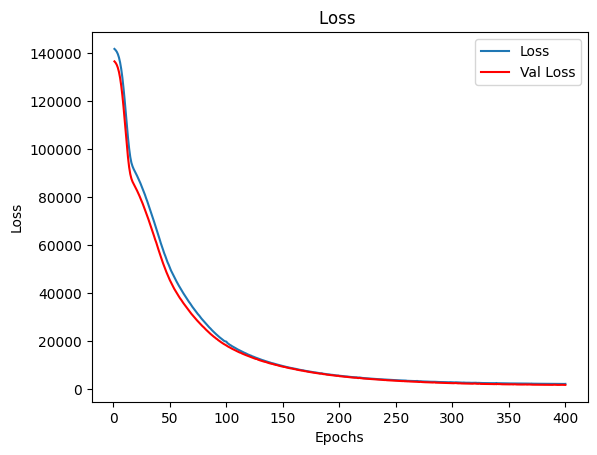

In [36]:
loss = regressor1_history.history['loss']
val_loss = regressor1_history.history['val_loss']
epochs = range(1 ,len(loss) + 1)

plt.title('Loss ')
plt.plot(epochs, loss, label = 'Loss')
plt.plot(epochs, val_loss, color = 'red', label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

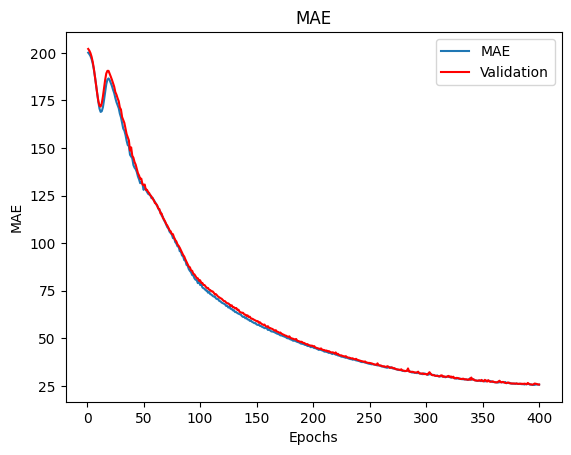

In [22]:
mae = regressor1_history.history['mae']
val_mae = regressor1_history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.title('MAE')
plt.plot(epochs, mae, label = 'MAE')
plt.plot(epochs, val_mae, color = 'red', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

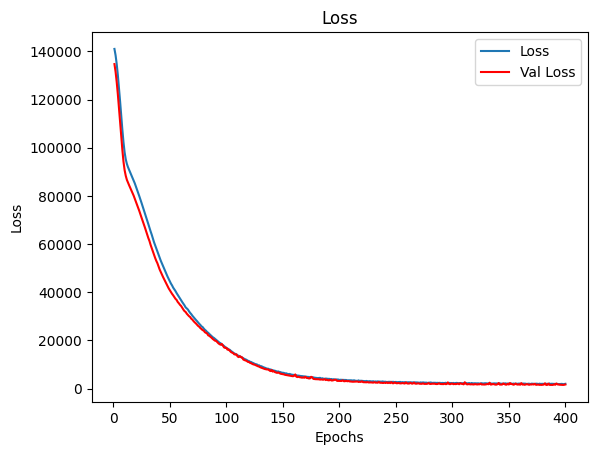

In [37]:
loss = regressor2_history.history['loss']
val_loss = regressor2_history.history['val_loss']
epochs = range(1 ,len(loss) + 1)

plt.title('Loss')
plt.plot(epochs, loss, label = 'Loss')
plt.plot(epochs, val_loss, color = 'red', label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

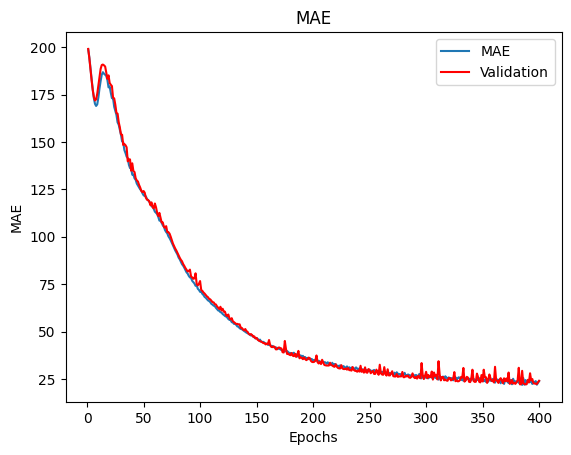

In [20]:
mae = regressor2_history.history['mae']
val_mae = regressor2_history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.title('MAE')
plt.plot(epochs, mae, label = 'MAE')
plt.plot(epochs, val_mae, color = 'red', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [25]:
results1 = regressor1.evaluate(X_test, y_test)
results2 = regressor2.evaluate(X_test, y_test)

136/136 [==============================] - 0s 2ms/step - loss: 2138.0081 - mae: 24.9960


In [40]:
y_pred1 = regressor1.predict(X_test)
y_pred2 = regressor2.predict(X_test)

136/136 [==============================] - 0s 2ms/step


In [41]:
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)

r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)

print(f"\nMSE_1: {mse1}")
print(f"MSE_2: {mse2}")
print(f"MAE_1: {mae1}")
print(f"MAE_2: {mae2}")
print(f"R^2_1: {r2_1}")
print(f"R^2_2: {r2_2}")


MSE_1: 2390.32941176134
MSE_2: 2138.006967185119
MAE_1: 26.711223087375878
MAE_2: 24.995952581496073
R^2_1: 0.9740084268957923
R^2_2: 0.976752089435259


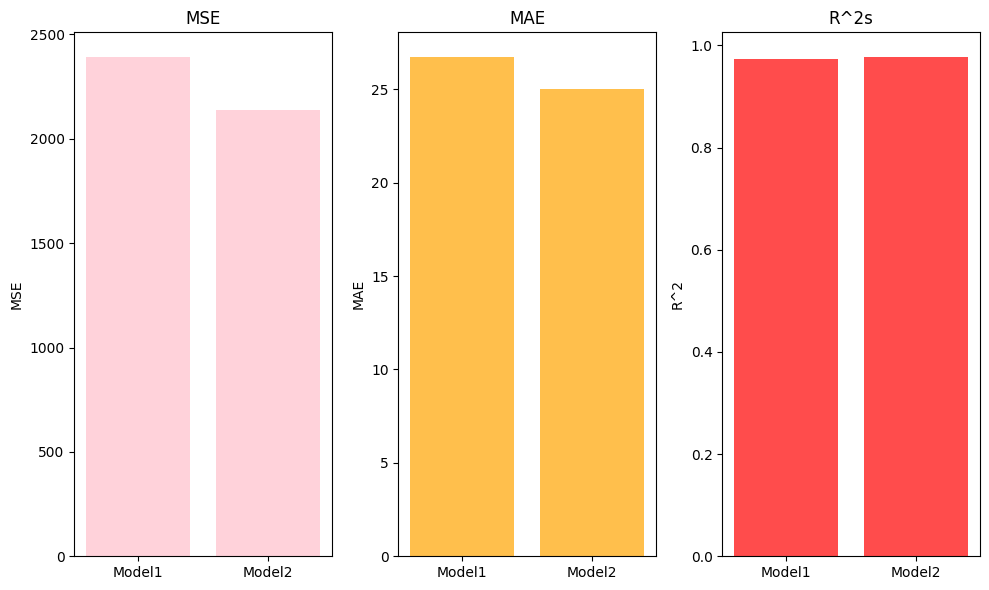

In [38]:
models = ["Model1", "Model2"]

mse_values = [mse1, mse2]
mae_values = [mae1, mae2]
r2_values = [r2_1, r2_2]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 6))

axes[0].bar(models, mse_values, color = 'pink', alpha = 0.7)
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE')

axes[1].bar(models, mae_values, color = 'orange', alpha = 0.7)
axes[1].set_ylabel('MAE')
axes[1].set_title('MAE')

axes[2].bar(models, r2_values, color = 'red', alpha = 0.7)
axes[2].set_ylabel('R^2')
axes[2].set_title('R^2s')

plt.tight_layout()
plt.show()